# <a id=intro> 1 Introduction</a>

According to the world health organization, Cardiovascular diseases (CVDs) are the leading cause of death globally. In 2019 alone, around 17.9 million people died from CVDs. Of these deaths, **85%** of them were due to heart diseases. There are many factors that play a role in increasing the risk of heart disease. Identifying these factors and their impact is paramount in the field of healthcare. Identifying patients who are at greater risk enables medical professionals to respond quickly and efficiently, saving more lives.

## <a id=aboutthisproject> 1.1 About This Project 

In this project we will delve deep into the causess of heart disease and its relations with other health indicators, drawing insights and exploring the data in order to get a better picture of the leading causes. Finally, we use statistical models in order to automate heart disease detection. 

An immediate application on this is early detection of heart disease in hospitals, thus enabling proactive measurements instead of reactive. Therefore, the goal of the project is to draw statistical insights, and construct a real world application for the dataset. 

## <a id=aboutthisdataset> 1.2 About the Dataset

The [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) dataset contains 320K rows and 18 columns. It is a cleaned, smaller version of the 2020 annual CDC (Centers for Disease Control and Prevention) survey data of 400k adults. For each patient (row), it contains the health status of that individual. The data was collected in the form of surveys conducted over the phone. Each year, the CDC calls around 400K U.S residents and asks them about their health status, with the vast majority of questions being yes or no questions.

## <a id=aboutthisnotebook> 1.3 About This Notebook 

This Notebook is concerned with exploring the data, the relation of heart disease with other features on our data, and the patterns and insights hidden inside the data. We will visualize the the data in various ways in our exploration.

# About the Dataset
## Where did the dataset come from and what treatments did it undergo?
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. As the CDC describes: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.". The most recent dataset (as of February 15, 2022) includes data from 2020. It consists of 401,958 rows and 279 columns. The vast majority of columns are questions asked to respondents about their health status, such as "Do you have serious difficulty walking or climbing stairs?" or "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]". In this dataset, I noticed many different factors (questions) that directly or indirectly influence heart disease, so I decided to select the most relevant variables from it and do some cleaning so that it would be usable for machine learning projects.

Importing Packages

In [1]:
#To manipulate files and directories
from os import path
import shutil

#To gnore any warning messages that may be generated during the execution of the code
import warnings
warnings.filterwarnings('ignore')

#For manipulating and analyzing data
import pandas as pd
import numpy as np
import missingno as msno

#For data vizualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pywaffle import Waffle

#Set up the necessary tools for statistical functions and distributions
from scipy import stats
from scipy.stats import zscore, kde, gaussian_kde, probplot

#Set up the necessary tools for Scaling and Encoding the Data
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder

#For creating a transformer that applies different preprocessing steps to different columns of a dataset.
from sklearn.compose import make_column_transformer

#For creating a sequence of data processing and machine learning steps to be applied to a dataset.
from imblearn.pipeline import Pipeline, make_pipeline

#For performing feature selection based on statistical tests
from sklearn.feature_selection import f_classif, chi2

#For addressing the issue of imbalanced classes in classification tasks
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

#For splitting the data, Cross Validation and Search
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, RandomizedSearchCV

#For building models using Linear and Logistic Regressions
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier

#For performing classification using Decision Trees
from sklearn.tree import DecisionTreeClassifier

#For performing classification using the k-nearest neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

#For building models using different ensemble methods
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostRegressor, AdaBoostClassifier, VotingClassifier

#For performing classification using Gradient Boosting over Decision Trees
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#For performing Classification and Regression using Support Vector Machines
from sklearn.svm import SVC, SVR, LinearSVC

#For performing Classification using the Gaussian Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB

#For computing precision, recall, f1 score, accuracy, and confusion matrix, and summarizing it in a table. Also compute operating characteristics
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc

Settings for Vizualizations in Matplotlib and Seaborn

In [2]:
#Setting the default grid style for plots and creating different color palettes to be used for plots in Seaborn
sns.set_style("darkgrid")
colors8 = sns.color_palette(['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600'], 8)
colors6 = sns.color_palette(['#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600'], 6)
colors4 = sns.color_palette(['#d45087', '#f95d6a', '#ff7c43', '#ffa600'], 4)
colors2 = sns.color_palette(['#f95d6a', '#ffa600'], 2)
colors1 = sns.color_palette(['#ffa600'], 1)

#Specifying text sizes for plots in Matplotlib                    
plt.rc('font', size=16) 
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.rc('legend', fontsize=16)    
plt.rc('figure', titlesize=16)

Data Loading

In [3]:
#Importing the data as a Pandas Data Frame
heart_df = pd.read_csv('/Users/devangshumitra/Desktop/UTD MSBA/1. Course Materials/2. Spring 23/1. BUAN 6341.004 - Applied Machine Learning/6. Project/Kaggle Notebooks/heart_2020_cleaned.csv')

Exploratory Data Analysis(EDA)

In [4]:
#Viewing top 10 rows of the data
heart_df.head(10)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth   
0           No  16.60     Yes              No     No             3.0  \
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   
5          Yes  28.87     Yes              No     No             6.0   
6           No  21.63      No              No     No            15.0   
7           No  31.64     Yes              No     No             5.0   
8           No  26.45      No              No     No             0.0   
9           No  40.69      No              No     No             0.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race   
0          30.0          No  Female        55-59  White  \
1           0.0          No  Female  80 or older  White   
2          30.0          No    Male        65-69  White   
3           0.0          No  Female        75-79  White   
4           0.0         Yes  Female        40-44  White   
5           0.0         Yes  Female        75-79  Black   
6           0.0          No  Female        70-74  White   
7           0.0         Yes  Female  80 or older  White   
8           0.0          No  Female  80 or older  White   
9           0.0         Yes    Male        65-69  White   

                  Diabetic PhysicalActivity  GenHealth  SleepTime Asthma   
0                      Yes              Yes  Very good        5.0    Yes  \
1                       No              Yes  Very good        7.0     No   
2                      Yes              Yes       Fair        8.0    Yes   
3                       No               No       Good        6.0     No   
4                       No              Yes  Very good        8.0     No   
5                       No               No       Fair       12.0     No   
6                       No              Yes       Fair        4.0    Yes   
7                      Yes               No       Good        9.0    Yes   
8  No, borderline diabetes               No       Fair        5.0     No   
9                       No              Yes       Good       10.0     No   

  KidneyDisease SkinCancer  
0            No        Yes  
1            No         No  
2            No         No  
3            No        Yes  
4            No         No  
5            No         No  
6            No        Yes  
7            No         No  
8           Yes         No  
9            No         No

In [5]:
#Name of all columns in the dataset
heart_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## Column Descriptions
- `HeartDisease`: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- `BMI`: Body Mass Index (BMI).
- `Smoking`: Have you smoked at least 100 cigarettes in your entire life?
- `AlcoholDrinking`: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- `Stroke`: (Ever told) (you had) a stroke?
- `PhysicalHealth`: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
- `MentalHealth`: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
- `DiffWalking`: Do you have serious difficulty walking or climbing stairs?
- `Sex`: Are you male or female?
- `AgeCategory`: Fourteen-level age category. (then calculated the mean)
- `Race`: Imputed race/ethnicity value.
- `Diabetic`: (Ever told) (you had) diabetes?
- `PhysicalActivity`: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- `GenHealth`: Would you say that in general your health is...
- `SleepTime`: On average, how many hours of sleep do you get in a 24-hour period?
- `Asthma`: (Ever told) (you had) asthma?
- `KidneyDisease`: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- `SkinCancer`: (Ever told) (you had) skin cancer?

In [6]:
#Shape of the Data
heart_df.shape

(319795, 18)

In [7]:
#Some basic information about the Features
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

The data sample is very informative and is represented by 319 thousand patients on 18 criteria.

In [8]:
#Count of the number of Nulls in each feature
heart_df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
#Counting the number of duplicate rows
heart_df.duplicated().sum()

18078

The duplicates in the data set mean that multiple rows have the same features which is absolutely possible. Hence ignoring the duplicates.

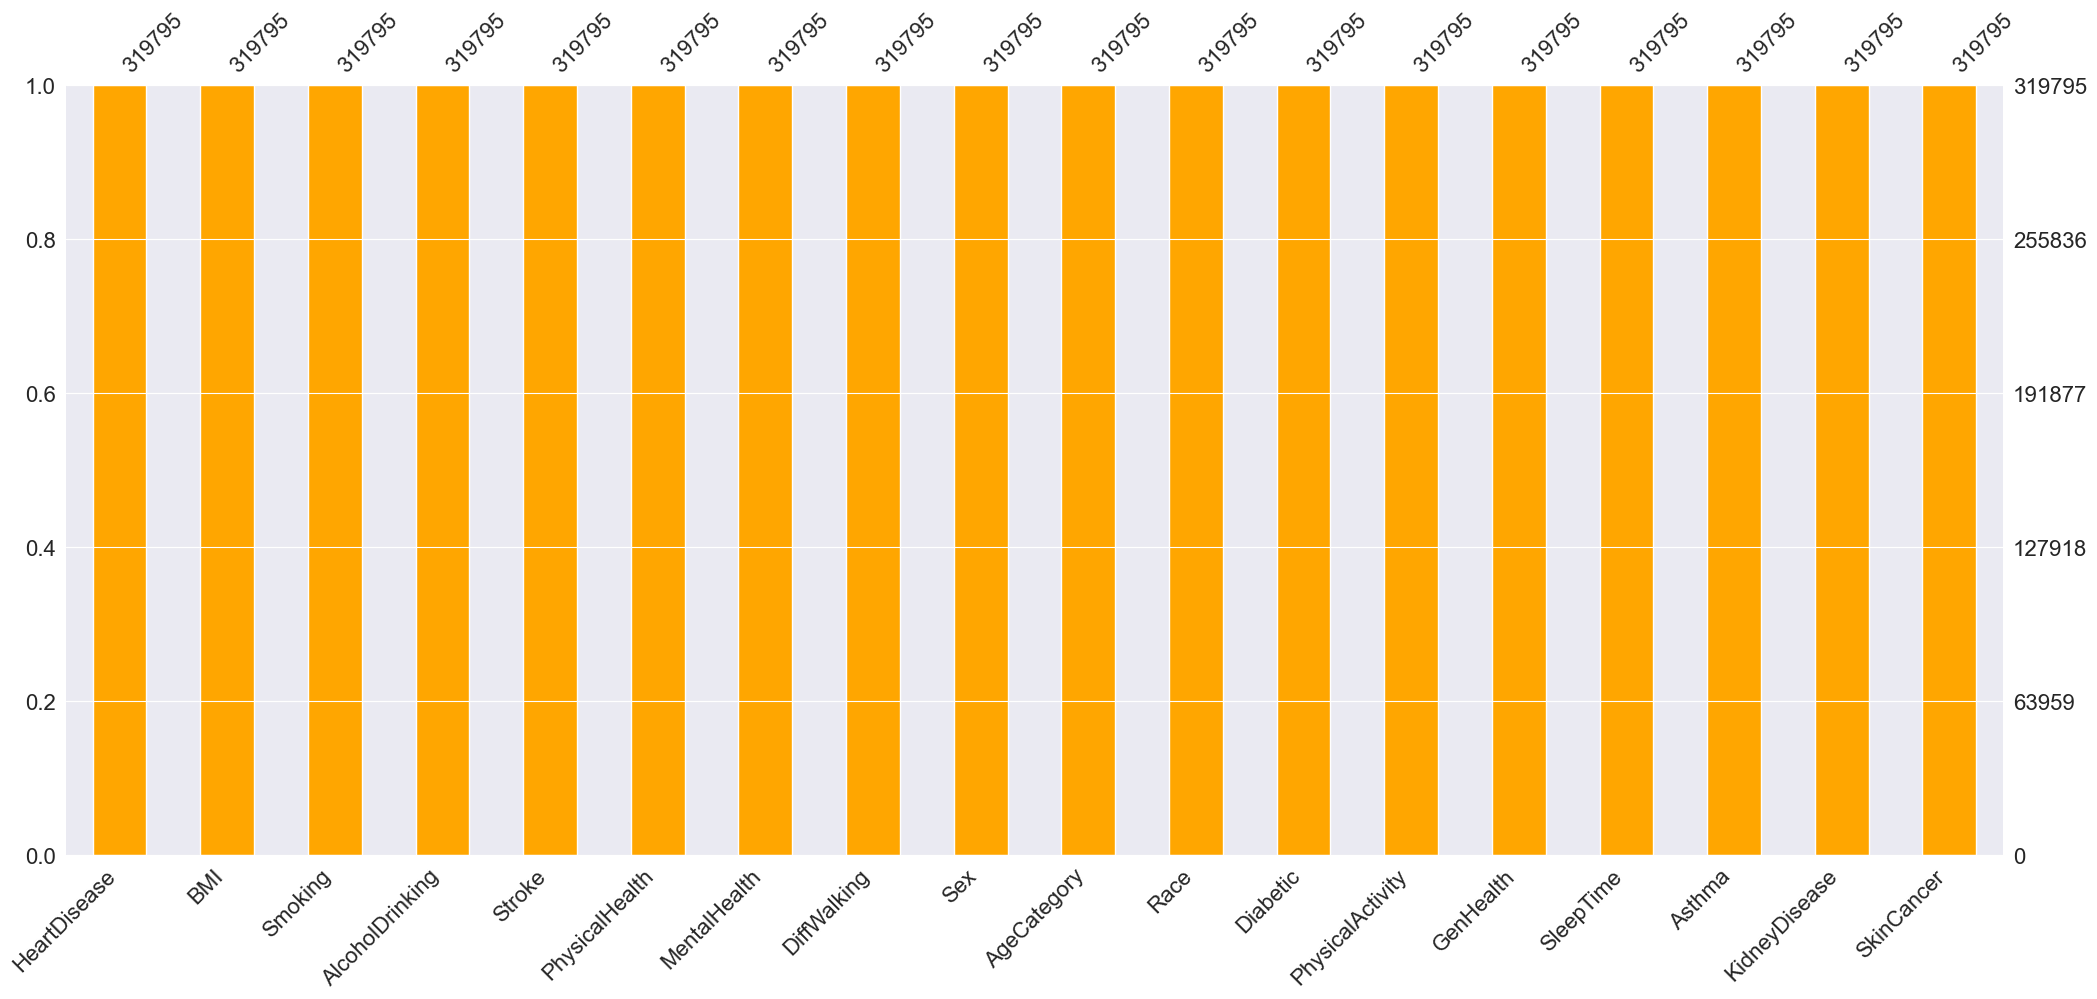

In [10]:
#Checking for Gaps in the Data
msno.bar(heart_df,color = "#ffa600")
plt.show()

There are no missing values in the data set

In [11]:
#Number of Unique values each feature has
for column_name in heart_df.columns:
    unique_values = len(heart_df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))# Get Information for Features and unique values in columns

Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3604' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '2' unique values


In [12]:
#Unique values each feature has
for feature in heart_df.columns:
    print(feature)
    print(heart_df[feature].unique(),"\n")

HeartDisease
['No' 'Yes'] 

BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56] 

Smoking
['Yes' 'No'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['No' 'Yes'] 

PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.] 

Asthma
['Yes' 'No'] 


We have some attributes that have more than two unique values, we'll use OneHotEncoder in the preprocessing step later.

<Axes: xlabel='HeartDisease', ylabel='count'>

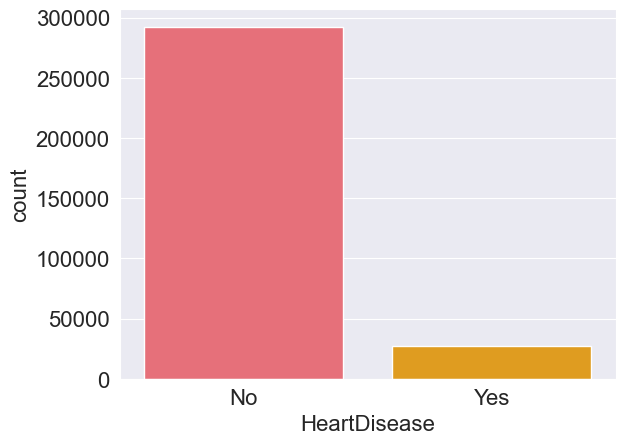

In [13]:
#How is the Dependent Variable(Outcome) is distributed
sns.countplot(x='HeartDisease',data=heart_df,palette=colors2)

We are dealing with an unbalanced sample, where the majority of people are healthy.

Since the data is unbalanced (292422 people don't have heart disease and 27373 people have heart disease), these bar graphs do not help us to understand the data well (The same is true for all features). Investigating among the people having heart disease could be a better strategy to understand the effect of a certain feature on this topic.

91.44% do not have a heart disease and 8.56% have a heart disease in the dataset. Approximately 9 in 100 people suffer from heart disease in the united states.

Numerical Variables

In [14]:
#Describe the numberic features of the data
heart_df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

Hypothesis: There are outliers in the data for both maximum and minimum values. 

For all 4 numeric features, theres a huge difference in the max value and the 3rd Quartile(75%), which suggests the presence of outliers. 

*  **BMI** - **min**.: 12; **max**.: 94.8 - with a BMI of 94.8, a person must be extremely morbidly obese (which is not that extremely improbable, given the prevalence of obesity in the US);
* (**PhysicalHealth**, **MentalHealth**) - there is a daily scale, from 0 to 30 days, **outliers** are hard to find here
*  **SleepTime** - we can see that the mean as well as the median are quite close to each other: the average sleep time of the respondents is between 7 and 8 hours, but we also have strange answers, such as 1 hour or 24 hours, which doesn't seem to be possible. When excluding these values, you can use the interquartile range, exclude 5% of extreme observations or use some statistical tests to determine whether a certain observation is an outlier.
* **BMI** more than 60-70 is highly implausible. You may create a cap here to prevent unnecessary influence.
*  **SleepTime ,PhysicalHealth and  MentalHealth** are considered as continuous only integers, so we can treat them as discontinuous.
* **GenHealth** attribute is a measure of an individual's overall health. It is calculated by taking into account a variety of factors, including height, weight, age, sex, and lifestyle choices.

In [15]:
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

We can see that all numerical variables are skewed and contain outliers. Let's examine the IQR outliers more closely.

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

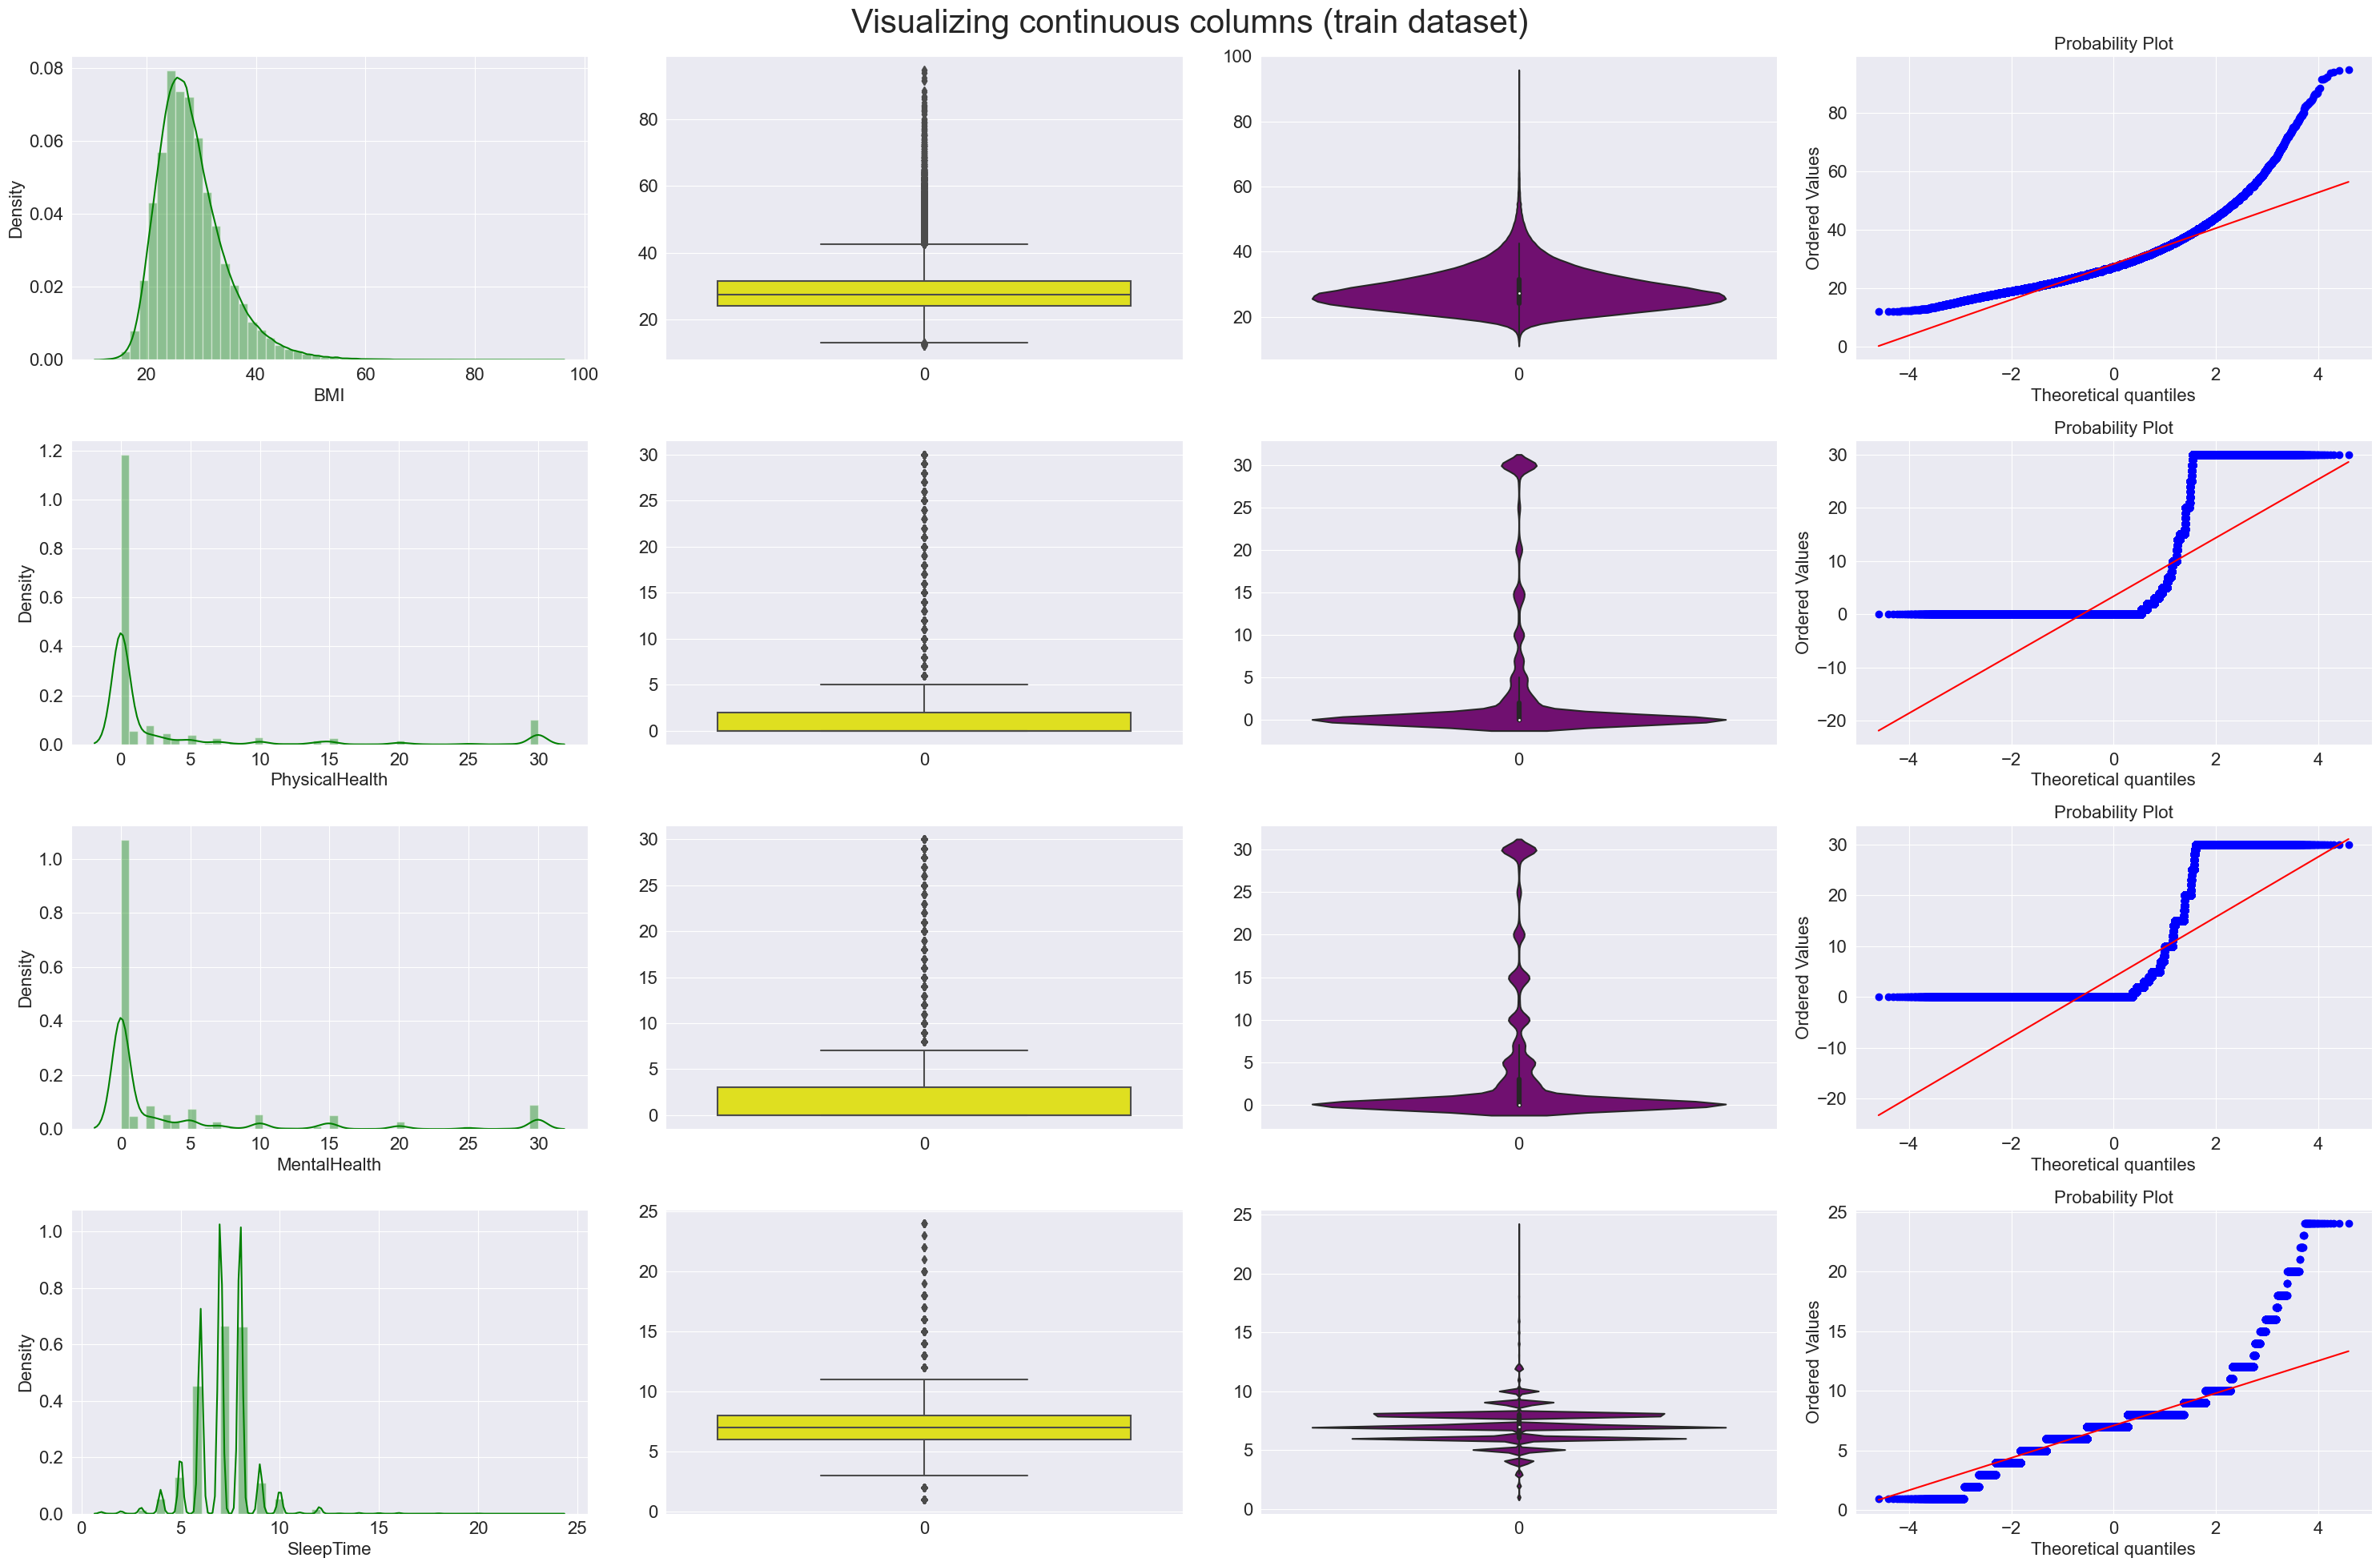

In [16]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(heart_df[i],ax=ax[index,0],color='green')
    sns.boxplot(heart_df[i],ax=ax[index,1],color='yellow')
    sns.violinplot(heart_df[i],ax=ax[index,2],color='purple')
    stats.probplot(heart_df[i],plot=ax[index,3])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

The analysis showed that only the BMI variable is close to the normal distribution, the rest are close to bimodal.

In [17]:
#Finding the number of outliers for each numerical feature based on quartiles
for col in numeric_features:
  Q1, Q3 = heart_df[col].quantile([0.25,0.75])
  IQR = Q3 - Q1
  right = Q3 + 1.5 * IQR
  left = Q1 - 1.5 * IQR
  n = len(heart_df.loc[(heart_df[col] < left) | (heart_df[col] > right)])
  print(f"{col}:\n\tOutlier Num = {n}\n\tOutlier Percentage = {n*100/len(heart_df):.2f}%\n")

BMI:
	Outlier Num = 10396
	Outlier Percentage = 3.25%

PhysicalHealth:
	Outlier Num = 47146
	Outlier Percentage = 14.74%

MentalHealth:
	Outlier Num = 51576
	Outlier Percentage = 16.13%

SleepTime:
	Outlier Num = 4543
	Outlier Percentage = 1.42%



In [18]:
num_cols = heart_df.select_dtypes(exclude='object').columns
obj_cols = heart_df.select_dtypes(include='object').columns

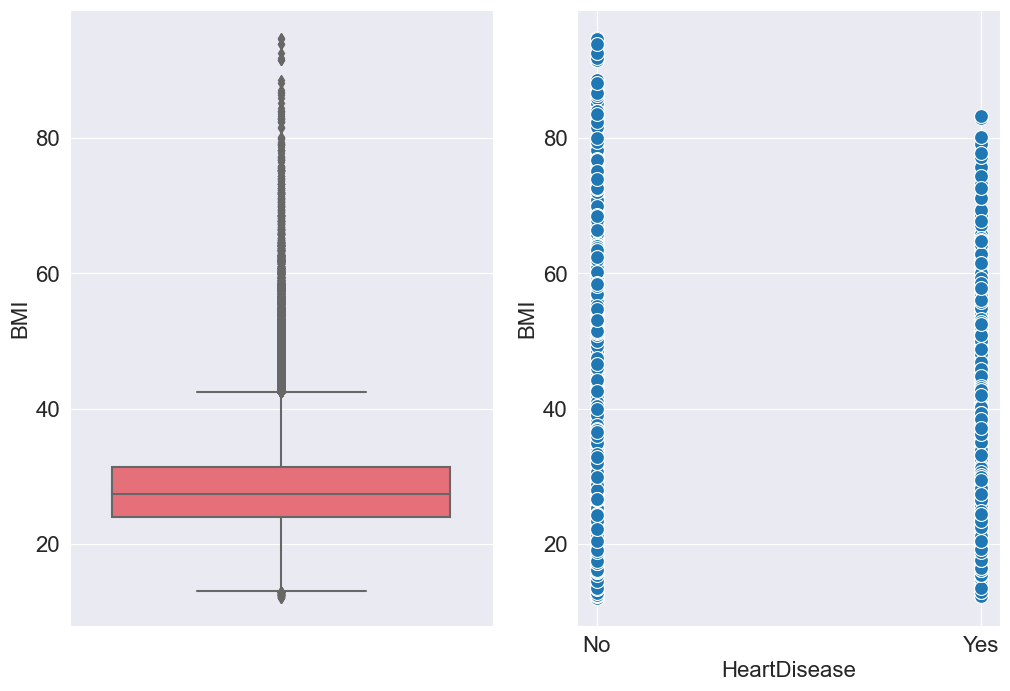

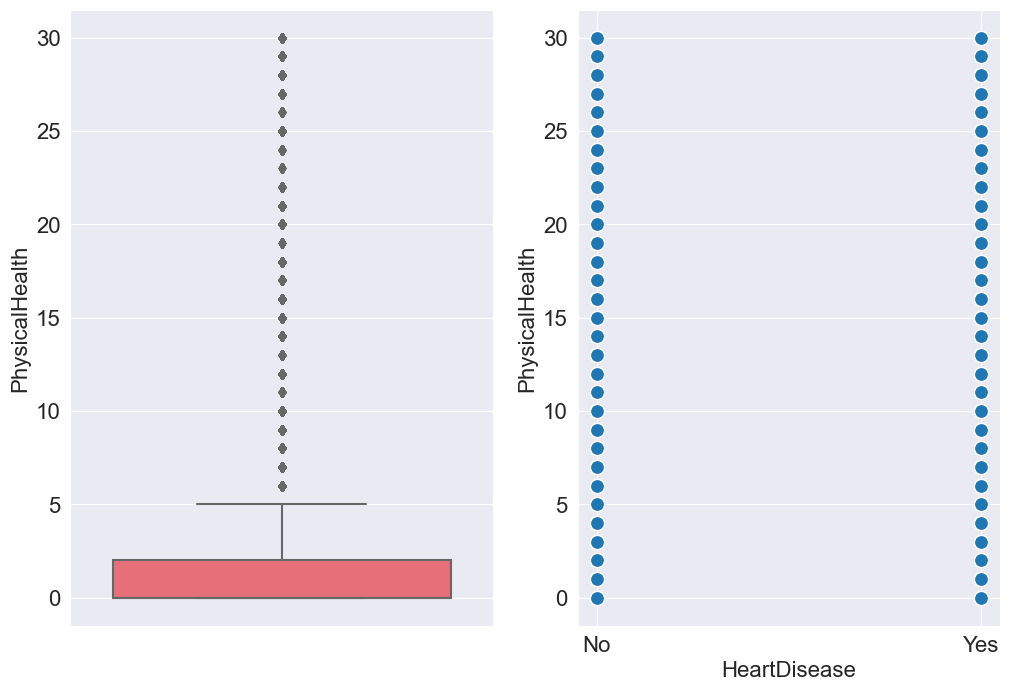

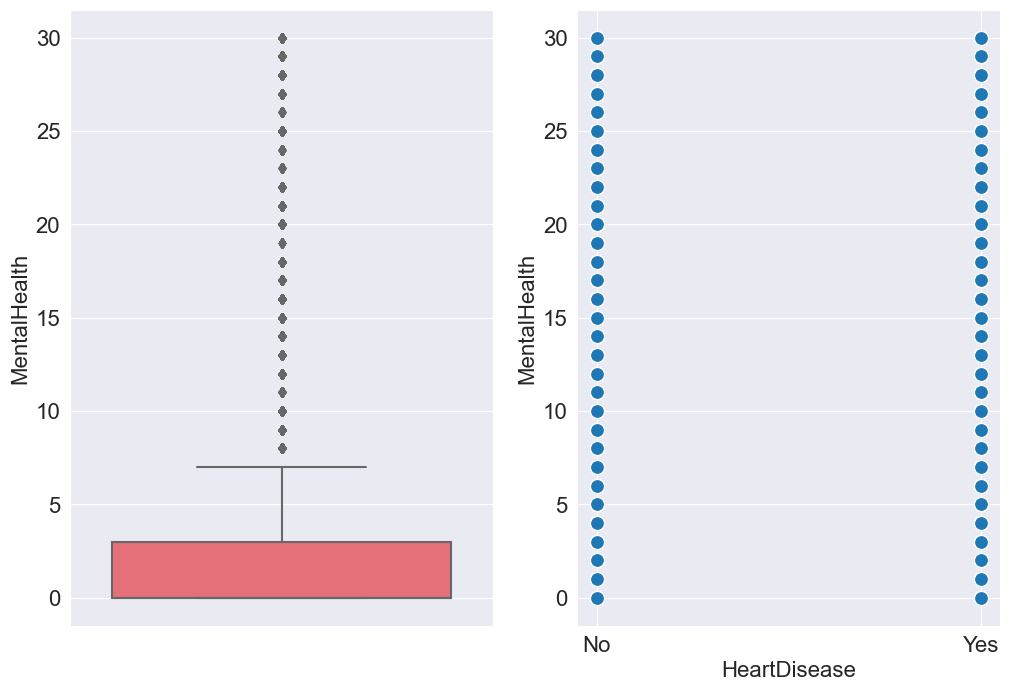

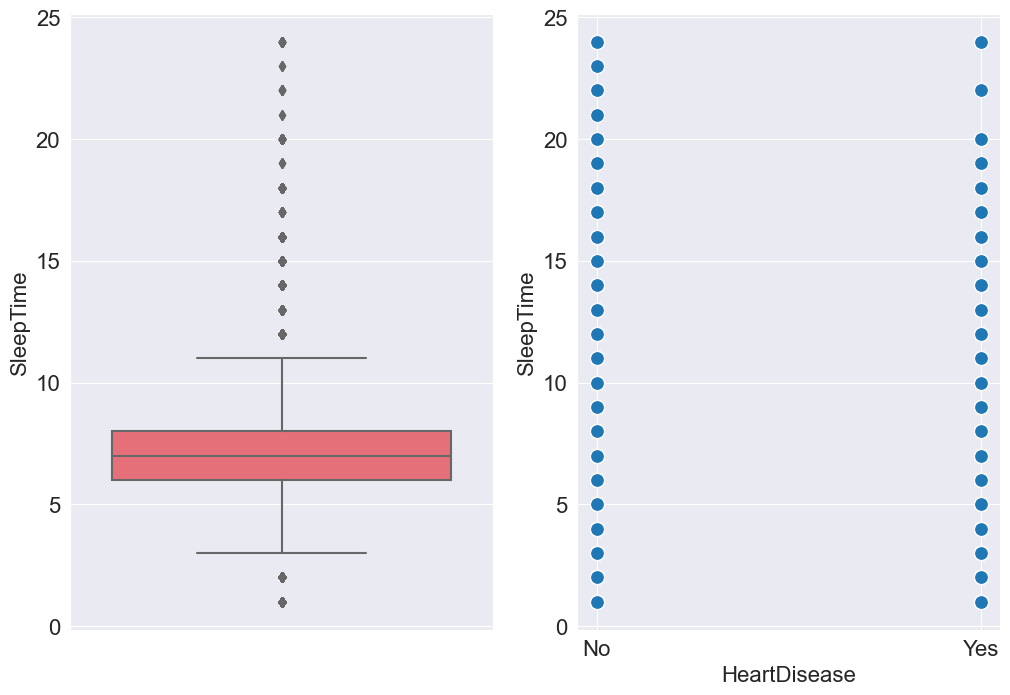

In [19]:
#Analysing the distribution of numerical variables against the Outcome Variable

for col in num_cols:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=heart_df, y=col, ax=ax[0], palette=colors2)
    sns.scatterplot(data=heart_df,x = 'HeartDisease', s = 100, y=col, ax=ax[1], palette=colors2)
    plt.show()

BMI Vs. Heart Disease

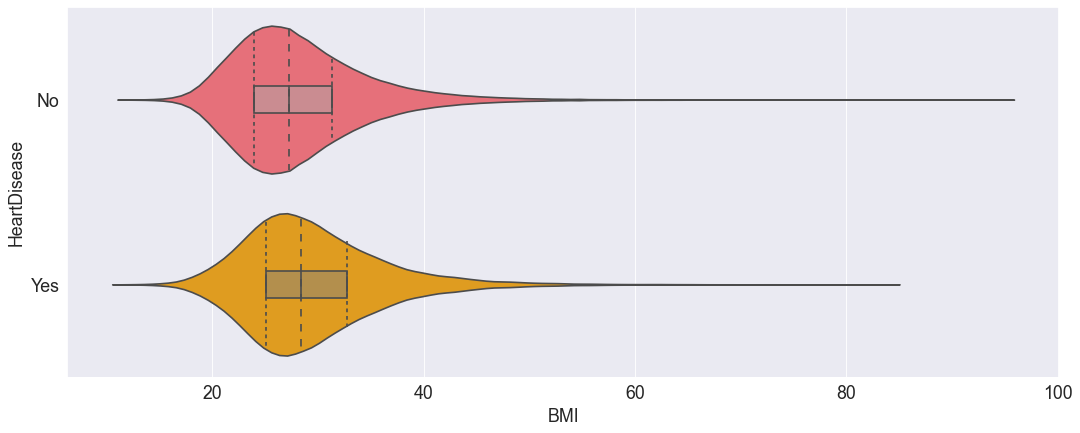

In [20]:
plt.figure(figsize=(16, 6), dpi=80)

sns.boxplot(data=heart_df, x='BMI', y='HeartDisease', saturation=0.4, 
            width=0.15, boxprops={'zorder': 2},
            showfliers = False, whis=0,  palette=colors2);
sns.violinplot(data=heart_df, x='BMI', y='HeartDisease',inner='quartile', palette=colors2);

the both distributions are normal distriubtions and in the same range which is from 12 to 94. The BMI distribution of individuals who suffer from heart disease is slightly shifted towards higher values in comparison to the distribution of those who don't. so we can observe that **BMI didn't affect on heart disease**.

PhysicalHealth Vs. Heart Disease

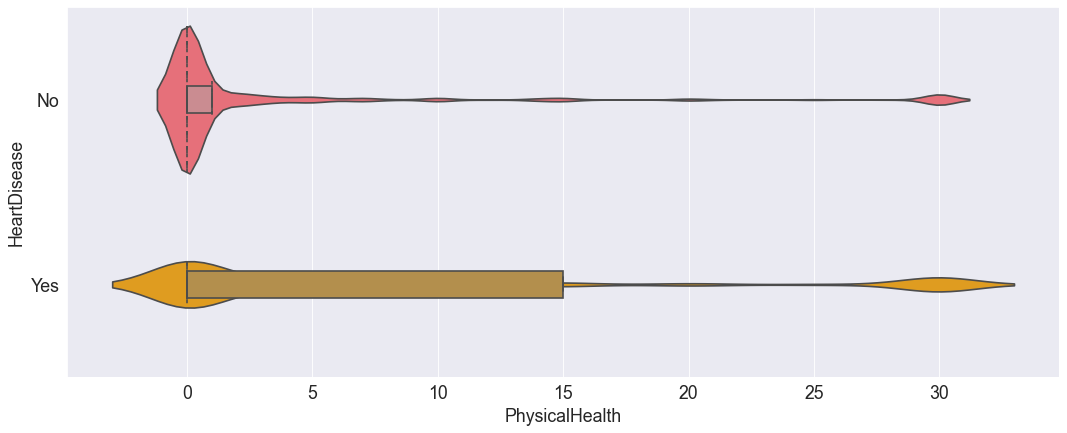

In [21]:
plt.figure(figsize=(16, 6), dpi=80)

sns.boxplot(data=heart_df, x='PhysicalHealth', y='HeartDisease', saturation=0.4, 
            width=0.15, boxprops={'zorder': 2},
            showfliers = False, whis=0,  palette=colors2);
sns.violinplot(data=heart_df, x='PhysicalHealth', y='HeartDisease',inner='quartile', palette=colors2);

MentalHealth Vs. Heart Disease

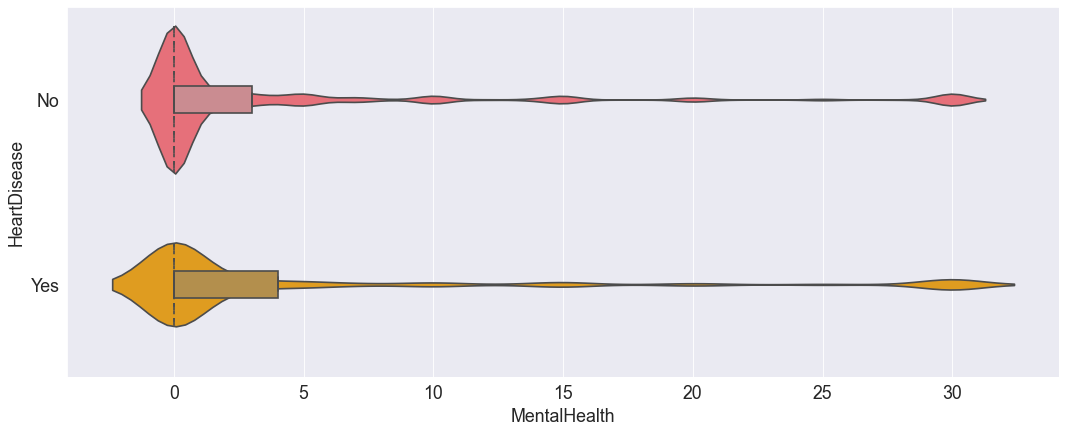

In [22]:
plt.figure(figsize=(16, 6), dpi=80)

sns.boxplot(data=heart_df, x='MentalHealth', y='HeartDisease', saturation=0.4, 
            width=0.15, boxprops={'zorder': 2},
            showfliers = False, whis=0,  palette=colors2);
sns.violinplot(data=heart_df, x='MentalHealth', y='HeartDisease',inner='quartile', palette=colors2);

SleepTime Vs. Heart Disease

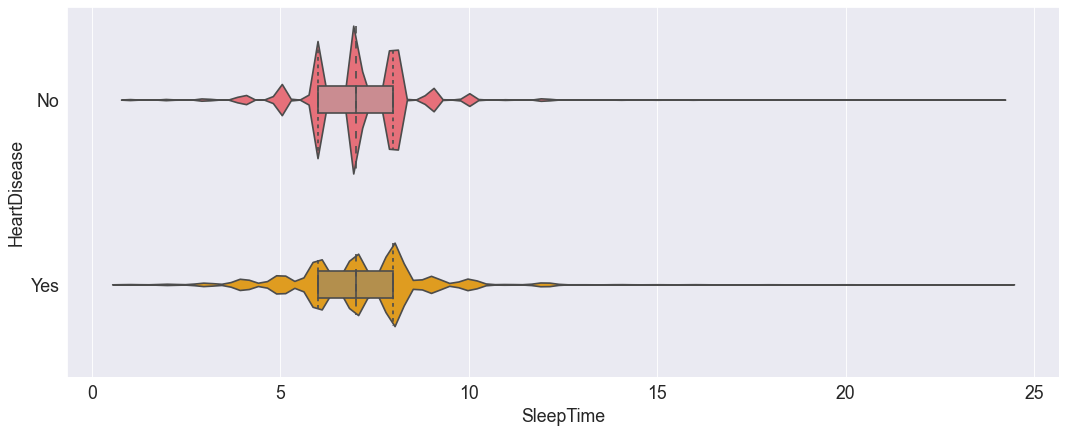

In [23]:
plt.figure(figsize=(16, 6), dpi=80)

sns.boxplot(data=heart_df, x='SleepTime', y='HeartDisease', saturation=0.4, 
            width=0.15, boxprops={'zorder': 2},
            showfliers = False, whis=0,  palette=colors2);
sns.violinplot(data=heart_df, x='SleepTime', y='HeartDisease',inner='quartile', palette=colors2);

Abnormal sleeep duration is more prevalent in heart disease patients. Even though heart disease patients make 8.5% of the sample, they have higher percentages of sleep less than 6 hours or more than 9 hours, which is considered abnormal.

In [24]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
for feature in numeric_features:
	stat, p = shapiro(heart_df[feature])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

Statistics=0.928, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.476, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.551, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.892, p=0.000
Sample does not look Gaussian (reject H0)


The test for normality has not been passed, therefore, to find the relationship of our variables, it is necessary to use non-parametric tests. Since we mostly have categorical variables, we use Pearson's Chi-square test to check.

The purpose of the test is to determine if two variables are related to each other.

Null hypothesis:
We start by defining the null hypothesis ( H0 ), which states that there is no relationship between the variables.
An alternative hypothesis could argue that there is a significant relationship between the two.

In our dataset, there is a statistically significant relationship between the target variable and categorical features. This means that you should try to make a small prediction of the target feature.

Categorical Variables

In [25]:
heart_df.describe(include="object")

HeartDisease Smoking AlcoholDrinking  Stroke DiffWalking     Sex   
count        319795  319795          319795  319795      319795  319795  \
unique            2       2               2       2           2       2   
top              No      No              No      No          No  Female   
freq         292422  187887          298018  307726      275385  167805   

       AgeCategory    Race Diabetic PhysicalActivity  GenHealth  Asthma   
count       319795  319795   319795           319795     319795  319795  \
unique          13       6        4                2          5       2   
top          65-69   White       No              Yes  Very good      No   
freq         34151  245212   269653           247957     113858  276923   

       KidneyDisease SkinCancer  
count         319795     319795  
unique             2          2  
top               No         No  
freq          308016     289976

Numeric variables are BMI, PhysicalHealth, MentalHealth, SleepTime. The rest are categorical.

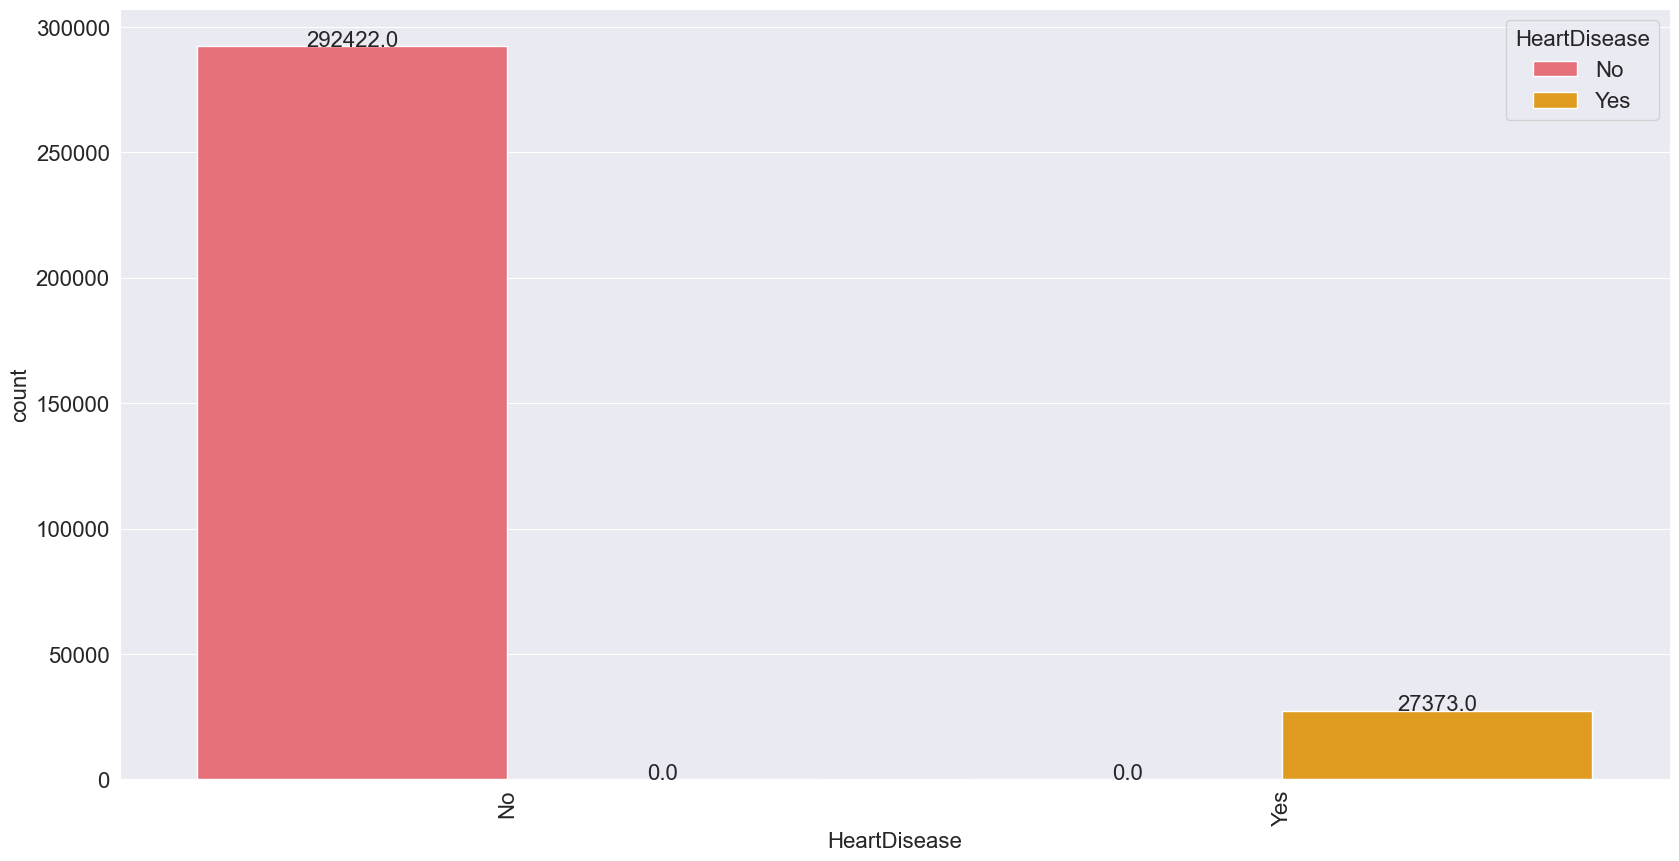

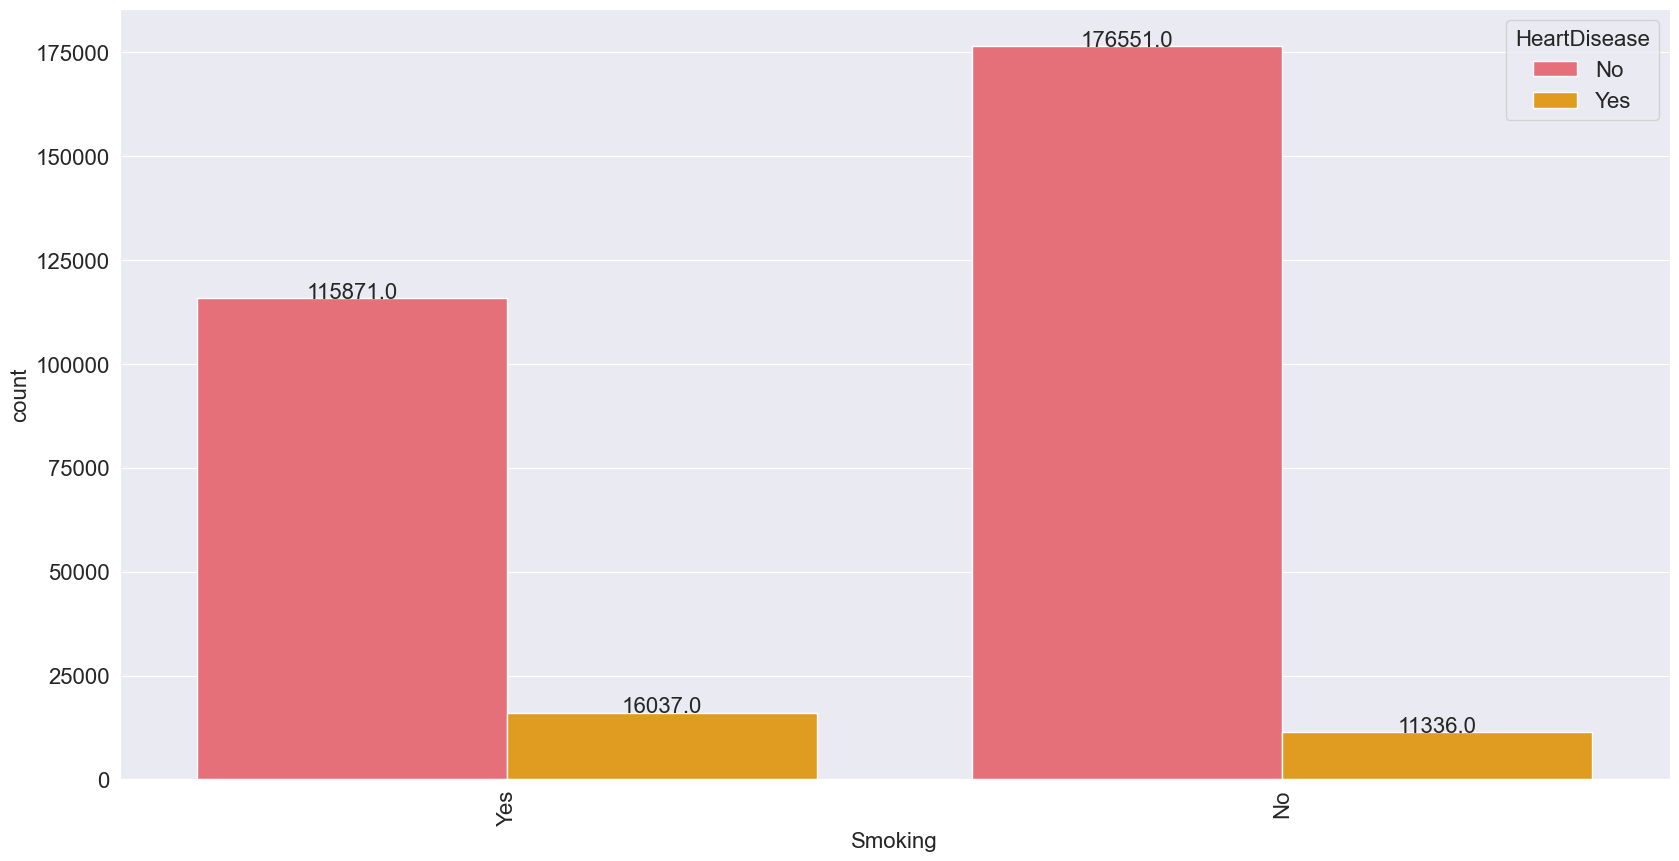

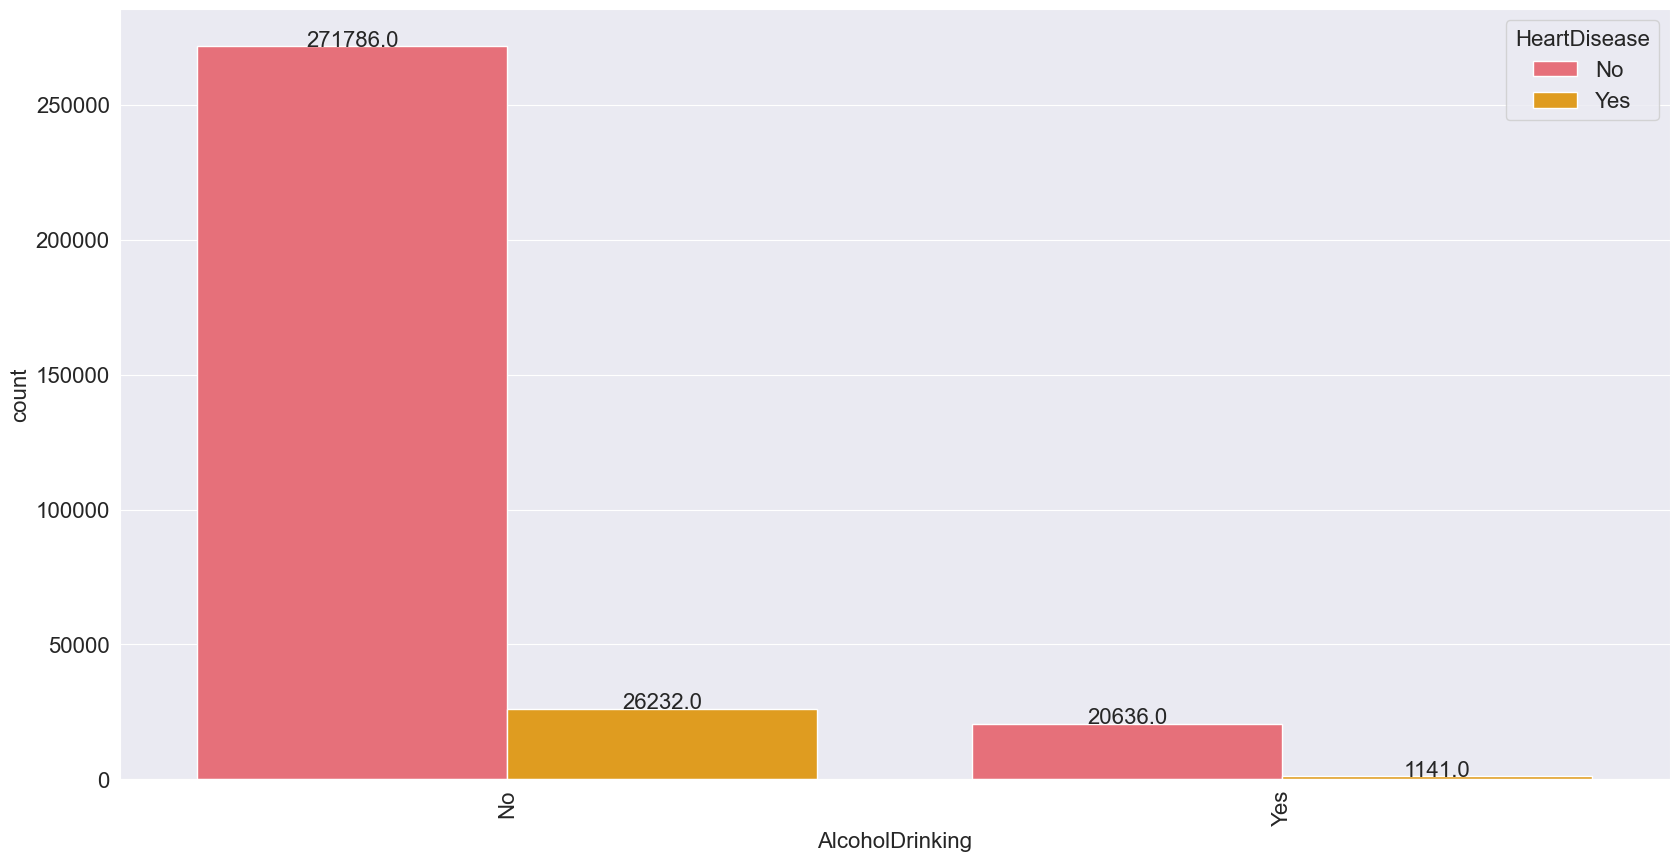

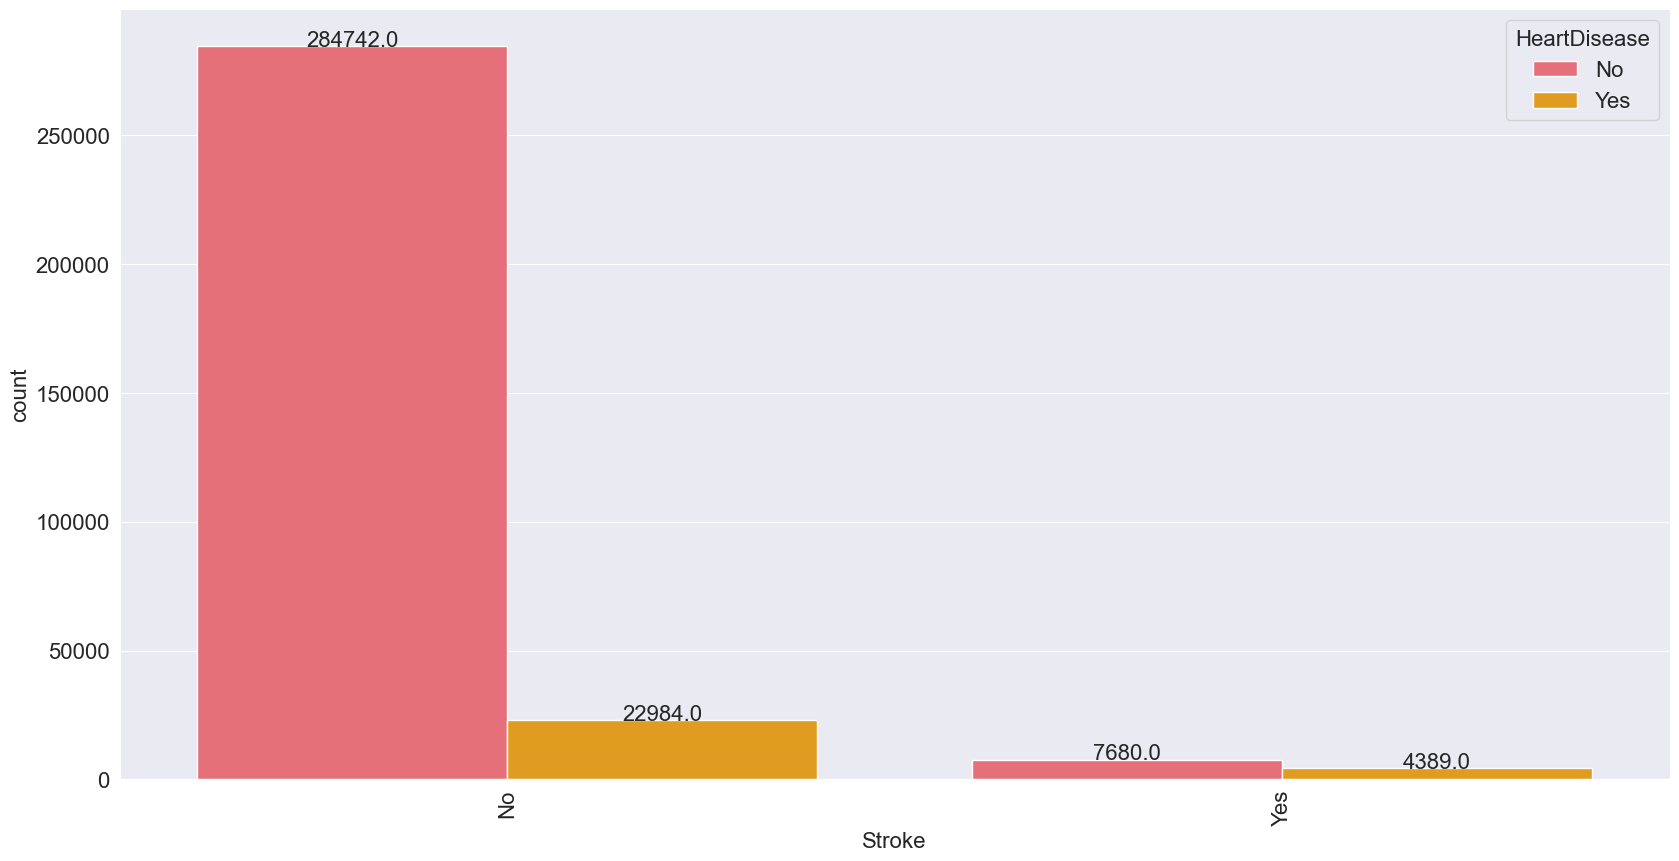

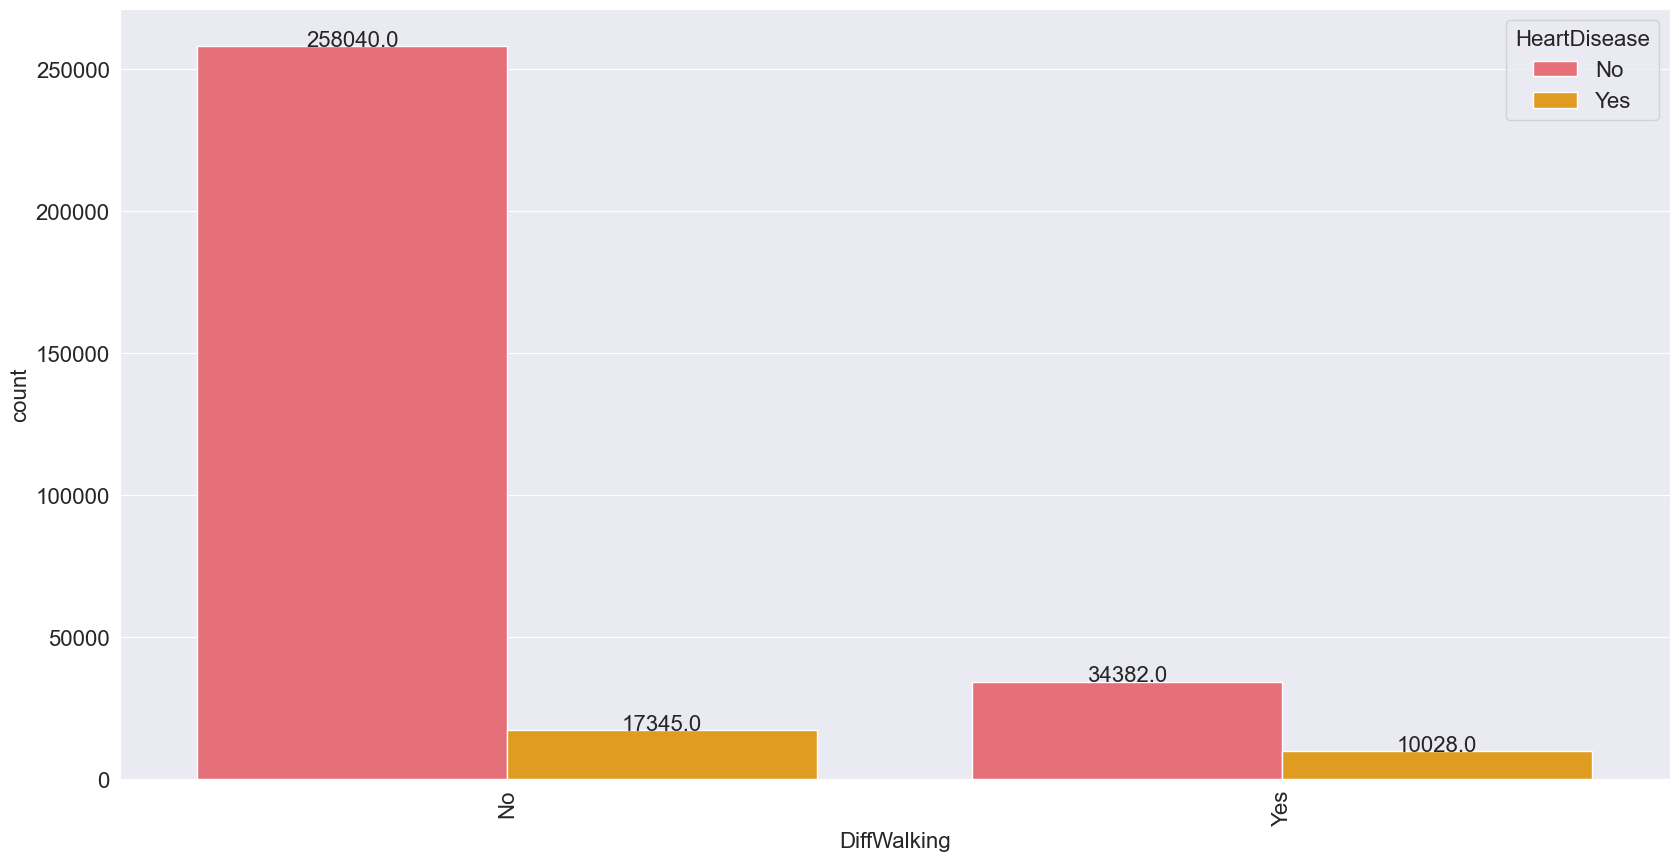

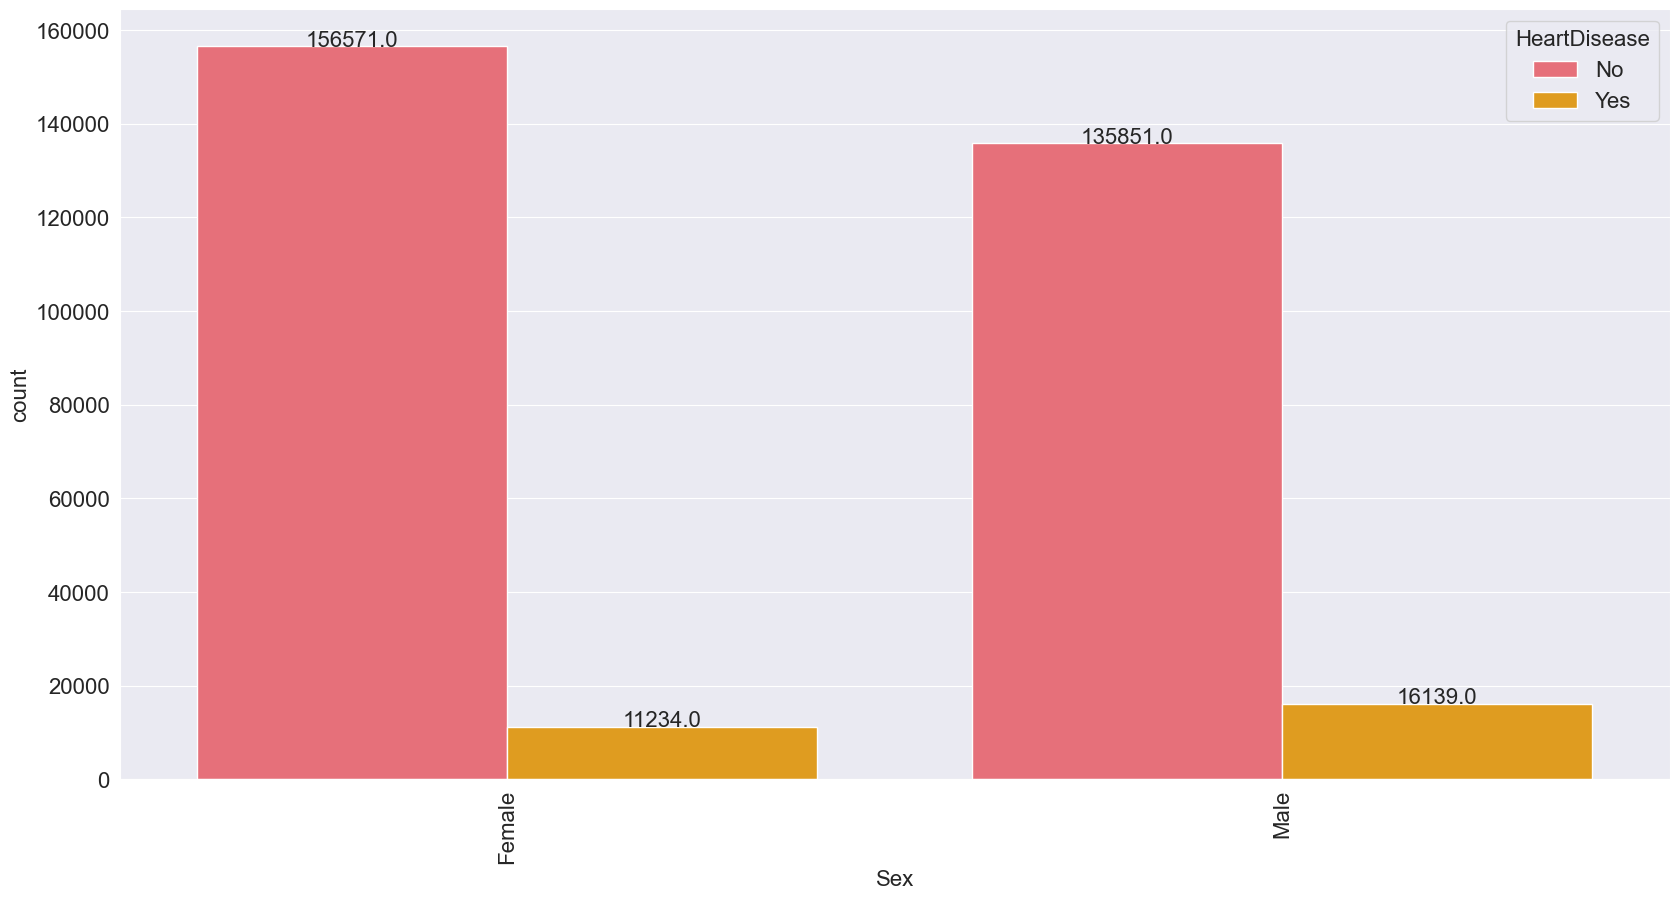

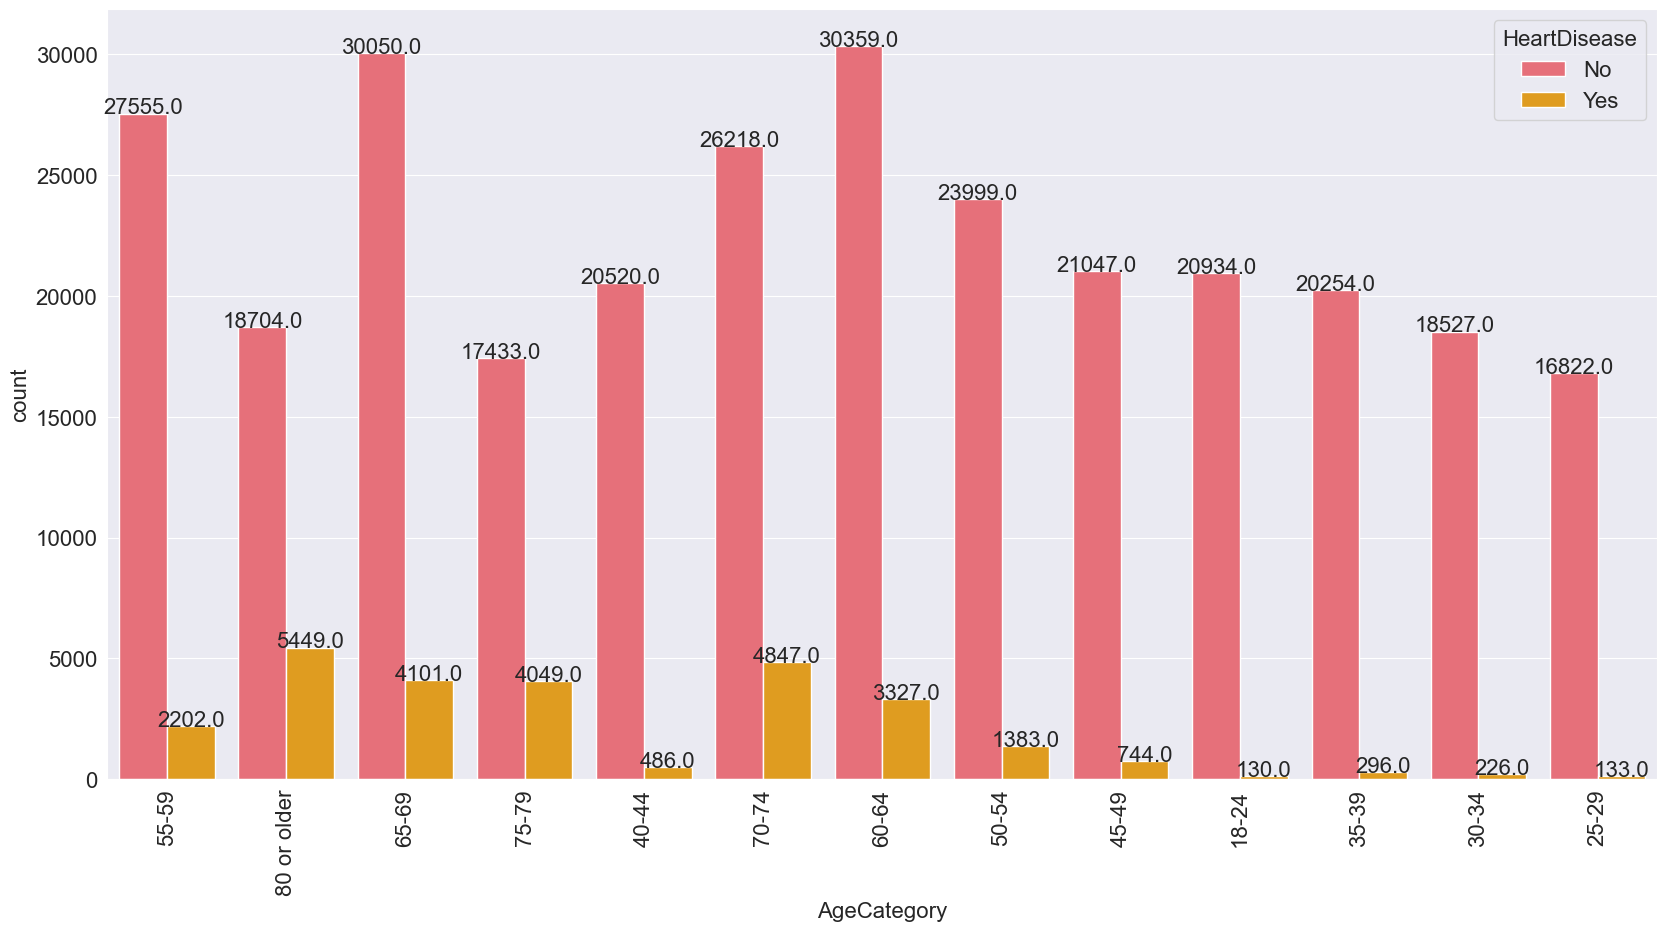

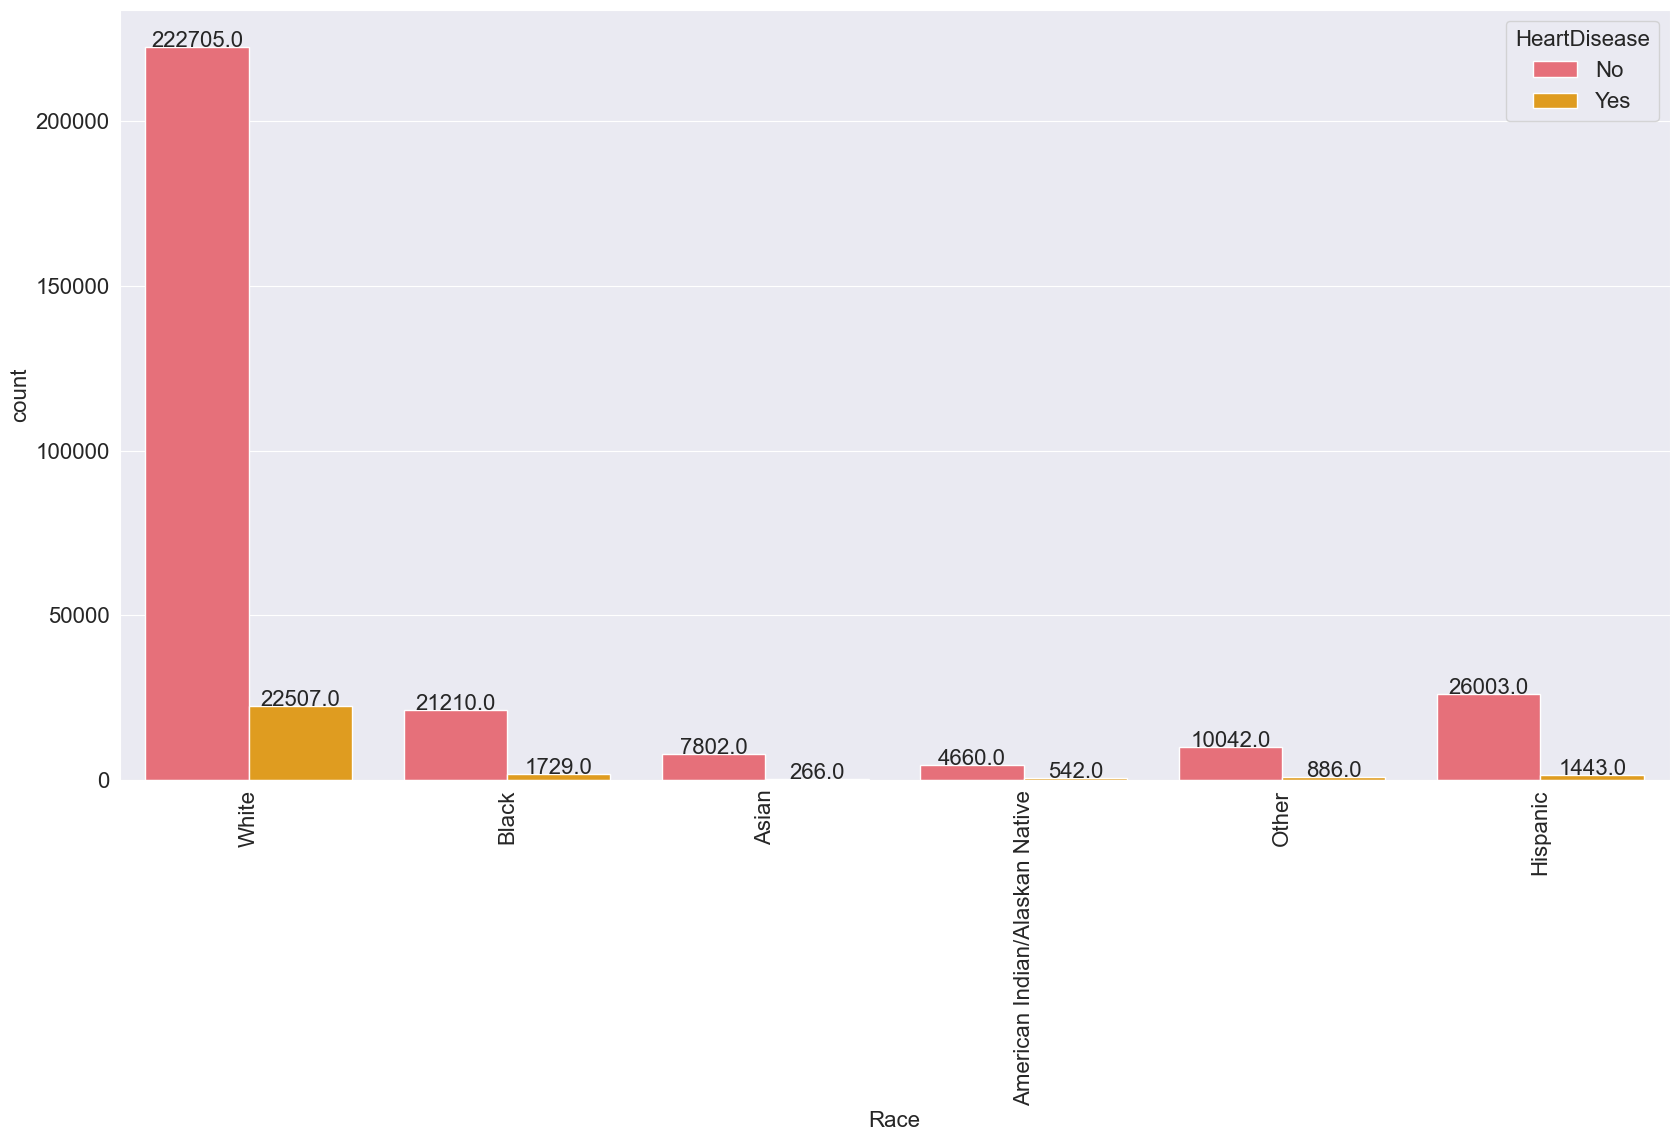

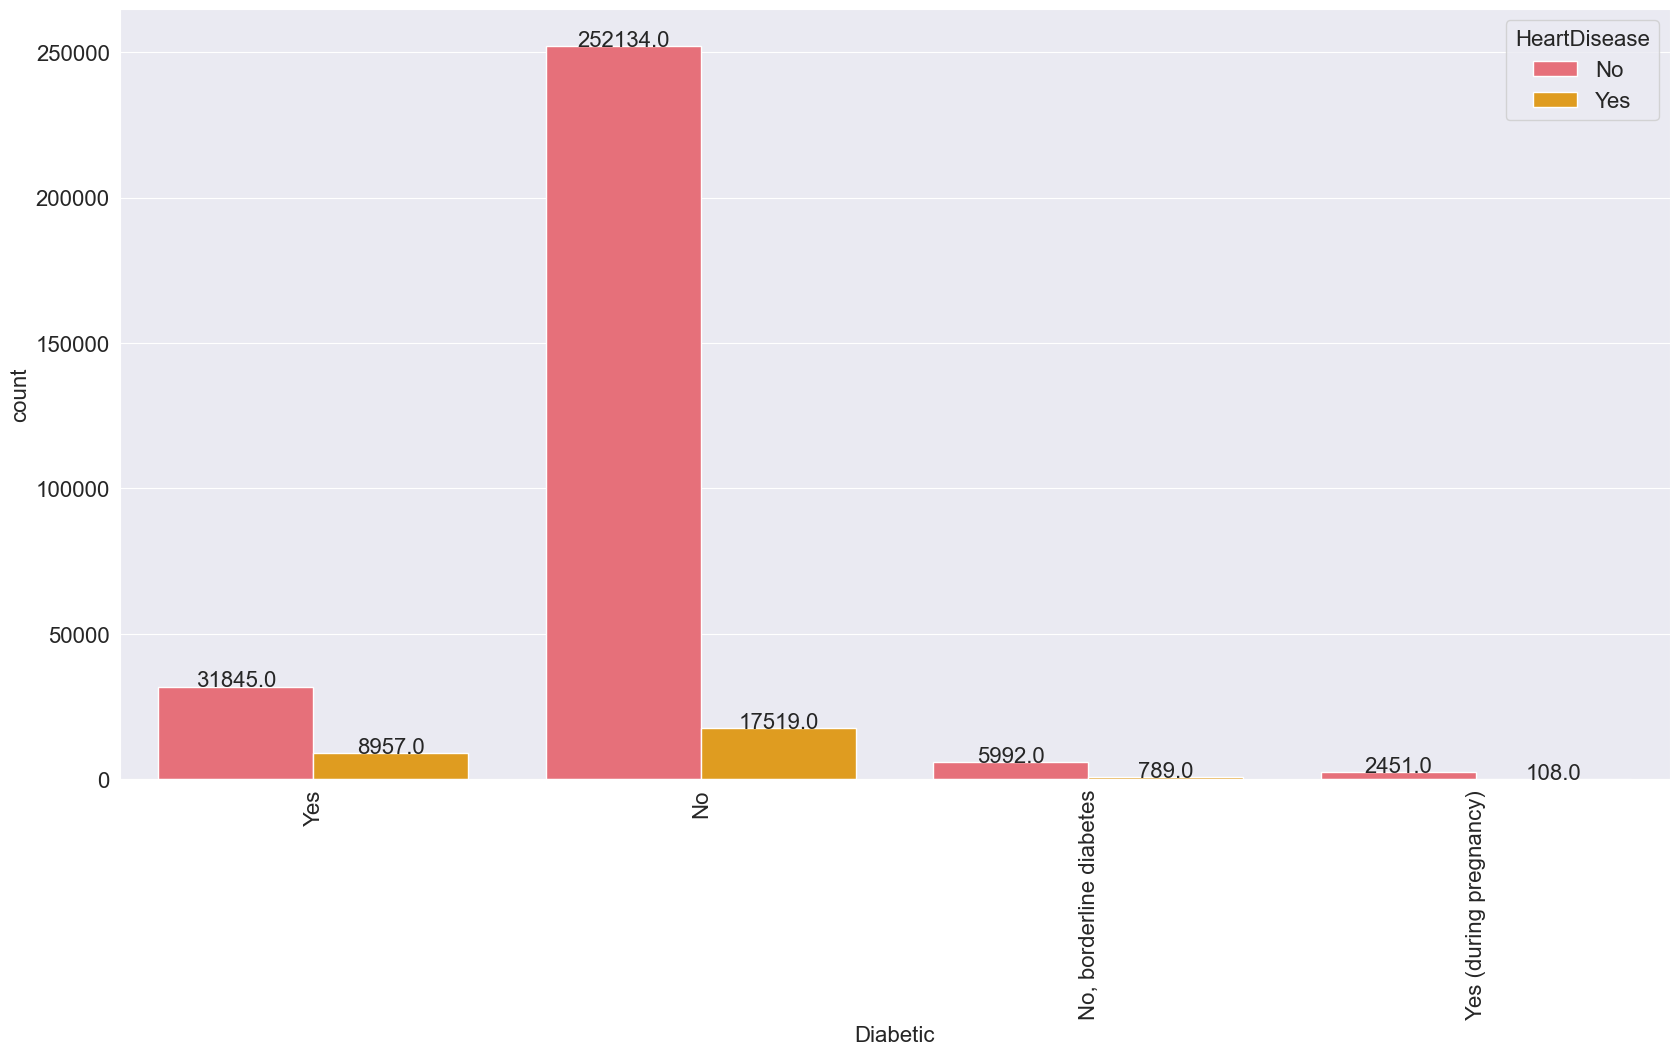

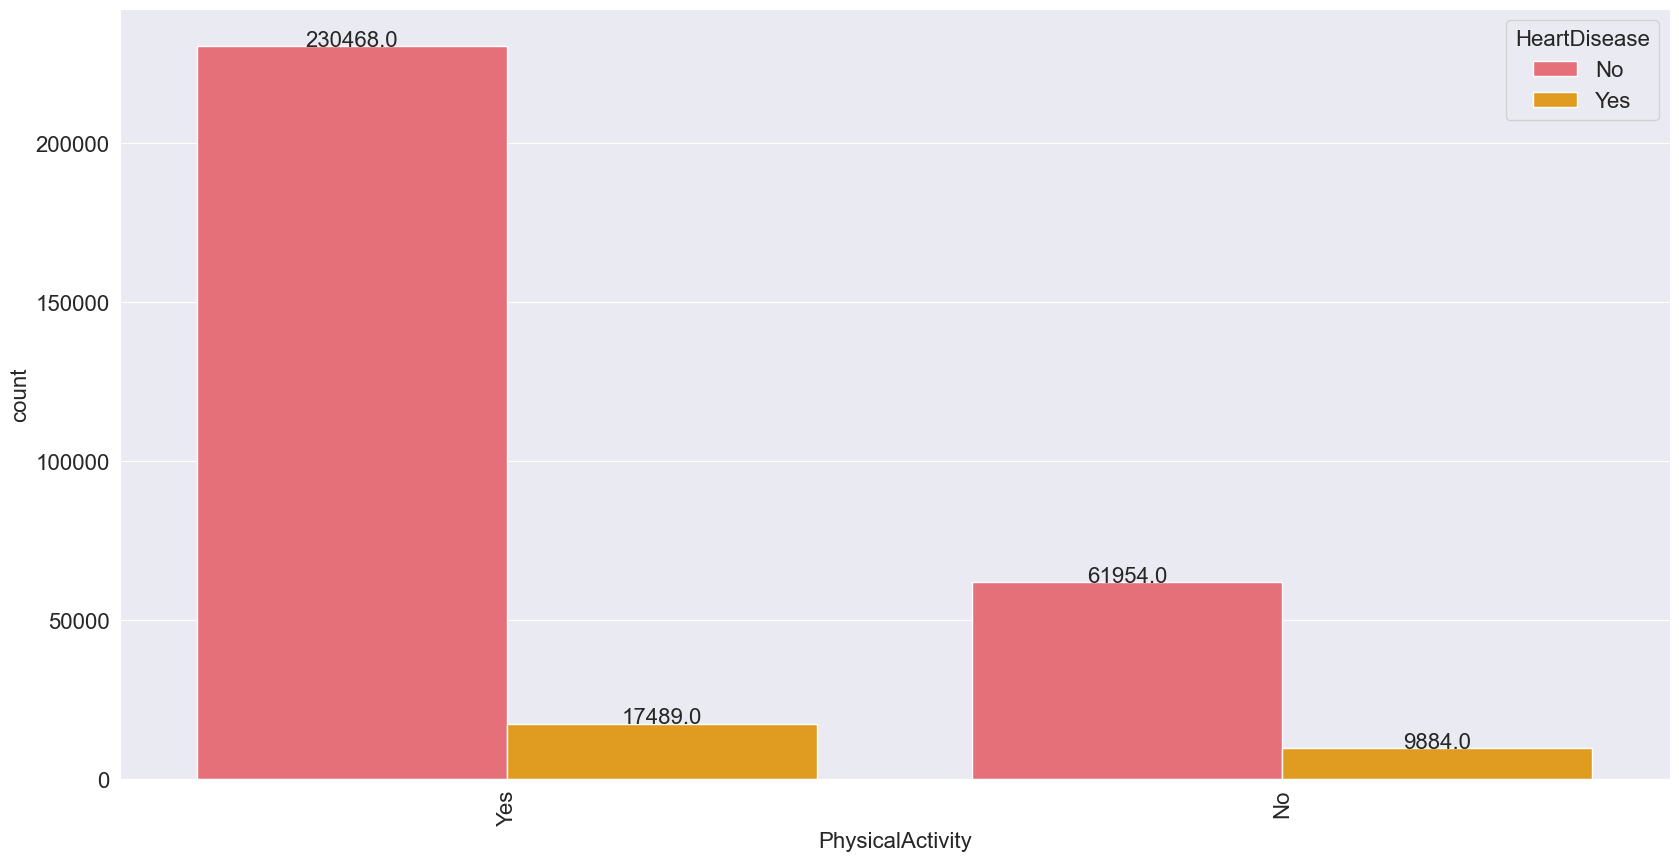

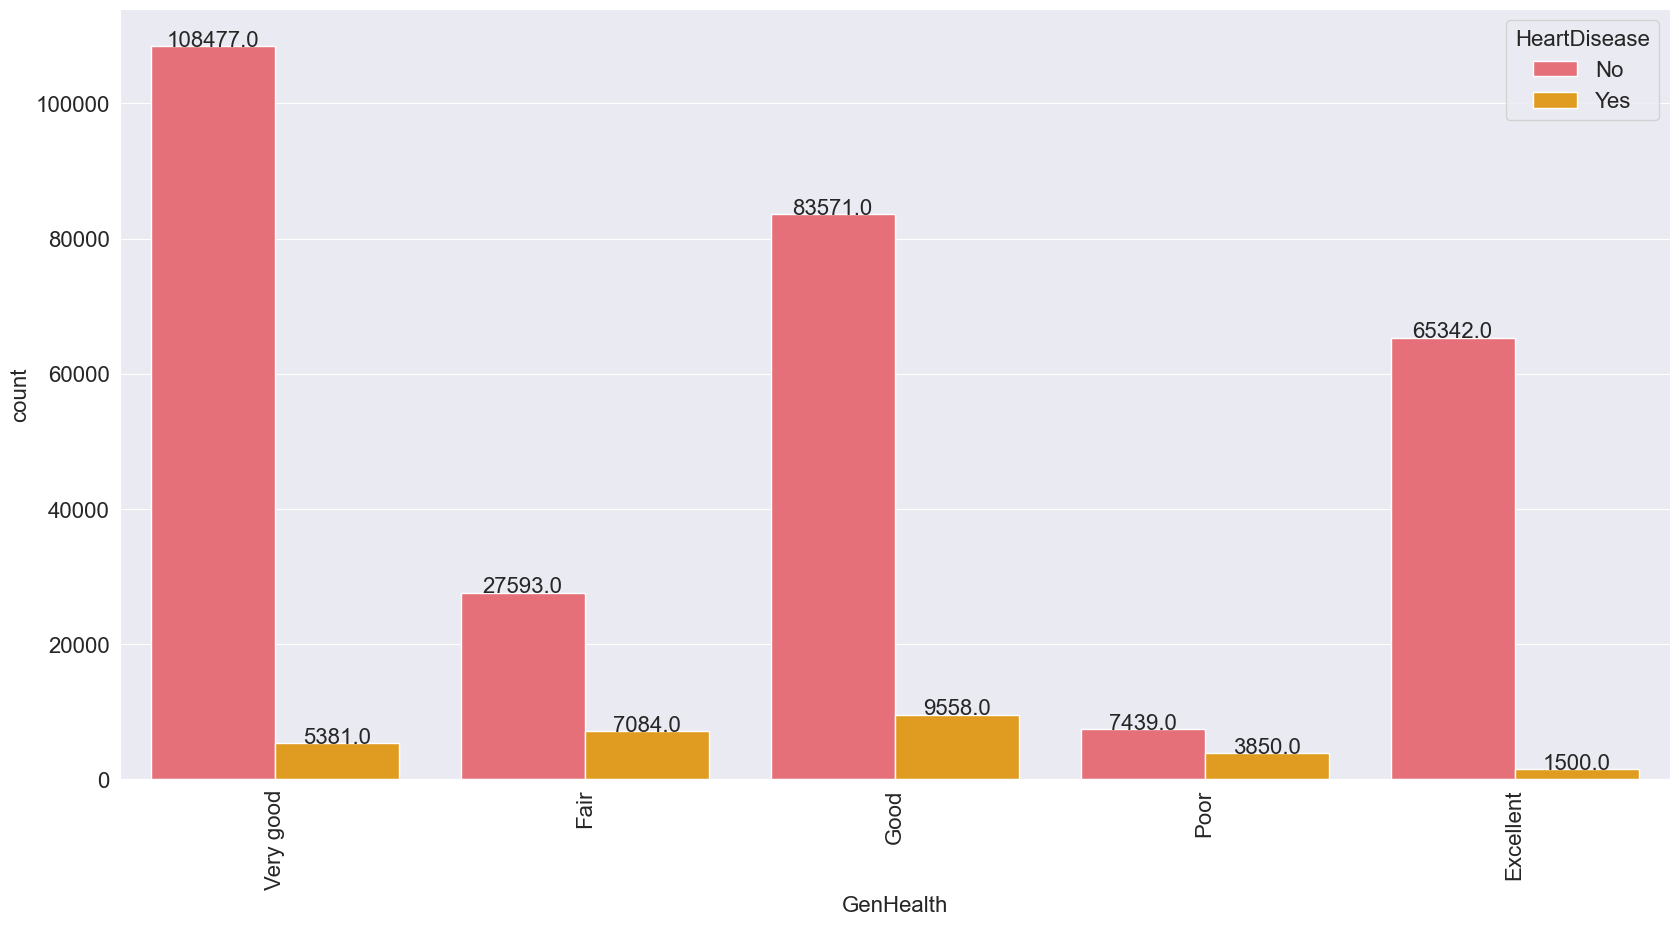

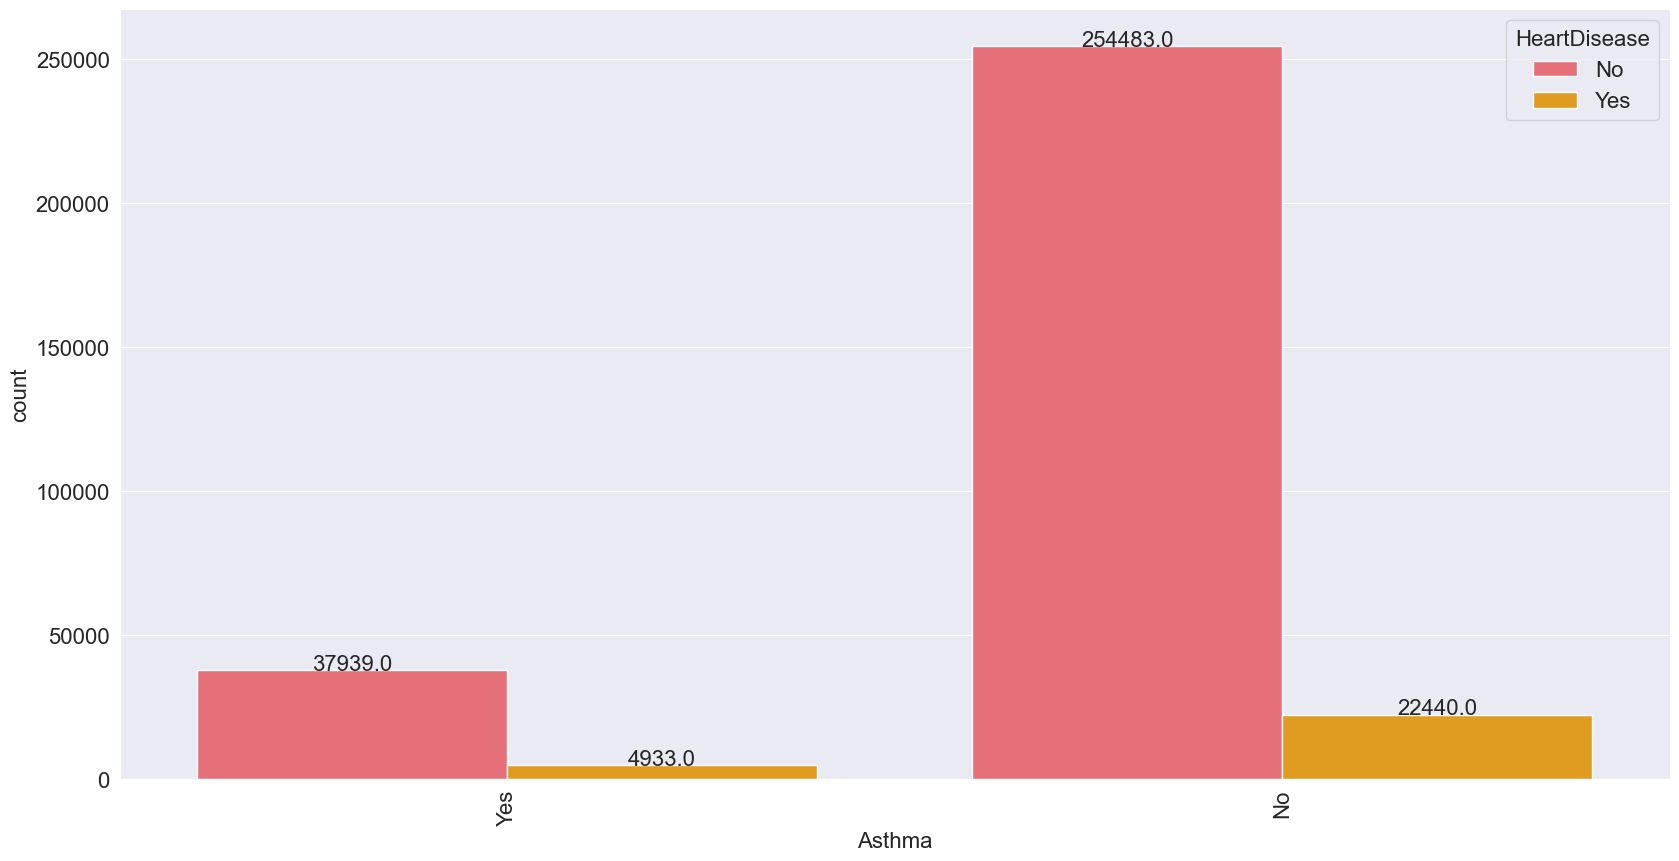

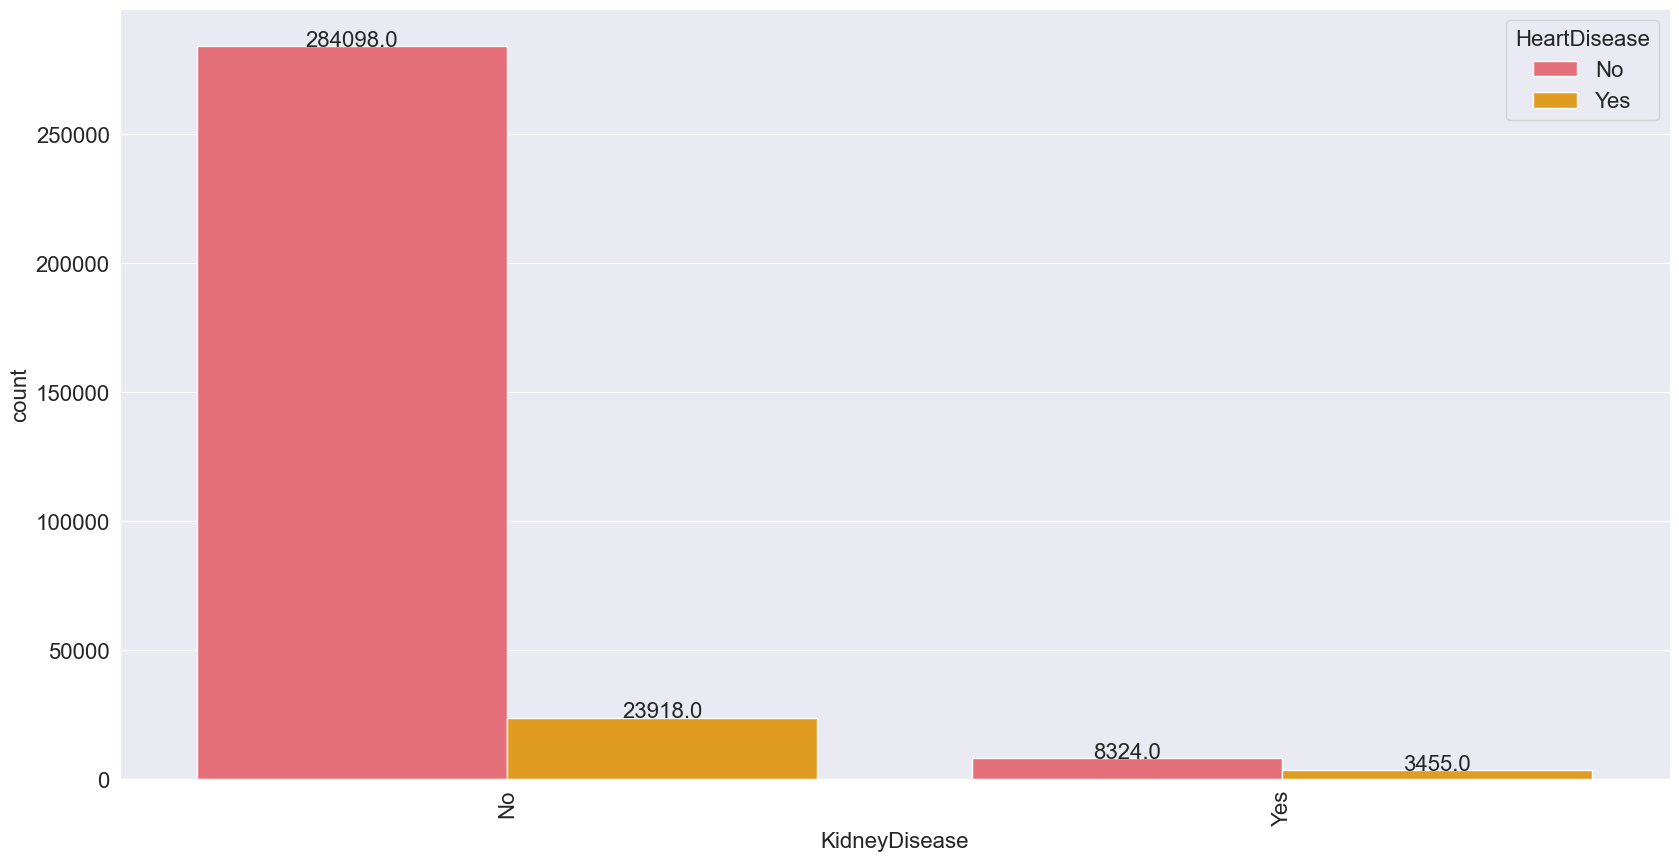

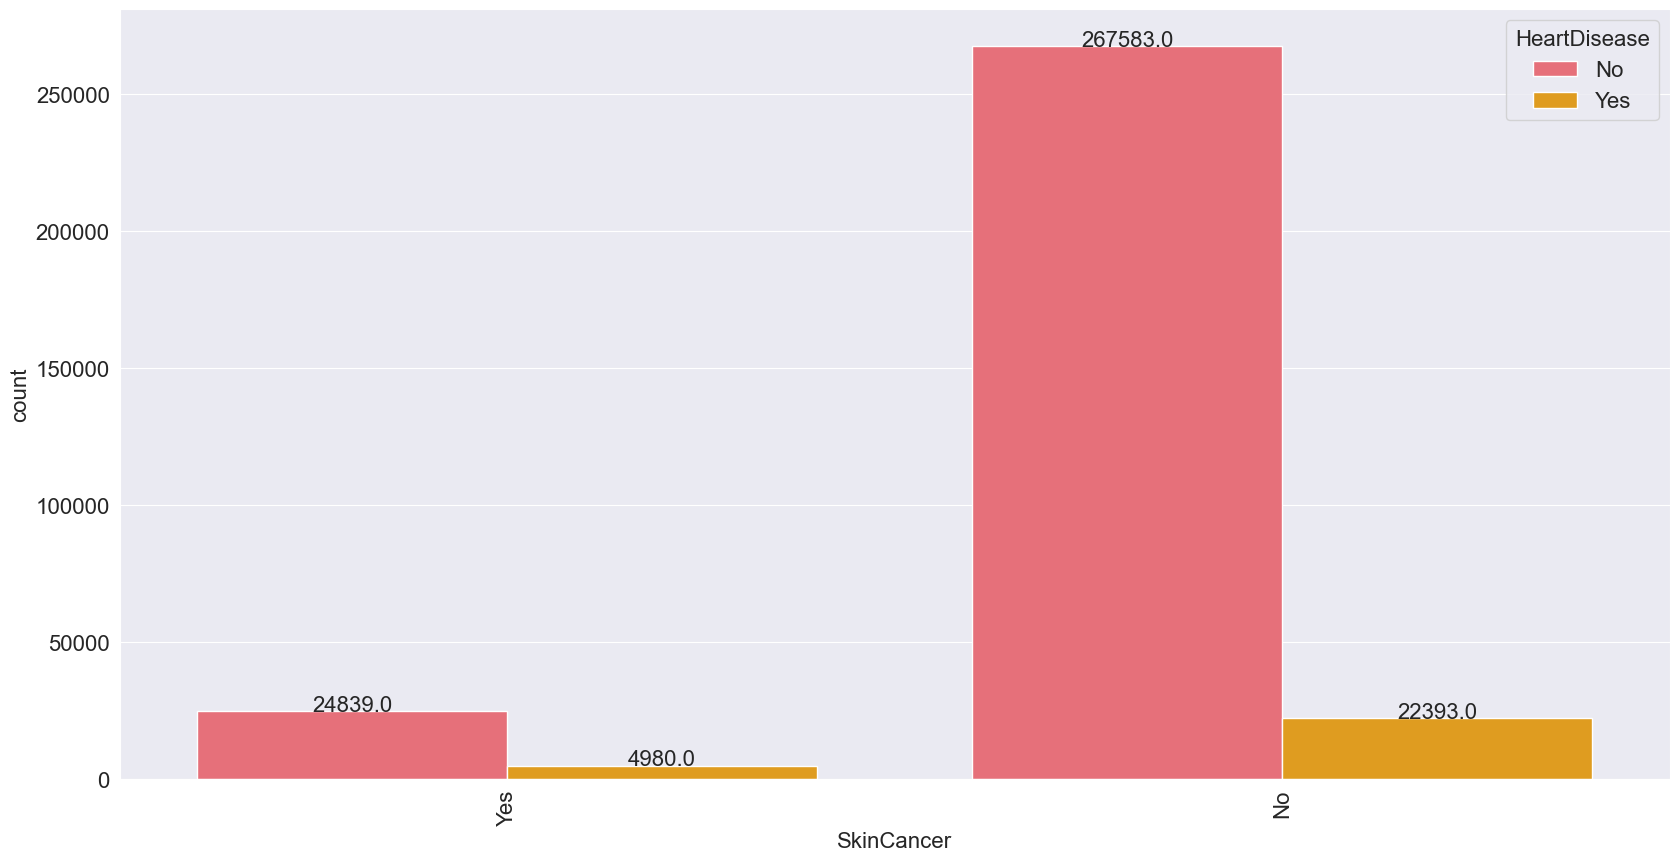

In [26]:
#Analysing the distribution of categorical variables against the Outcome Variable
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(20,10))
  graph = sns.countplot(ax=ax1,x = feature , data = heart_df,hue='HeartDisease',palette=colors2)
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

we can see from above charts:
1.   number of people they smoking and have heart disease is more than they don't
2.   number of people they don't drink alcohol and have heart disease is more than they don't
3.   males have heart disease more than females
4.   people who have difficulty walking can have heart disease more than don't
5.   people who have stroke can have heart disease more than don't
6.  people older than 40 years old can have heart disease more than others
7.   Gen health for most people is very good and all can have heart disease in equal proportions
8.  People who are not physically active can get heart disease more than others

- Most of people in our data are white and have no diabetic.
- Most of them had done a physical activity during the past 30 days other than their regular job and in general they have very good health as they said.
- A litle of them who have asthma, kidney disease and skin cancer.
- Most people said that they have generaly very good health. A few of people who said that they have generaly a poor health.

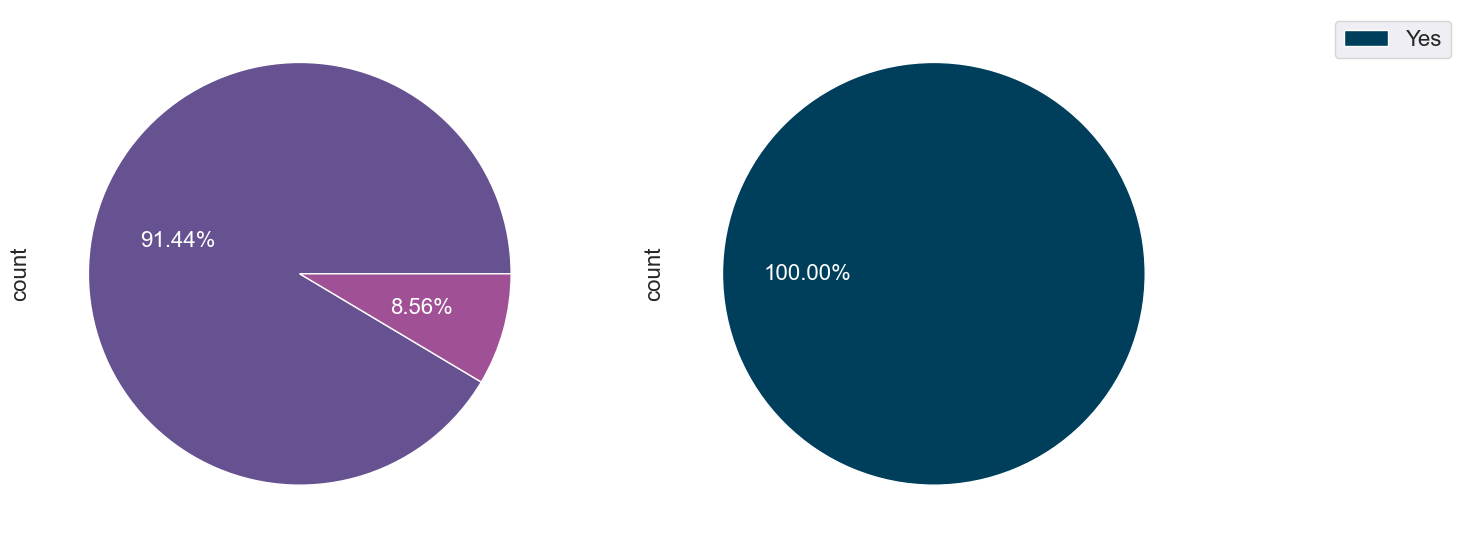

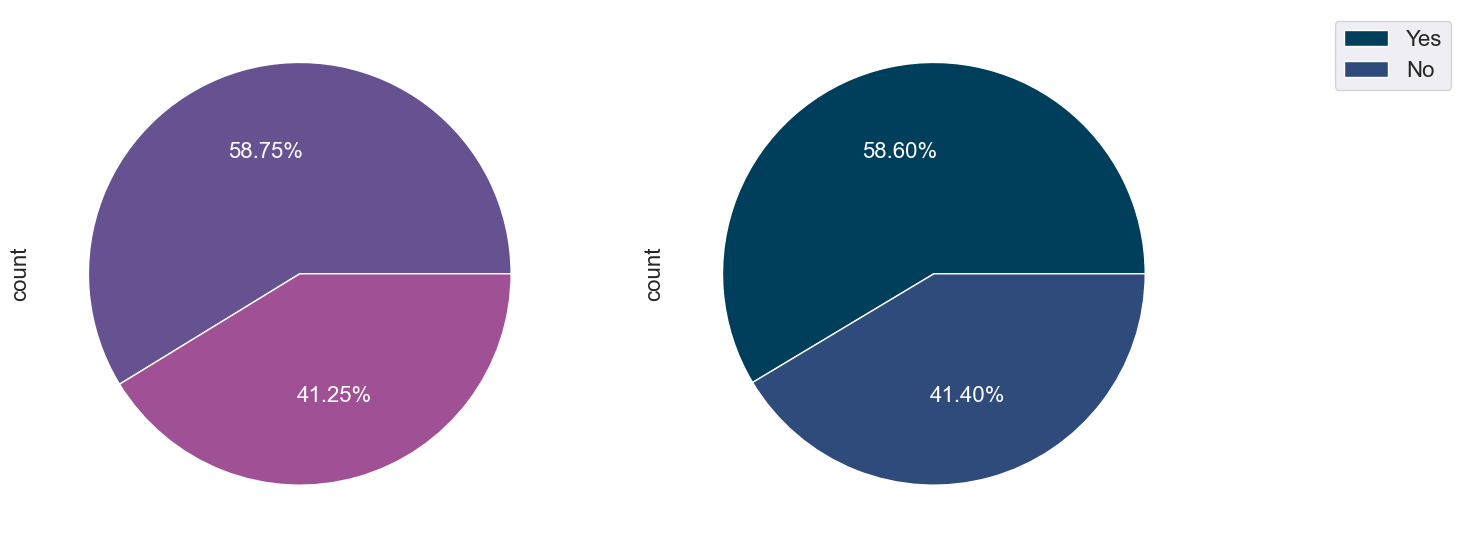

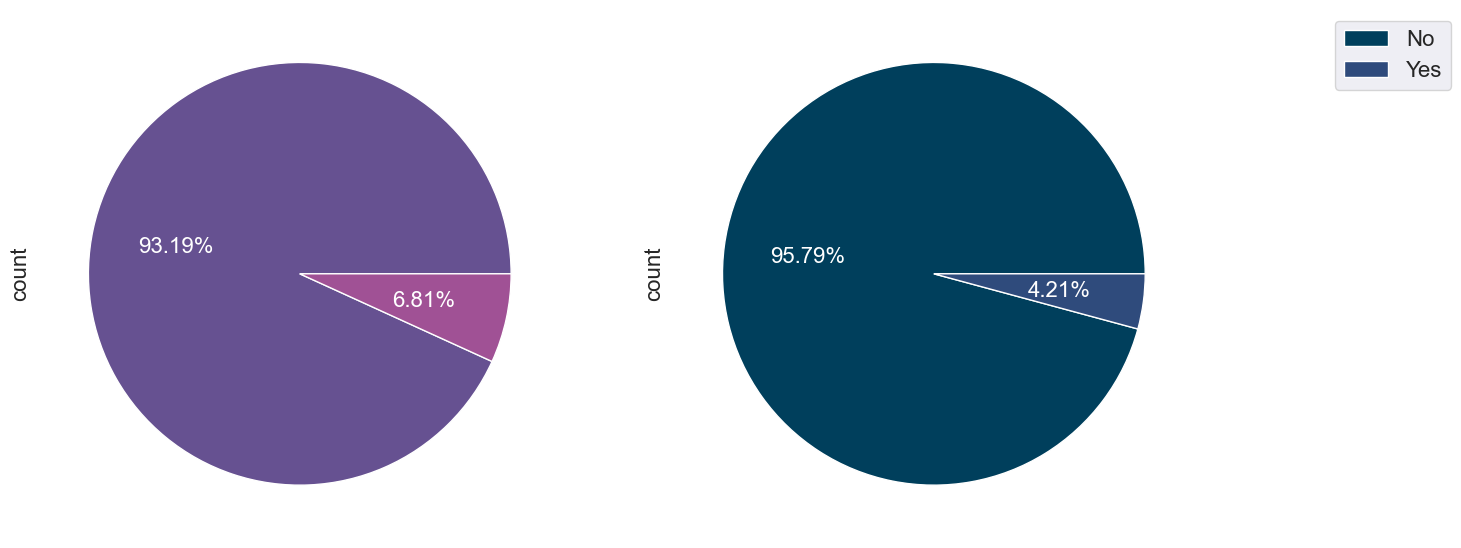

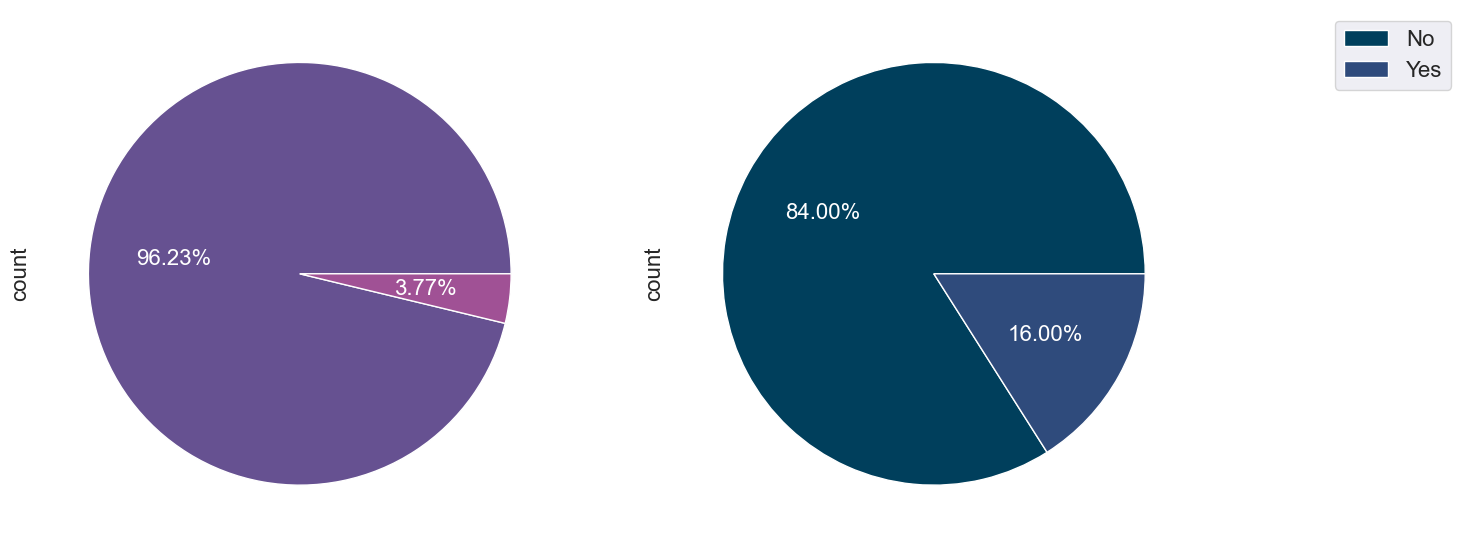

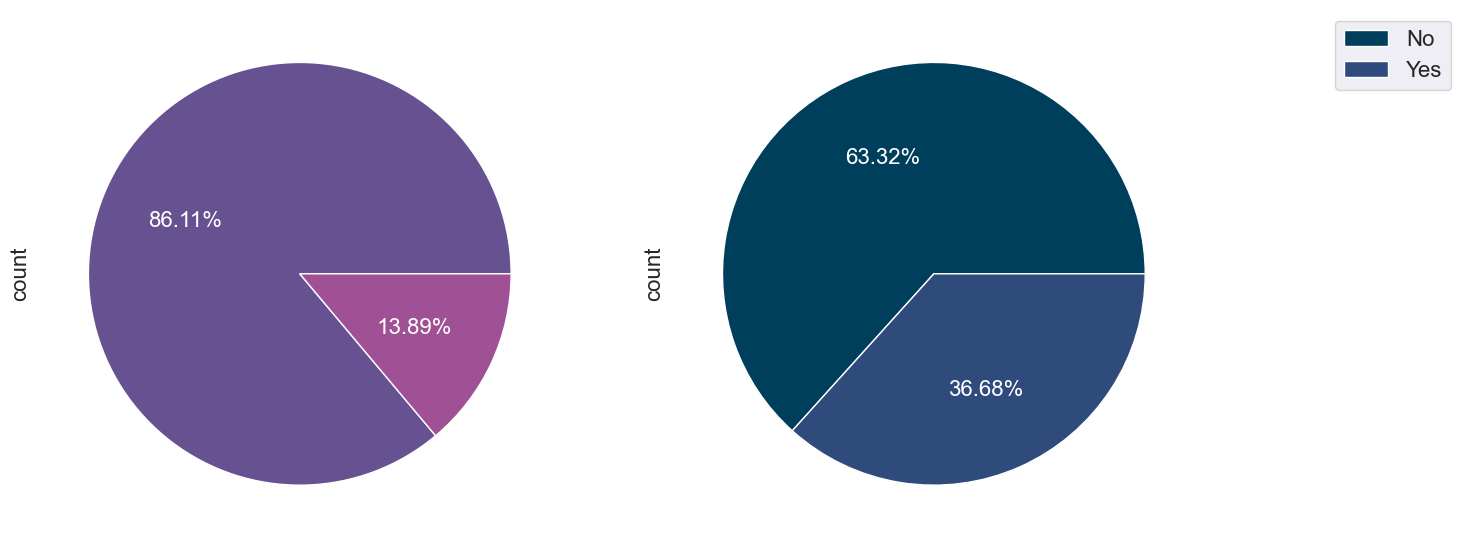

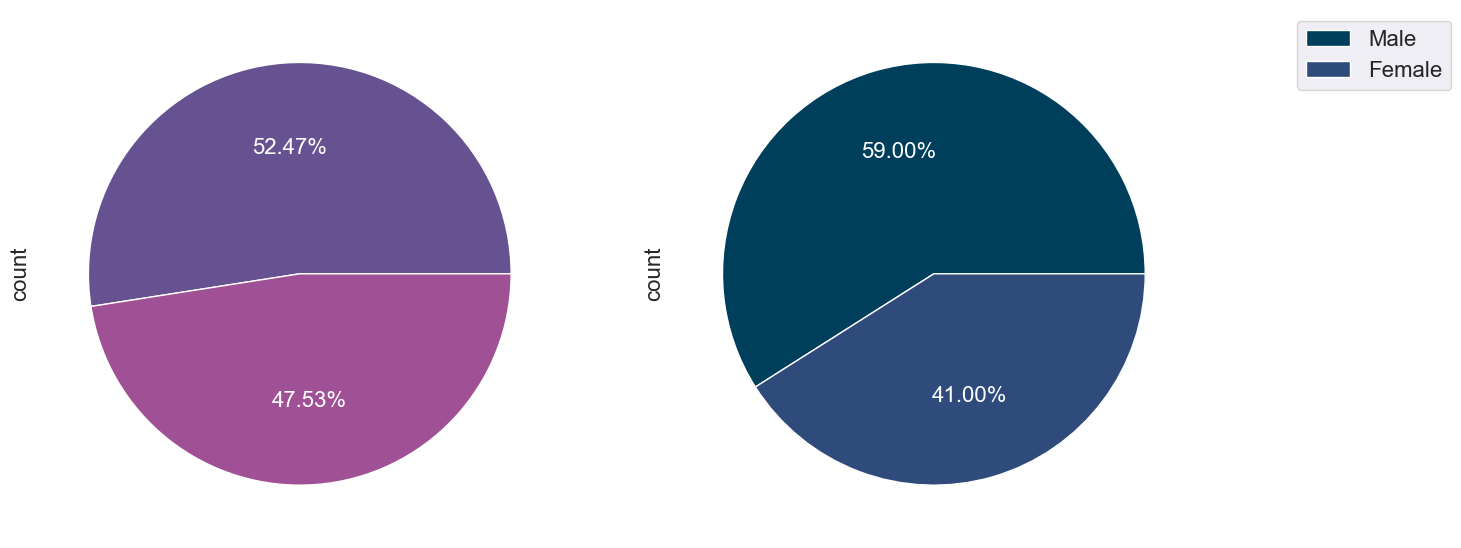

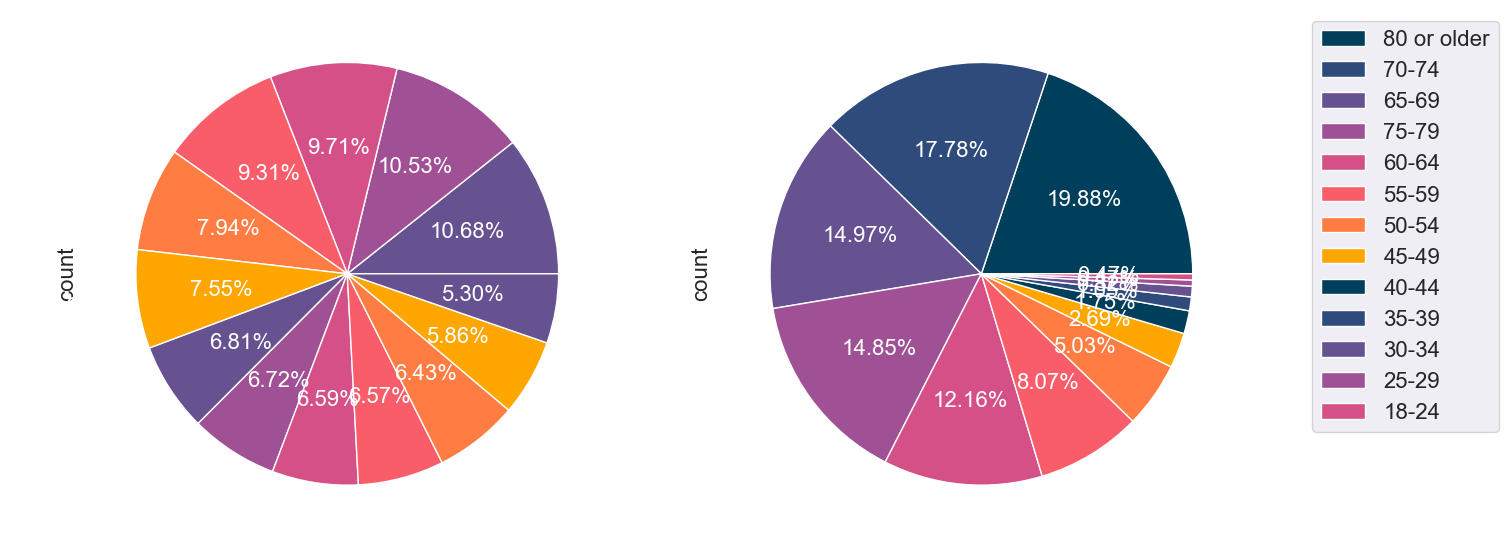

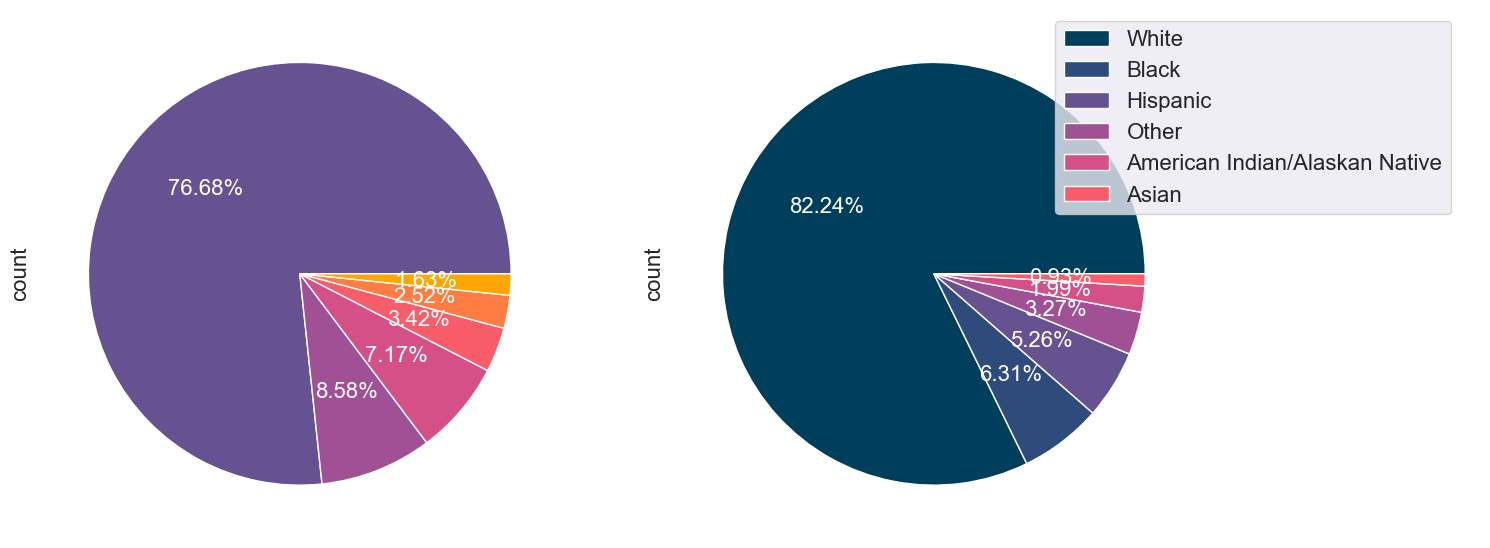

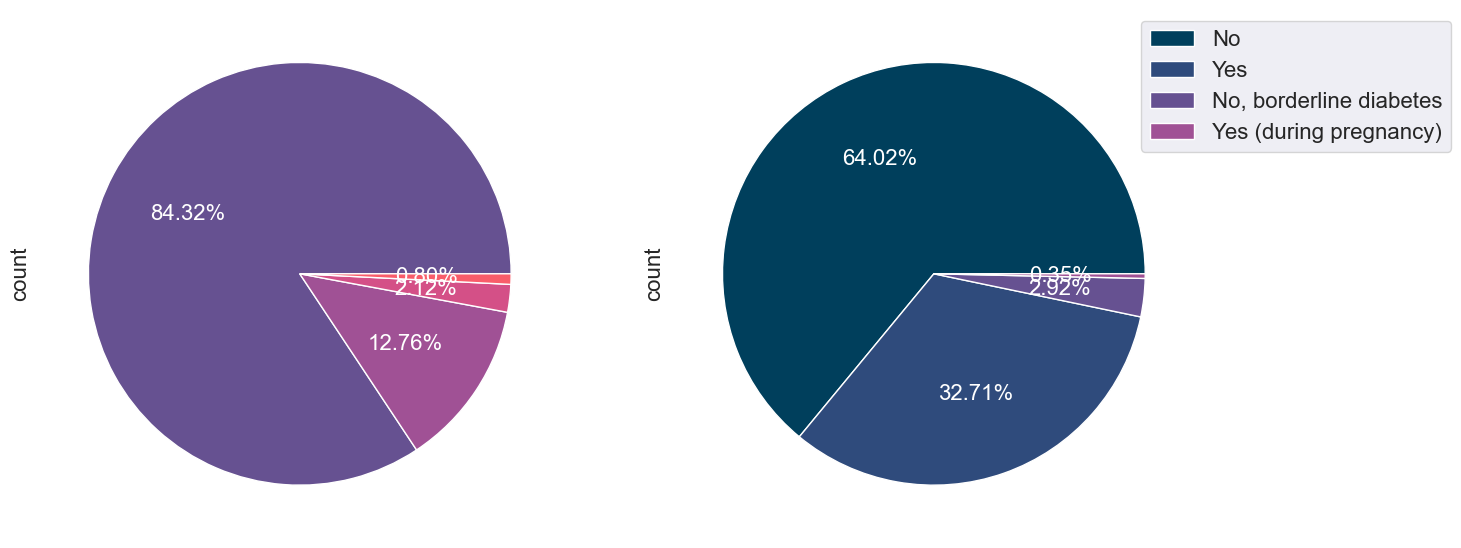

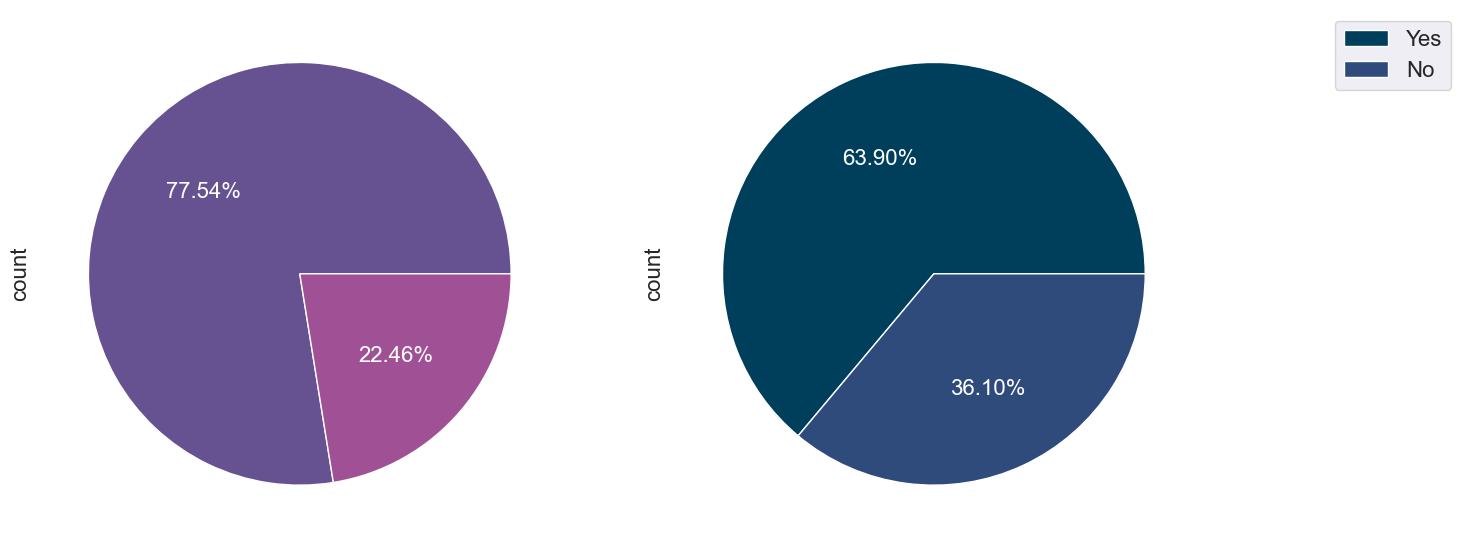

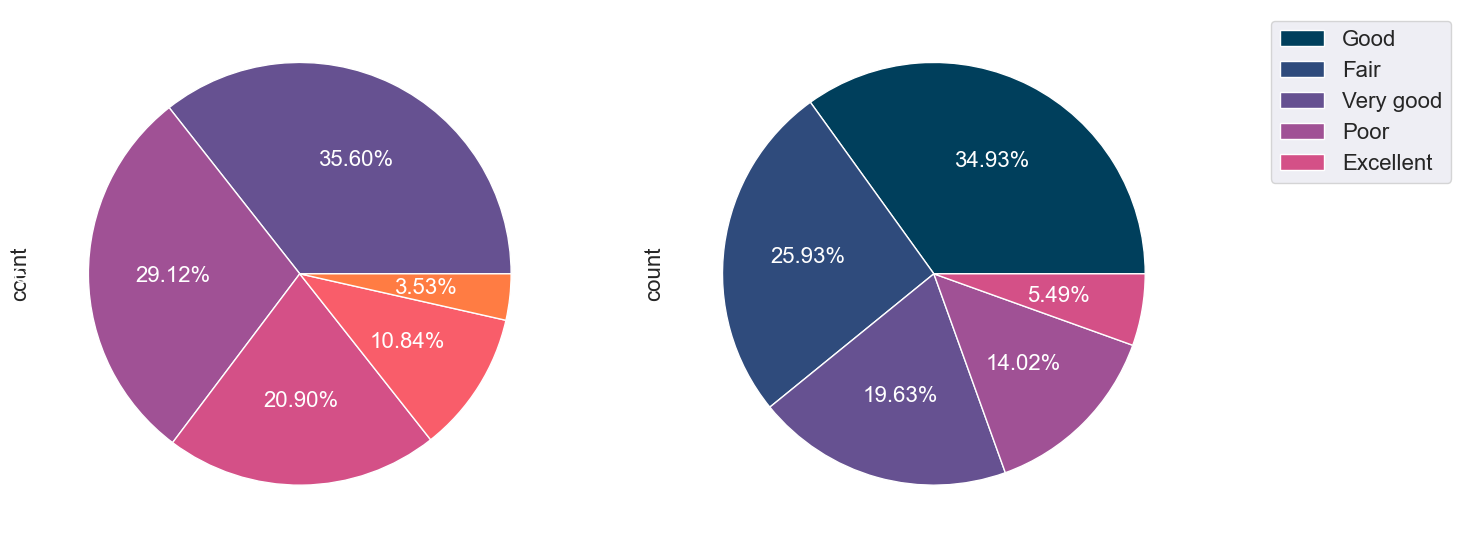

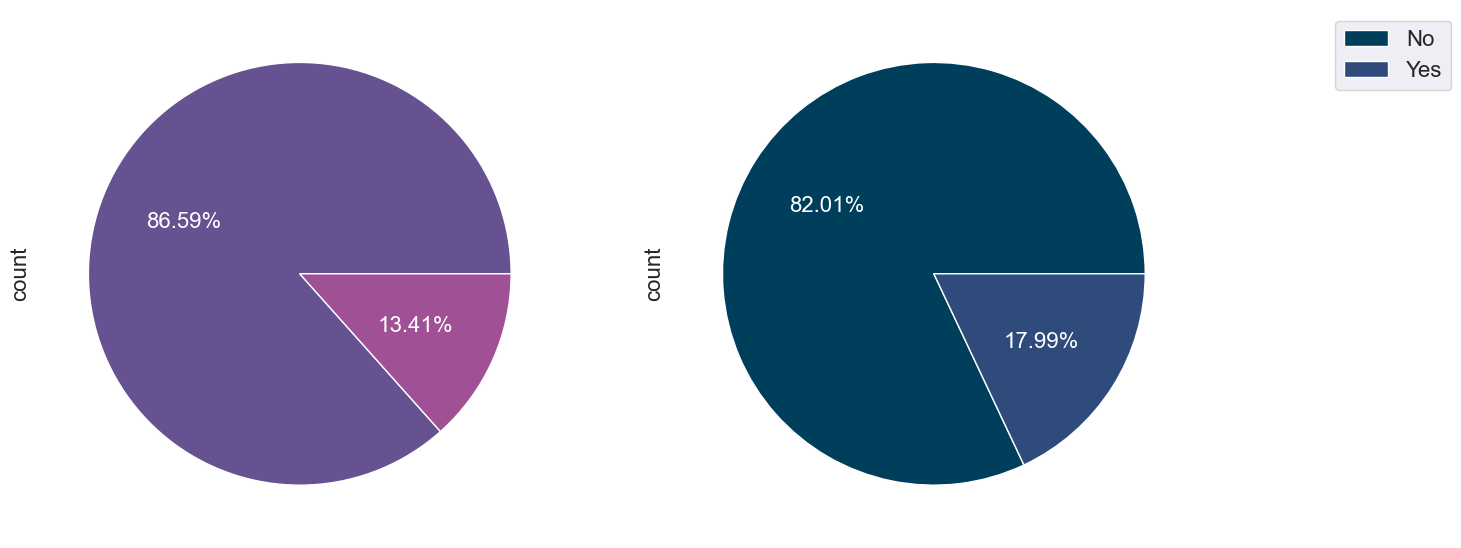

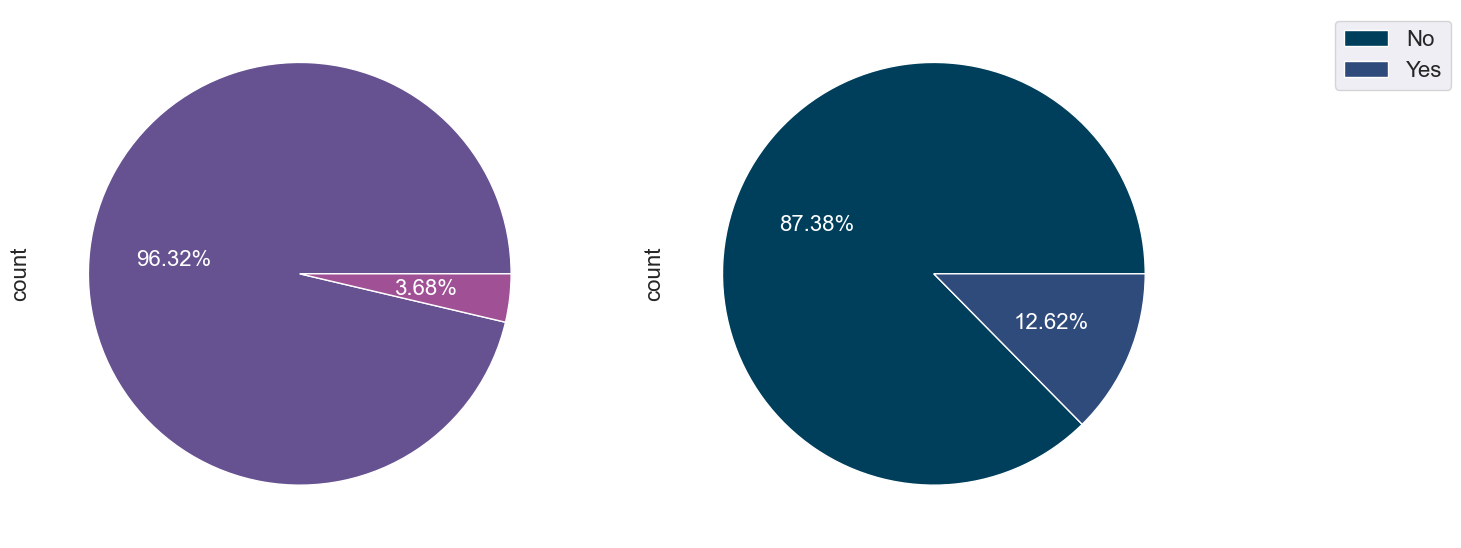

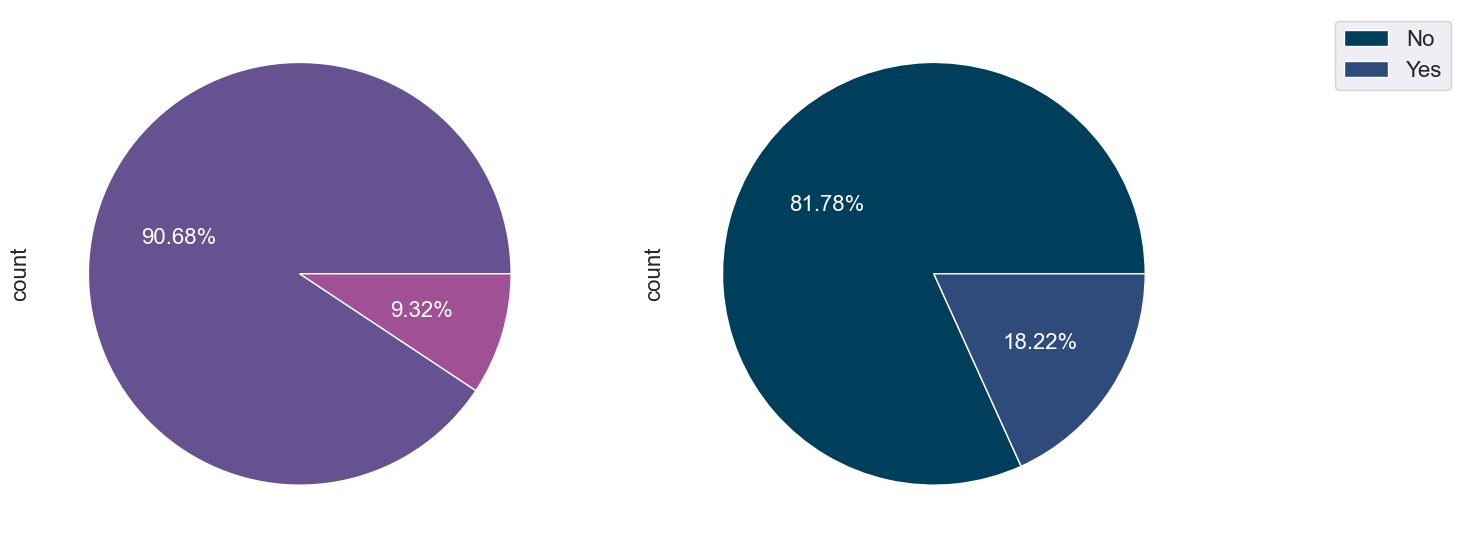

<Figure size 640x480 with 0 Axes>

In [27]:
#What are the percentages for each categorical variable?
for col in categorical_features:
    fig, ax = plt.subplots(1,2, figsize=(15,15))
    round(heart_df[col].value_counts()/heart_df.shape[0]*100, 2).plot.pie(autopct="%1.2f%%", ax=ax[0], textprops={"color":"white"}, colors=colors6, radius = 1)
    round(heart_df[(heart_df['HeartDisease'] == 'Yes')][col].value_counts()/heart_df.shape[0]*100, 2).plot.pie(autopct="%1.2f%%", ax=ax[1], textprops={"color":"white"},colors=colors8, radius = 1)
    plt.legend(loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show();

plt.tight_layout()

Smoking Vs. HeartDisease

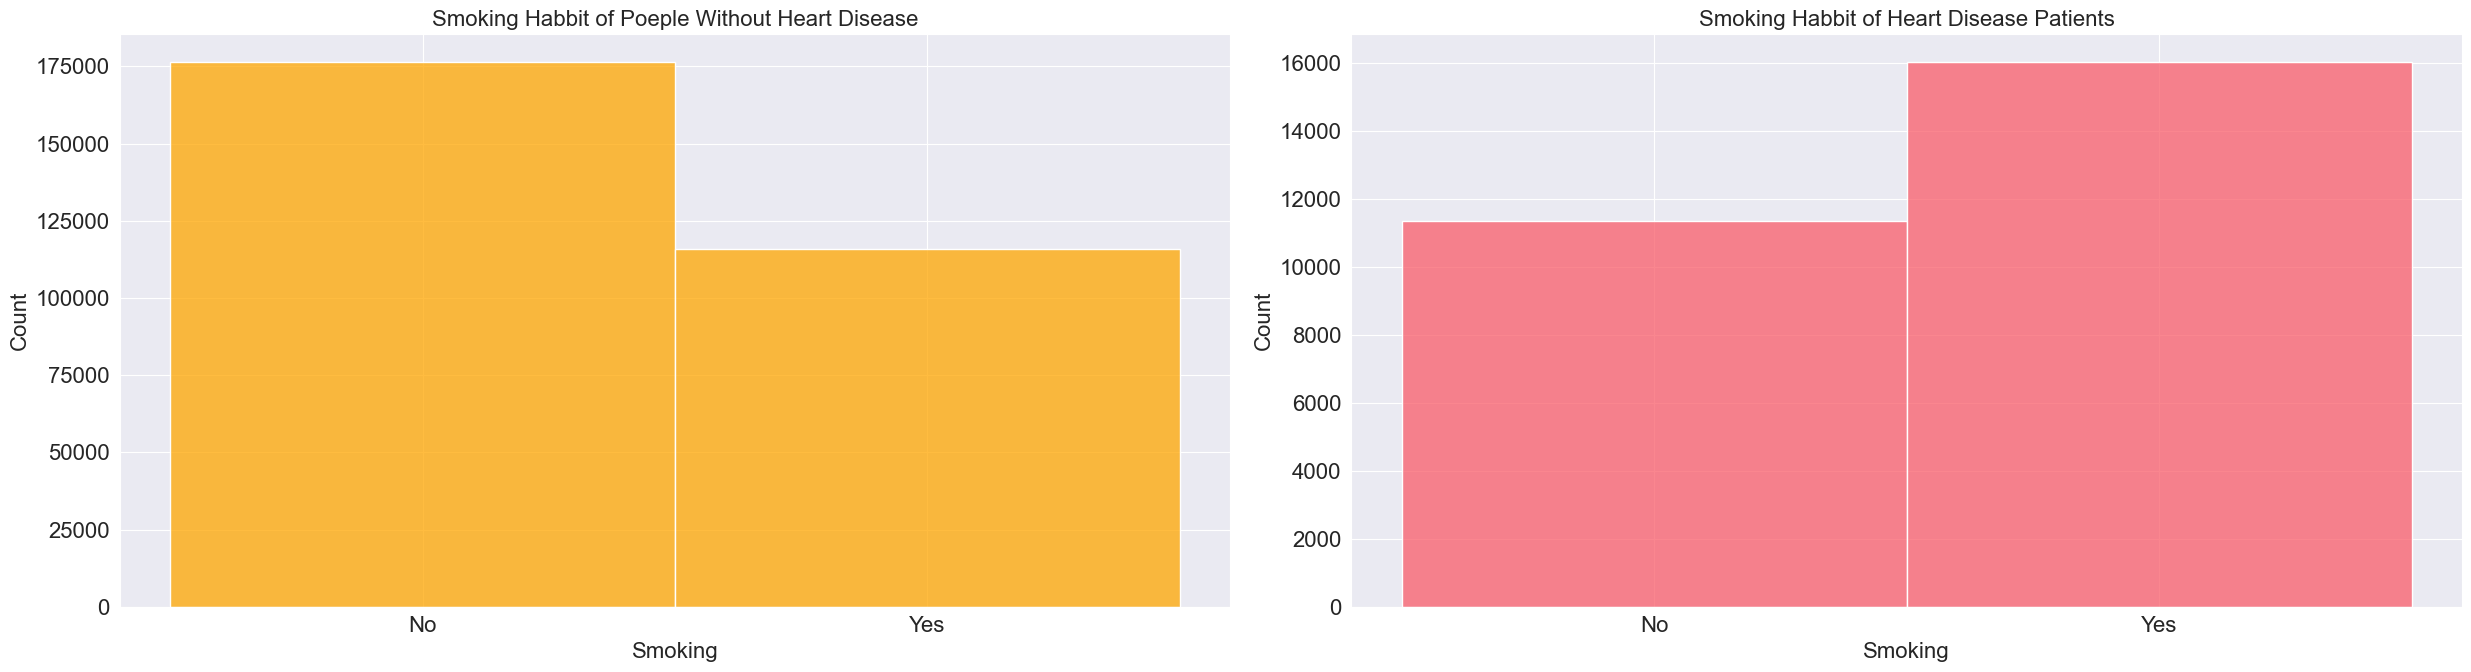

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'No'].sort_values("Smoking"), x='Smoking',
                  color=colors1[0], ax=ax1 );
ax1.set_title("Smoking Habbit of Poeple Without Heart Disease")
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'Yes'].sort_values("Smoking"), x='Smoking',
                  color=colors2[0], ax=ax2);
ax2.set_title("Smoking Habbit of Heart Disease Patients")
fig.tight_layout()

We can observe that the people who are smoking are more susceptible to the heart disease.

AlcoholDrinking Vs. HeartDisease

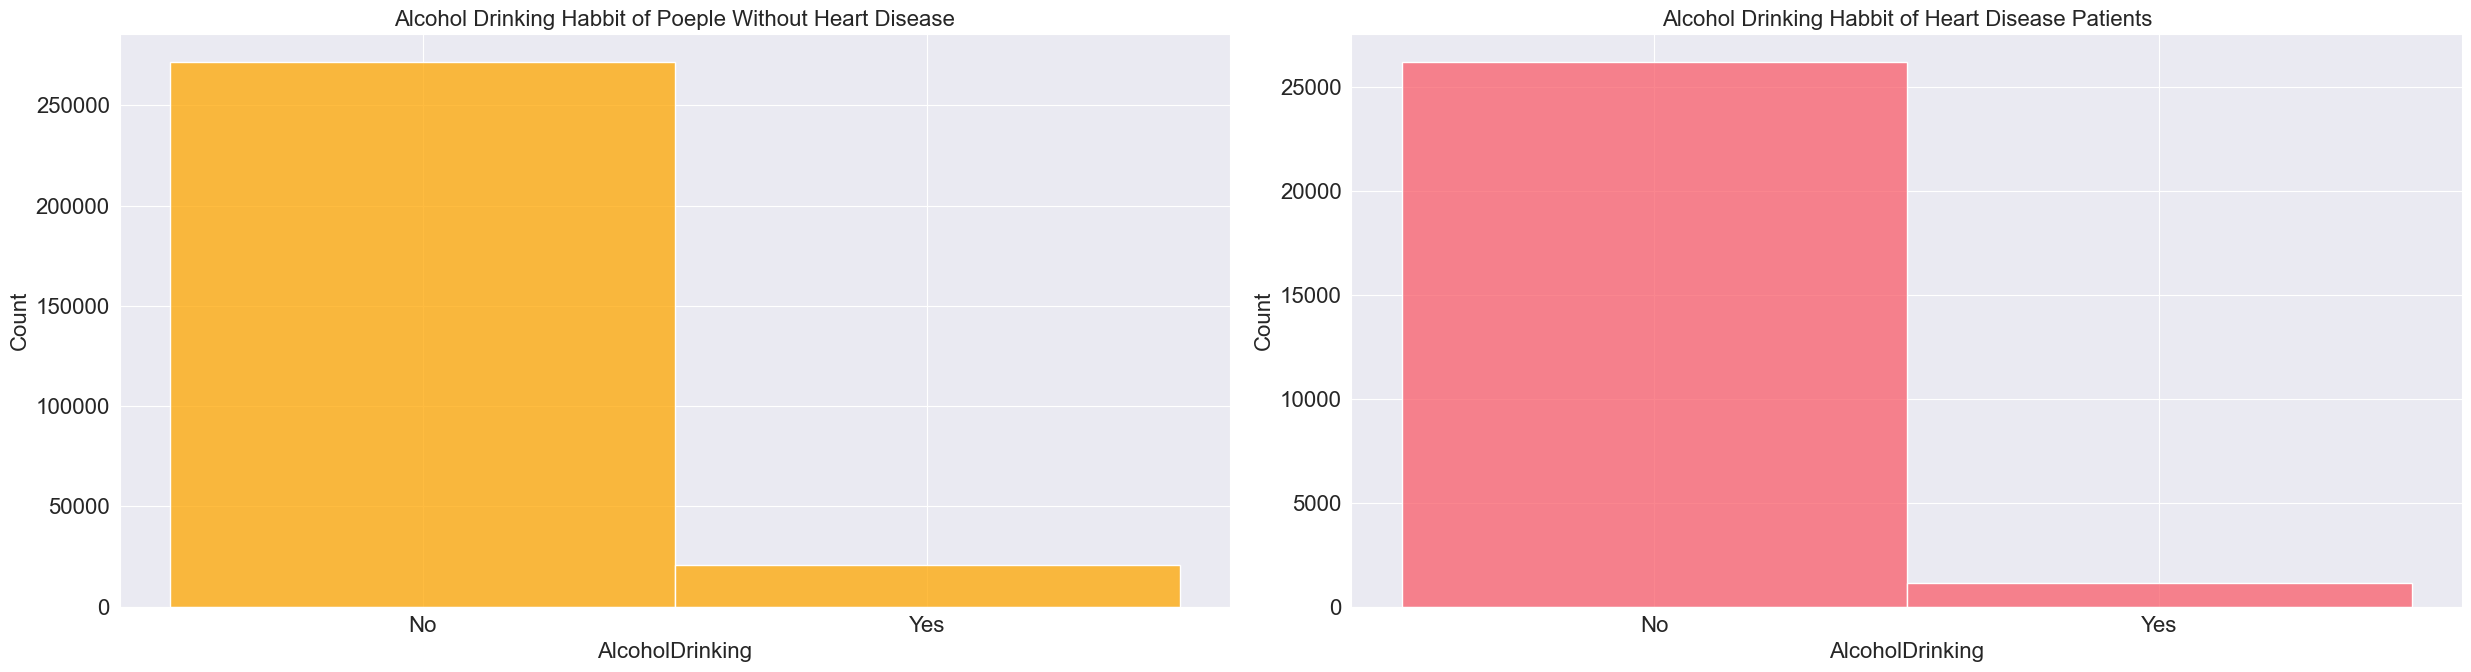

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'No'].sort_values("AlcoholDrinking"), x='AlcoholDrinking',
                  color=colors1[0], ax=ax1, );
ax1.set_title("Alcohol Drinking Habbit of Poeple Without Heart Disease")
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'Yes'].sort_values("AlcoholDrinking"), x='AlcoholDrinking',
                  color=colors2[0], ax=ax2);
ax2.set_title("Alcohol Drinking Habbit of Heart Disease Patients")
fig.tight_layout()

People who are not drinking alchol, some of them have a heat disease

Stroke Vs. HeartDisease

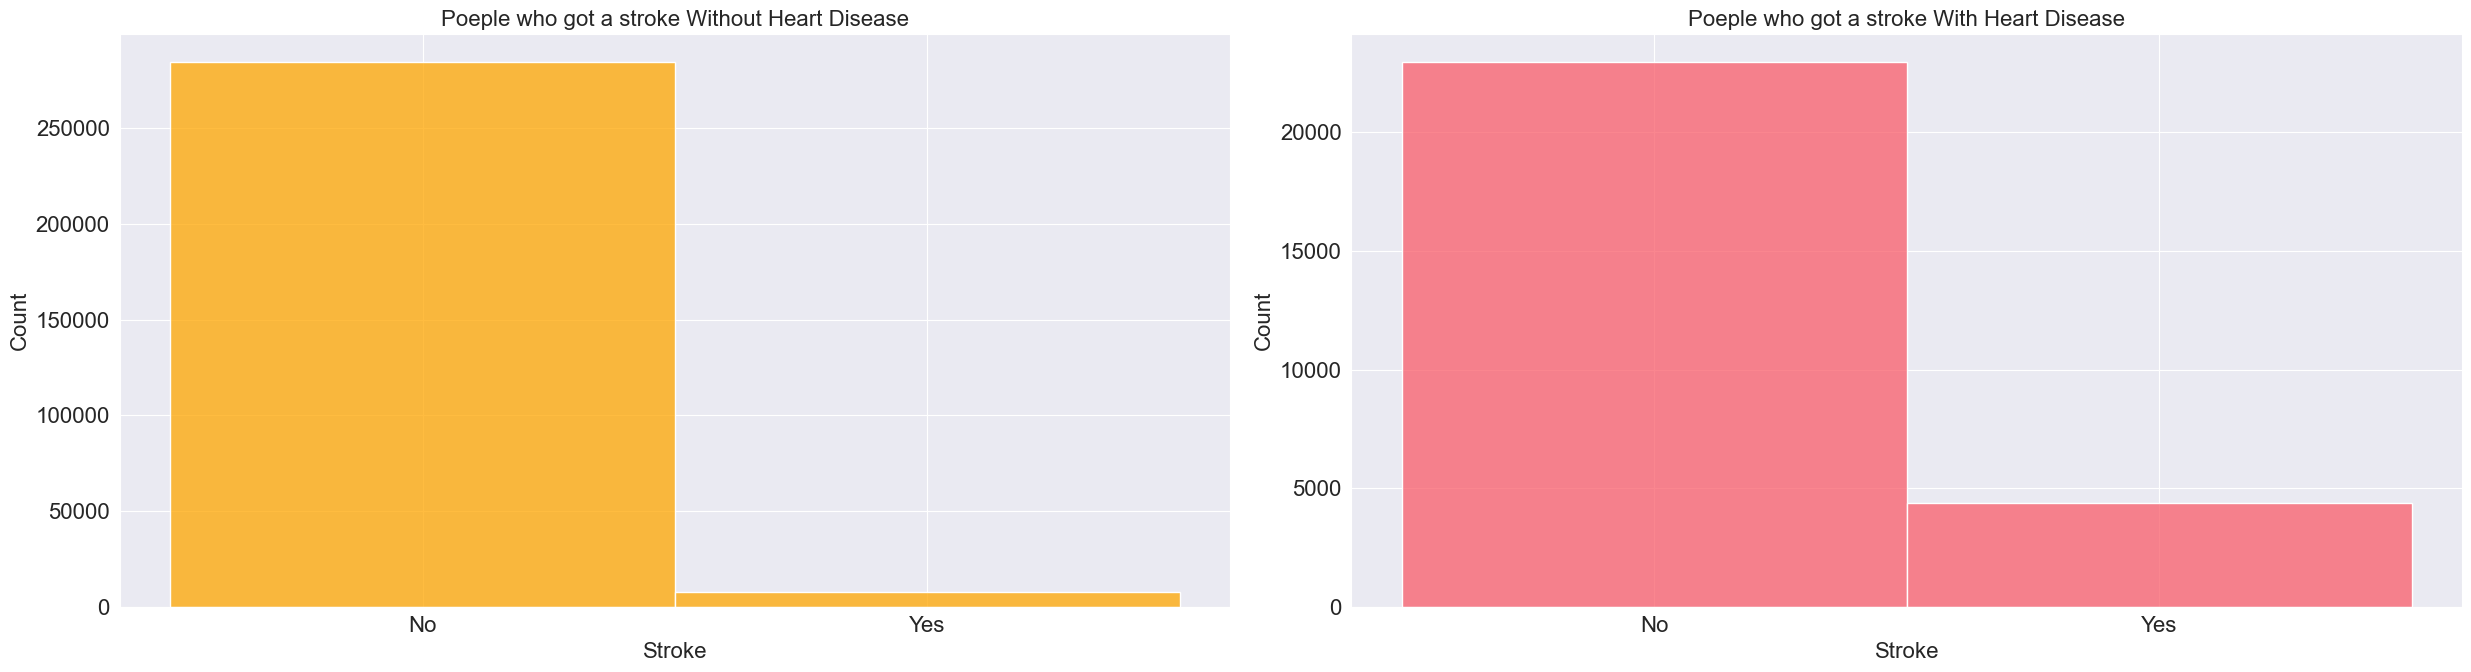

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'No'].sort_values("Stroke"), x='Stroke',
                  color=colors1[0], ax=ax1, );
ax1.set_title("Poeple who got a stroke Without Heart Disease")
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'Yes'].sort_values("Stroke"), x='Stroke',
                  color=colors2[0], ax=ax2);
ax2.set_title("Poeple who got a stroke With Heart Disease")
fig.tight_layout()

Stroke is highly correlated with heart disease.

DiffWalking Vs. HeartDisease

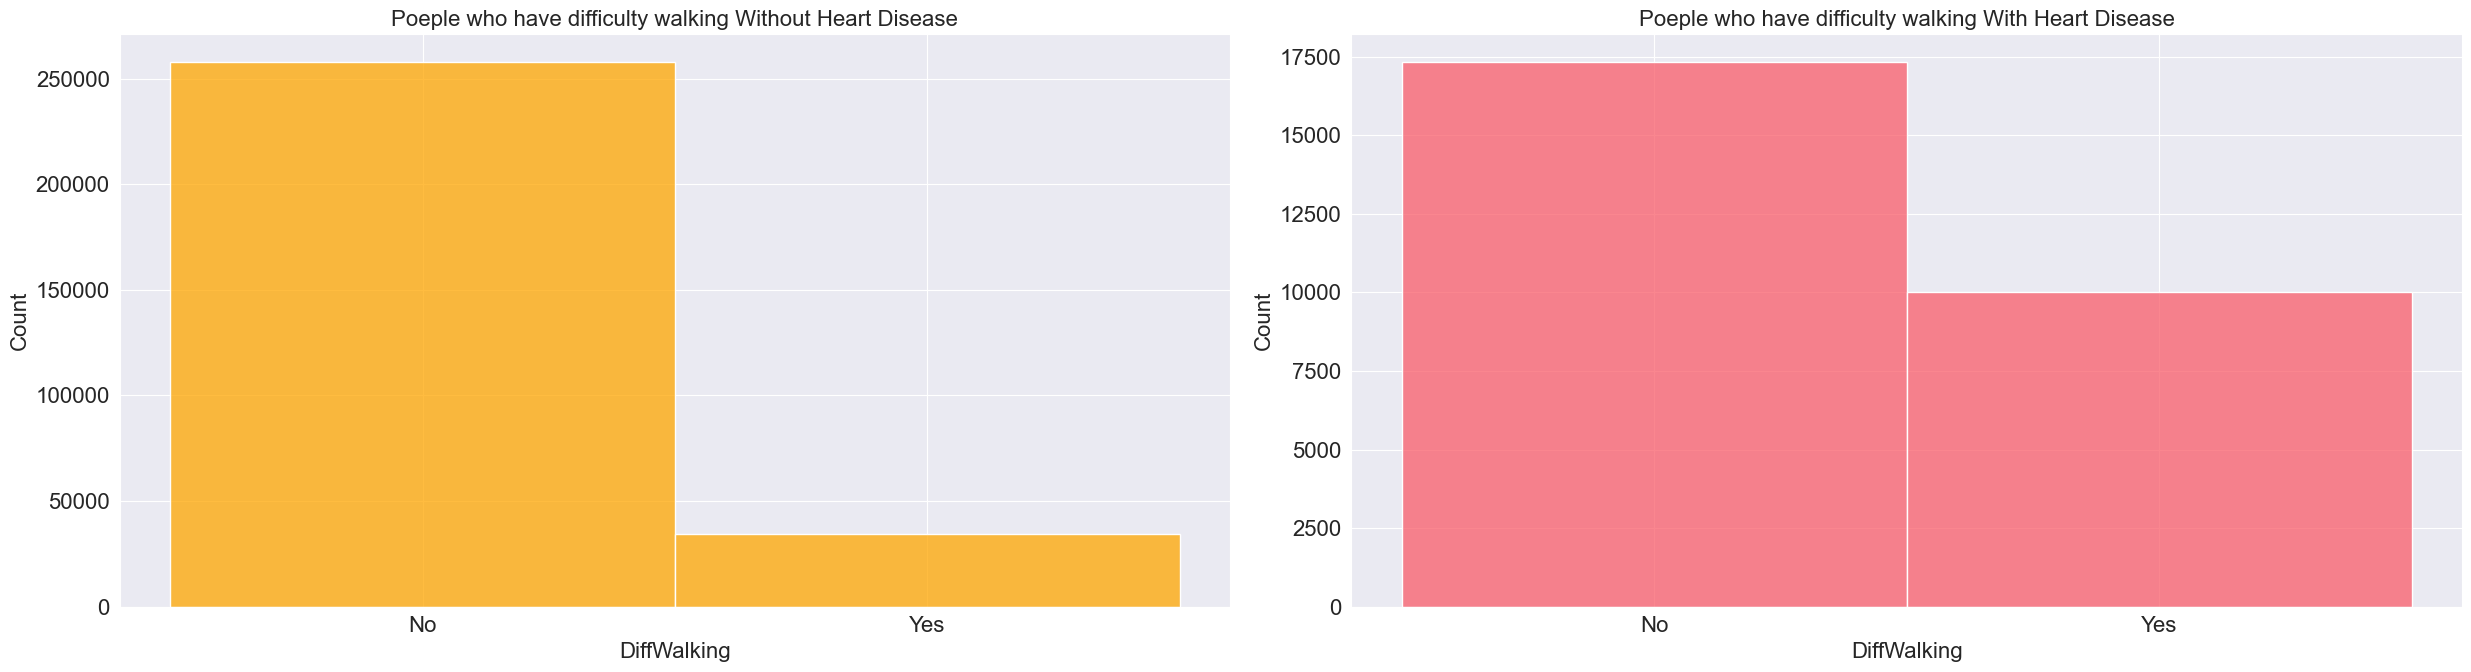

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'No'].sort_values("DiffWalking"), x='DiffWalking',
                  color=colors1[0], ax=ax1, );
ax1.set_title("Poeple who have difficulty walking Without Heart Disease")
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'Yes'].sort_values("DiffWalking"), x='DiffWalking',
                  color=colors2[0], ax=ax2);
ax2.set_title("Poeple who have difficulty walking With Heart Disease")
fig.tight_layout()

Sex Vs. HeartDisease

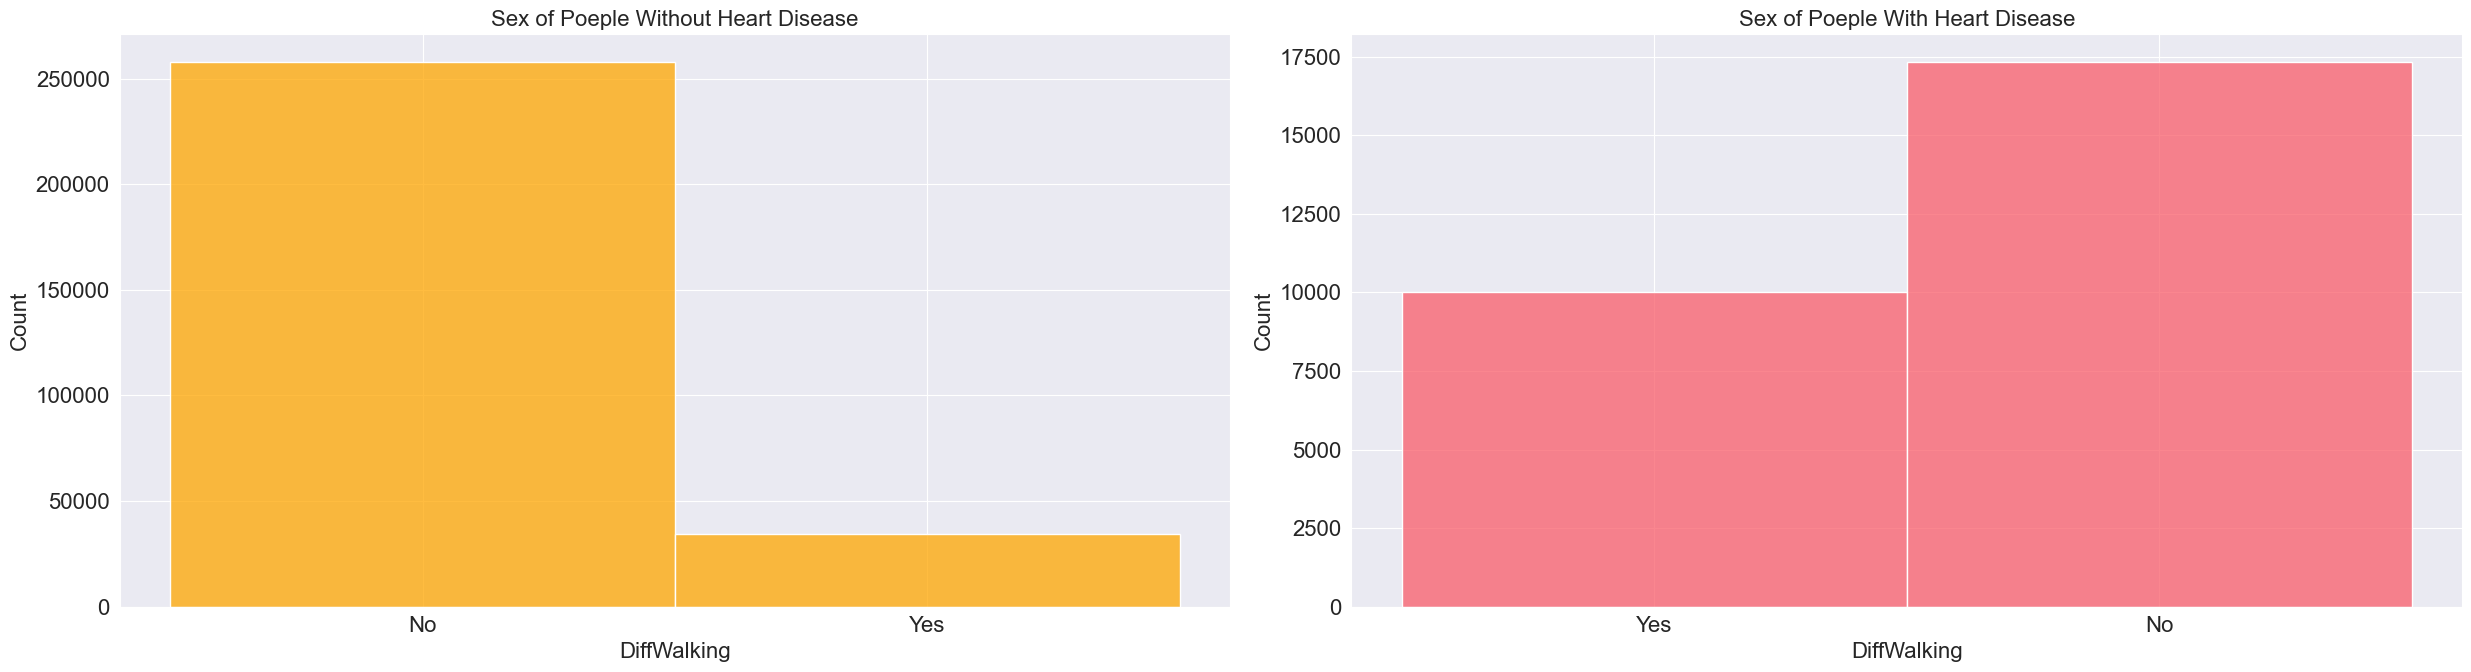

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'No'].sort_values("Sex"), x='DiffWalking',
                  color=colors1[0], ax=ax1, );
ax1.set_title("Sex of Poeple Without Heart Disease")
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'Yes'].sort_values("Sex"), x='DiffWalking',
                  color=colors2[0], ax=ax2);
ax2.set_title("Sex of Poeple With Heart Disease")
fig.tight_layout()

In our data, Males are more susceptible to the heart disease.

AgeCategory Vs. HeartDisease

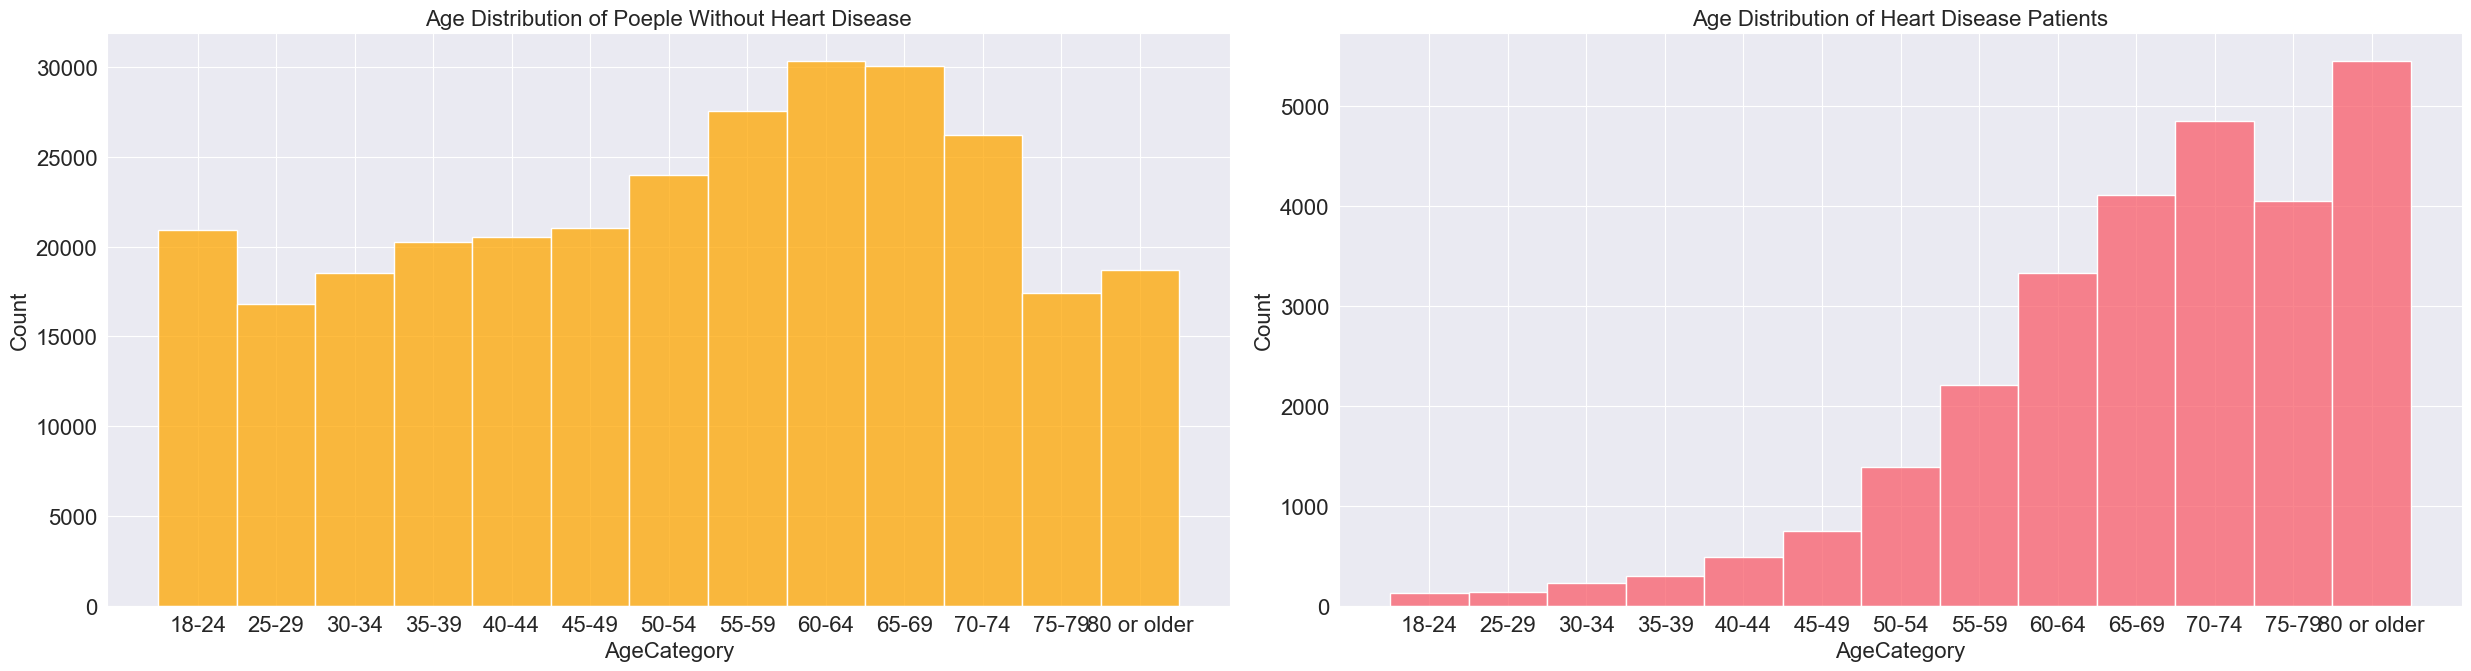

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'No'].sort_values("AgeCategory"), x='AgeCategory',
                  color=colors1[0], ax=ax1, );
ax1.set_title("Age Distribution of Poeple Without Heart Disease")
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'Yes'].sort_values("AgeCategory"), x='AgeCategory',
                  color=colors2[0], ax=ax2);
ax2.set_title("Age Distribution of Heart Disease Patients")
fig.tight_layout()

Race Vs. HeartDisease

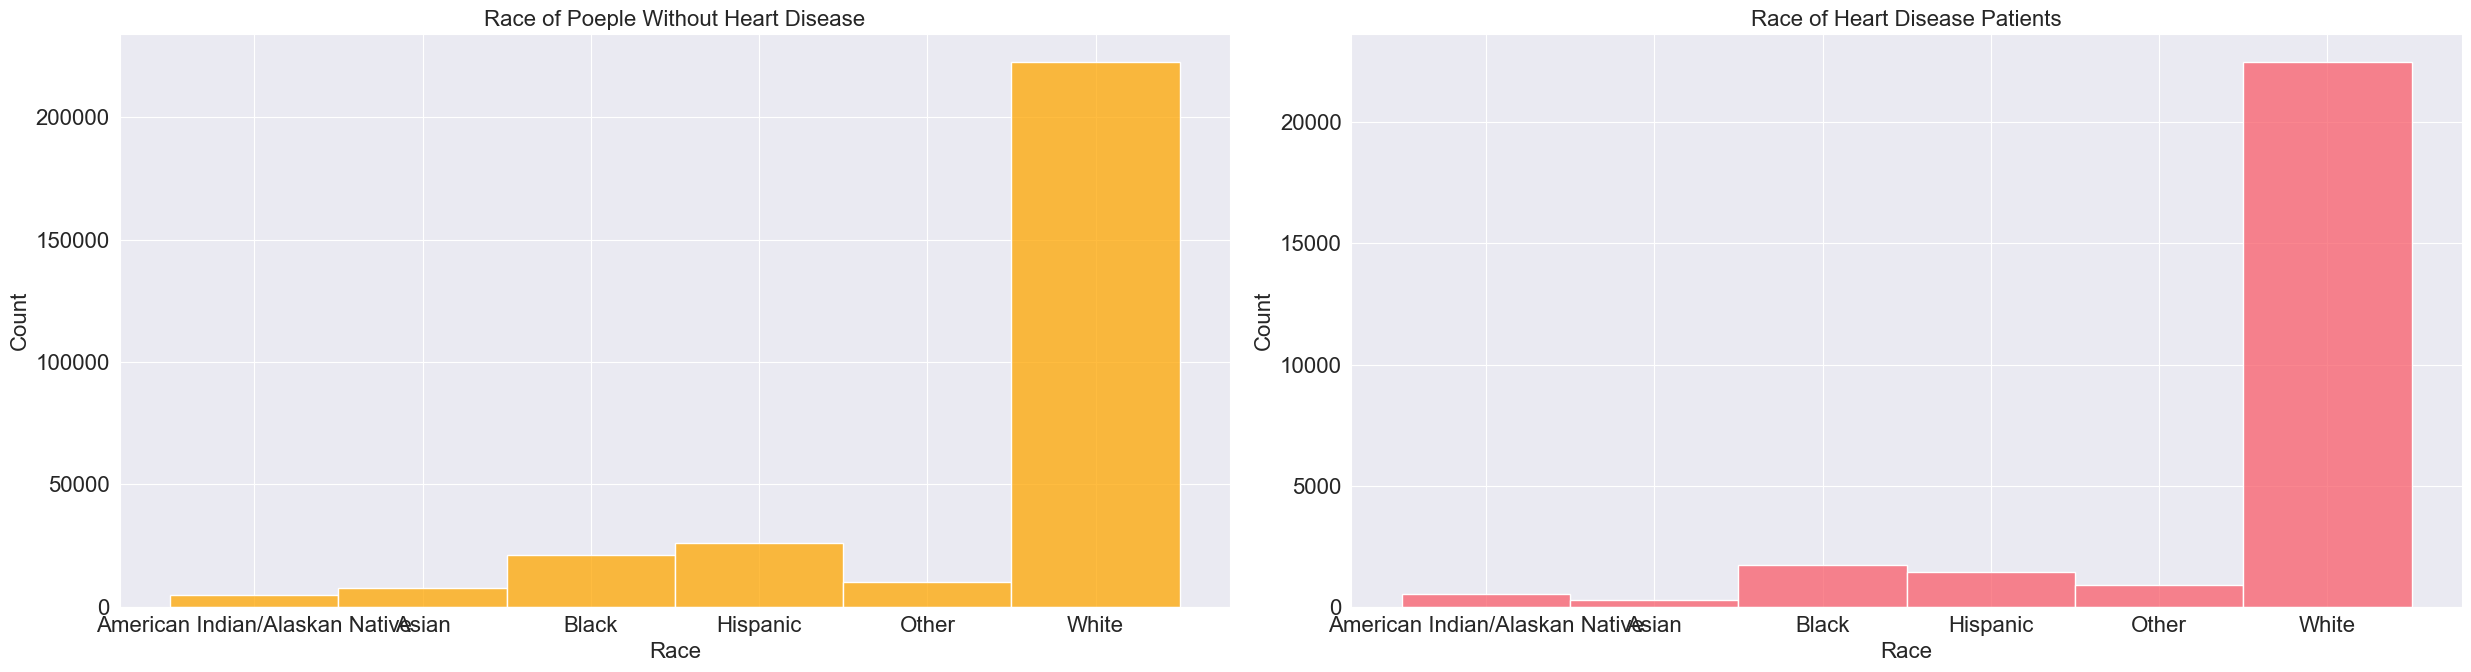

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'No'].sort_values("Race"), x='Race',
                  color=colors1[0], ax=ax1, );
ax1.set_title("Race of Poeple Without Heart Disease")
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'Yes'].sort_values("Race"), x='Race',
                  color=colors2[0], ax=ax2);
ax2.set_title("Race of Heart Disease Patients")
fig.tight_layout()

The pecentage of heart disease is highest (> 10%) among Native americans, followed by whites (\~9%). The least percentage of heart disease (\~3%) is among asians.

Diabetic Vs. HeartDisease

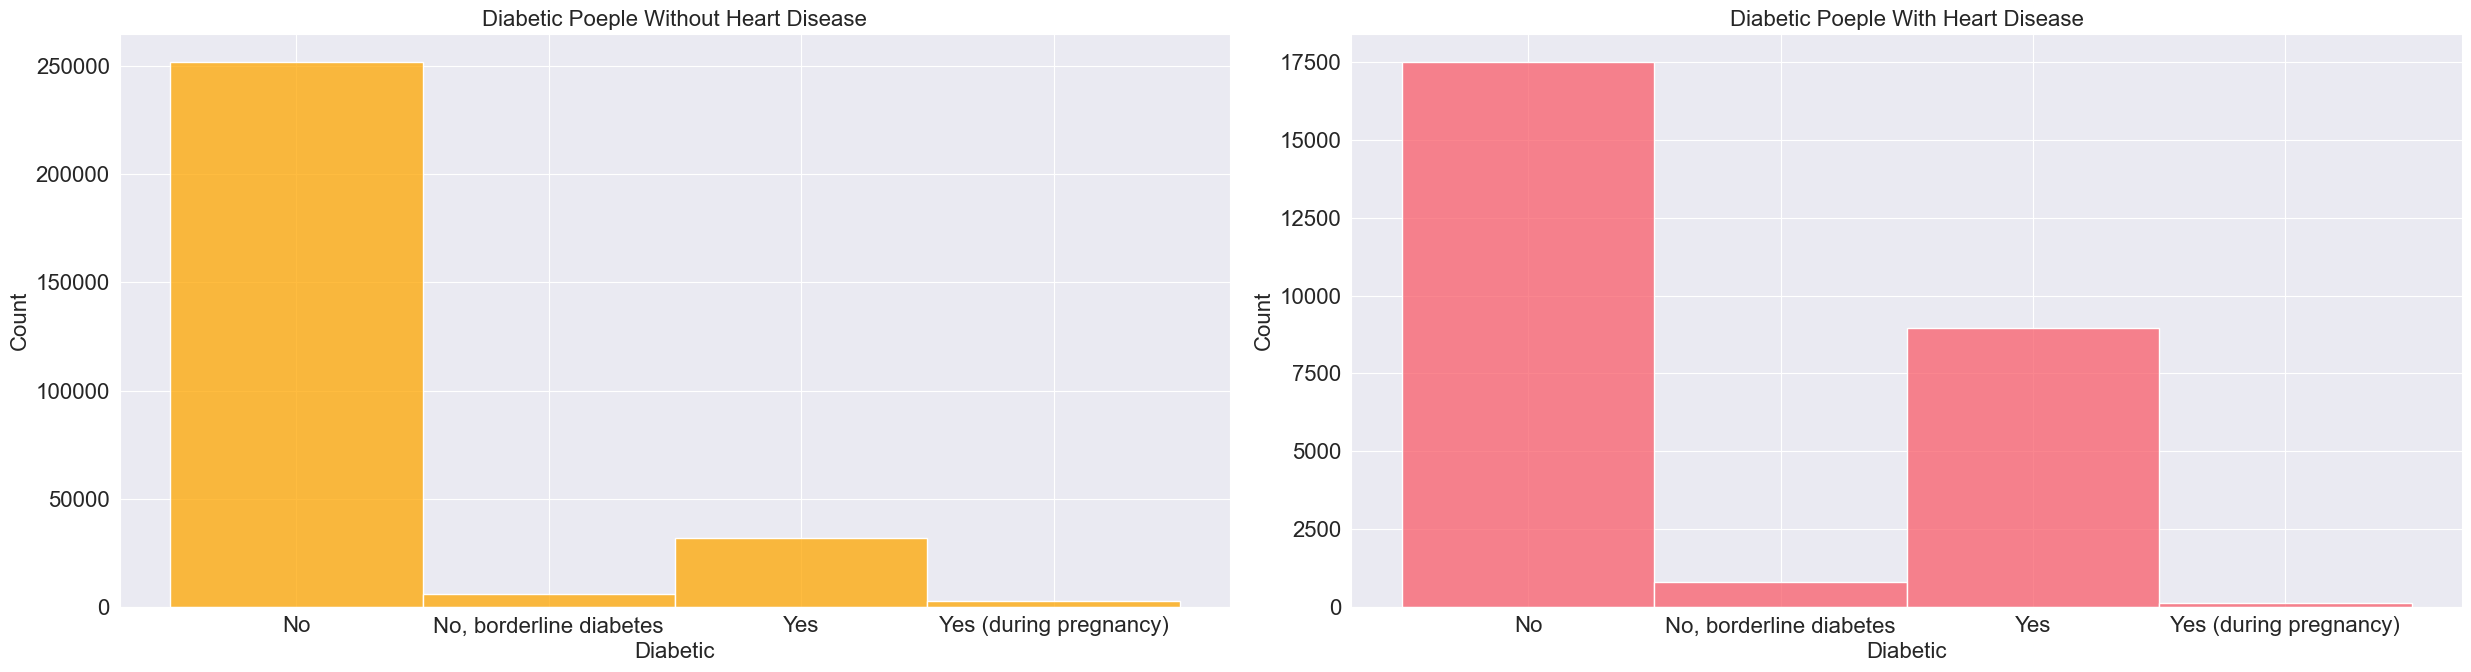

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'No'].sort_values("Diabetic"), x='Diabetic',
                  color=colors1[0], ax=ax1, );
ax1.set_title("Diabetic Poeple Without Heart Disease")
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'Yes'].sort_values("Diabetic"), x='Diabetic',
                  color=colors2[0], ax=ax2);
ax2.set_title("Diabetic Poeple With Heart Disease")
fig.tight_layout()

PhysicalHealth Vs. HeartDisease

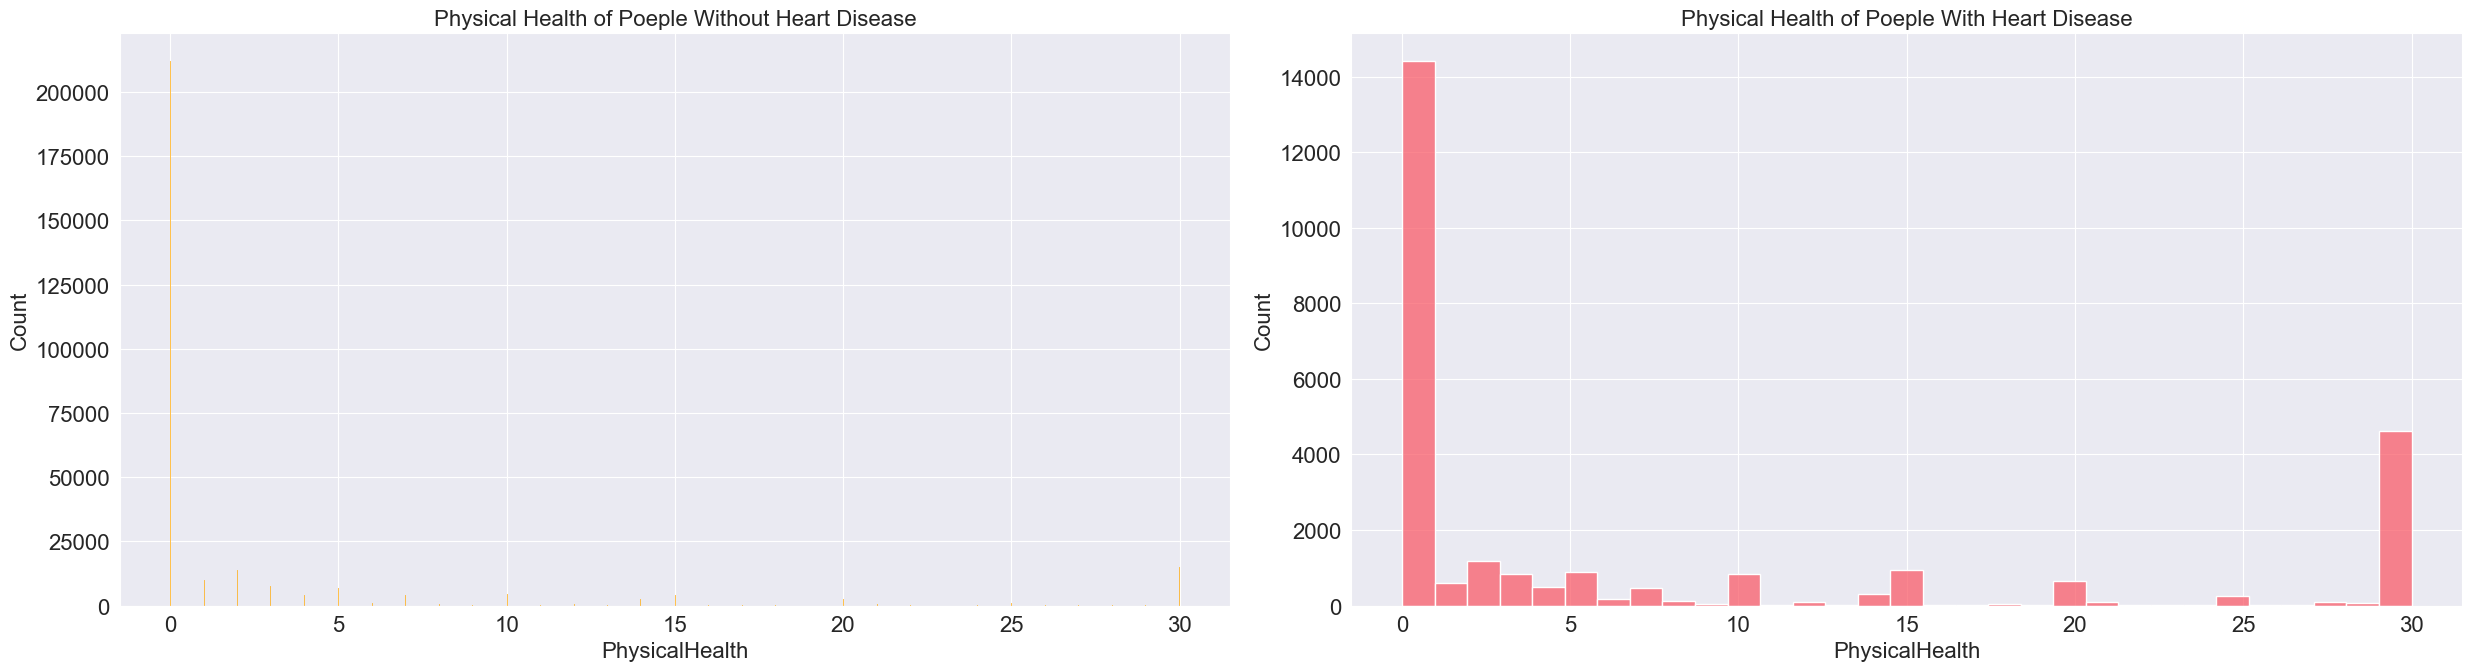

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'No'].sort_values("PhysicalHealth"), x='PhysicalHealth',
                  color=colors1[0], ax=ax1, );
ax1.set_title("Physical Health of Poeple Without Heart Disease")
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'Yes'].sort_values("PhysicalHealth"), x='PhysicalHealth',
                  color=colors2[0], ax=ax2);
ax2.set_title("Physical Health of Poeple With Heart Disease")
fig.tight_layout()

GenHealth Vs. HeartDisease

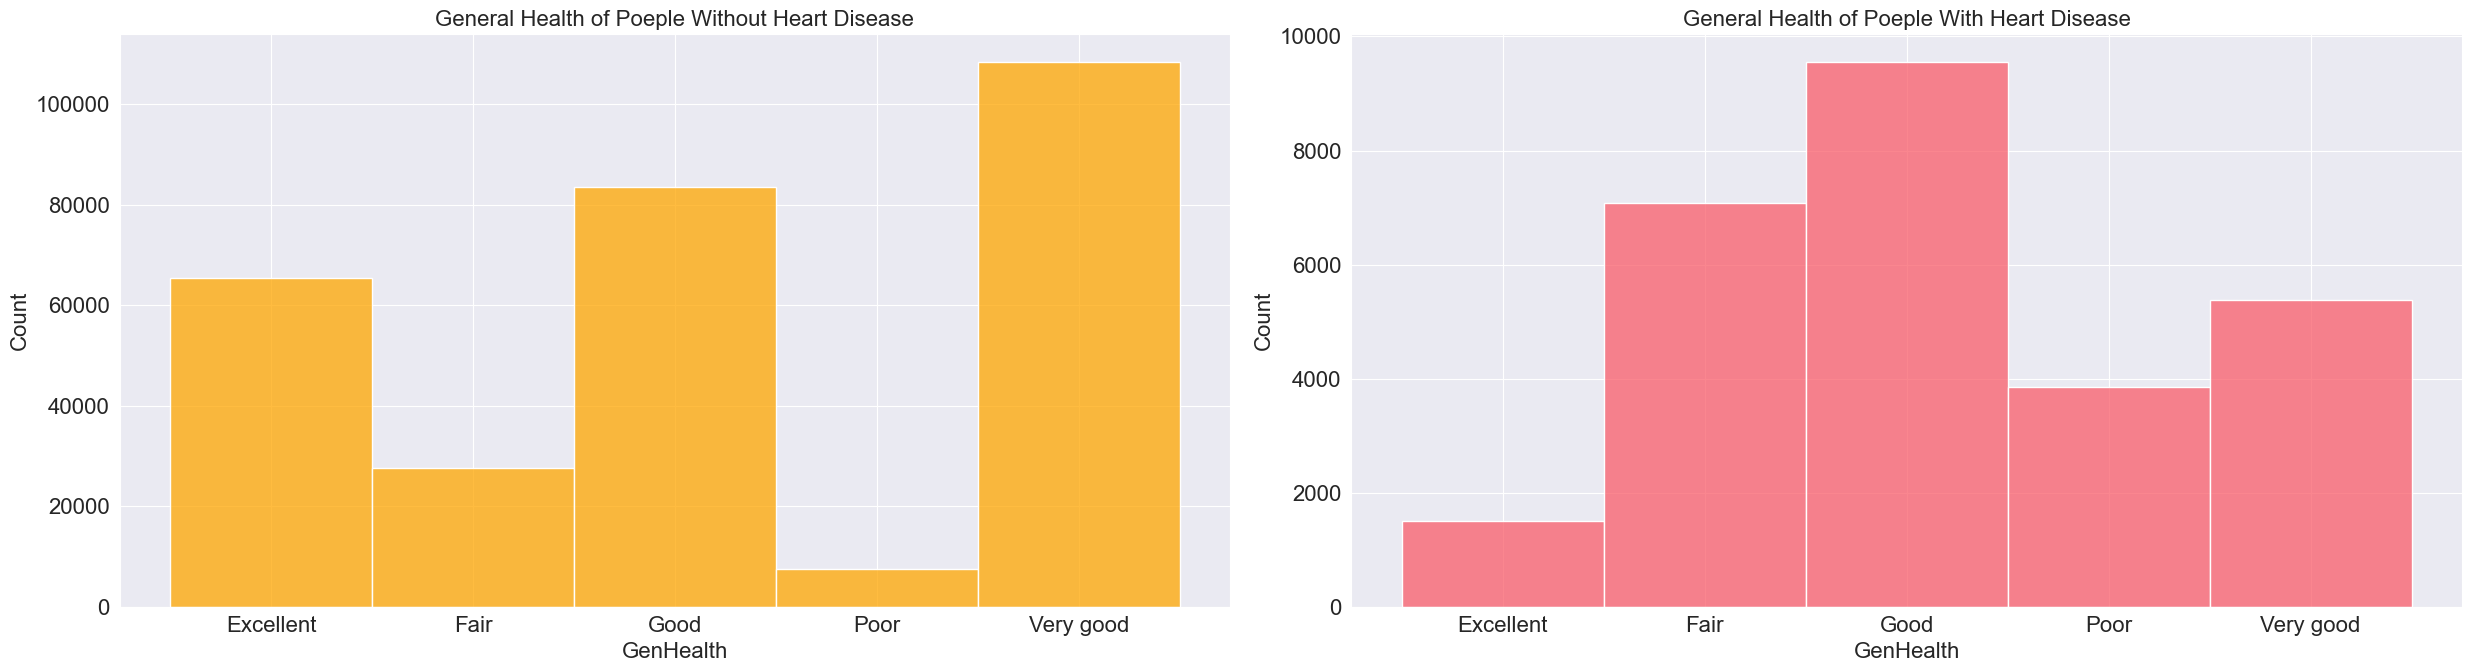

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'No'].sort_values("GenHealth"), x='GenHealth',
                  color=colors1[0], ax=ax1, );
ax1.set_title("General Health of Poeple Without Heart Disease")
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'Yes'].sort_values("GenHealth"), x='GenHealth',
                  color=colors2[0], ax=ax2);
ax2.set_title("General Health of Poeple With Heart Disease")
fig.tight_layout()

We can see that most heart disease patients believe their health is good, while most people who do not suffer heart diseases say their health is very good. Furhtermore, A lot more people who suffer from heart disease say they have poor or fair health compared to those who don't.

Asthma Vs. HeartDisease

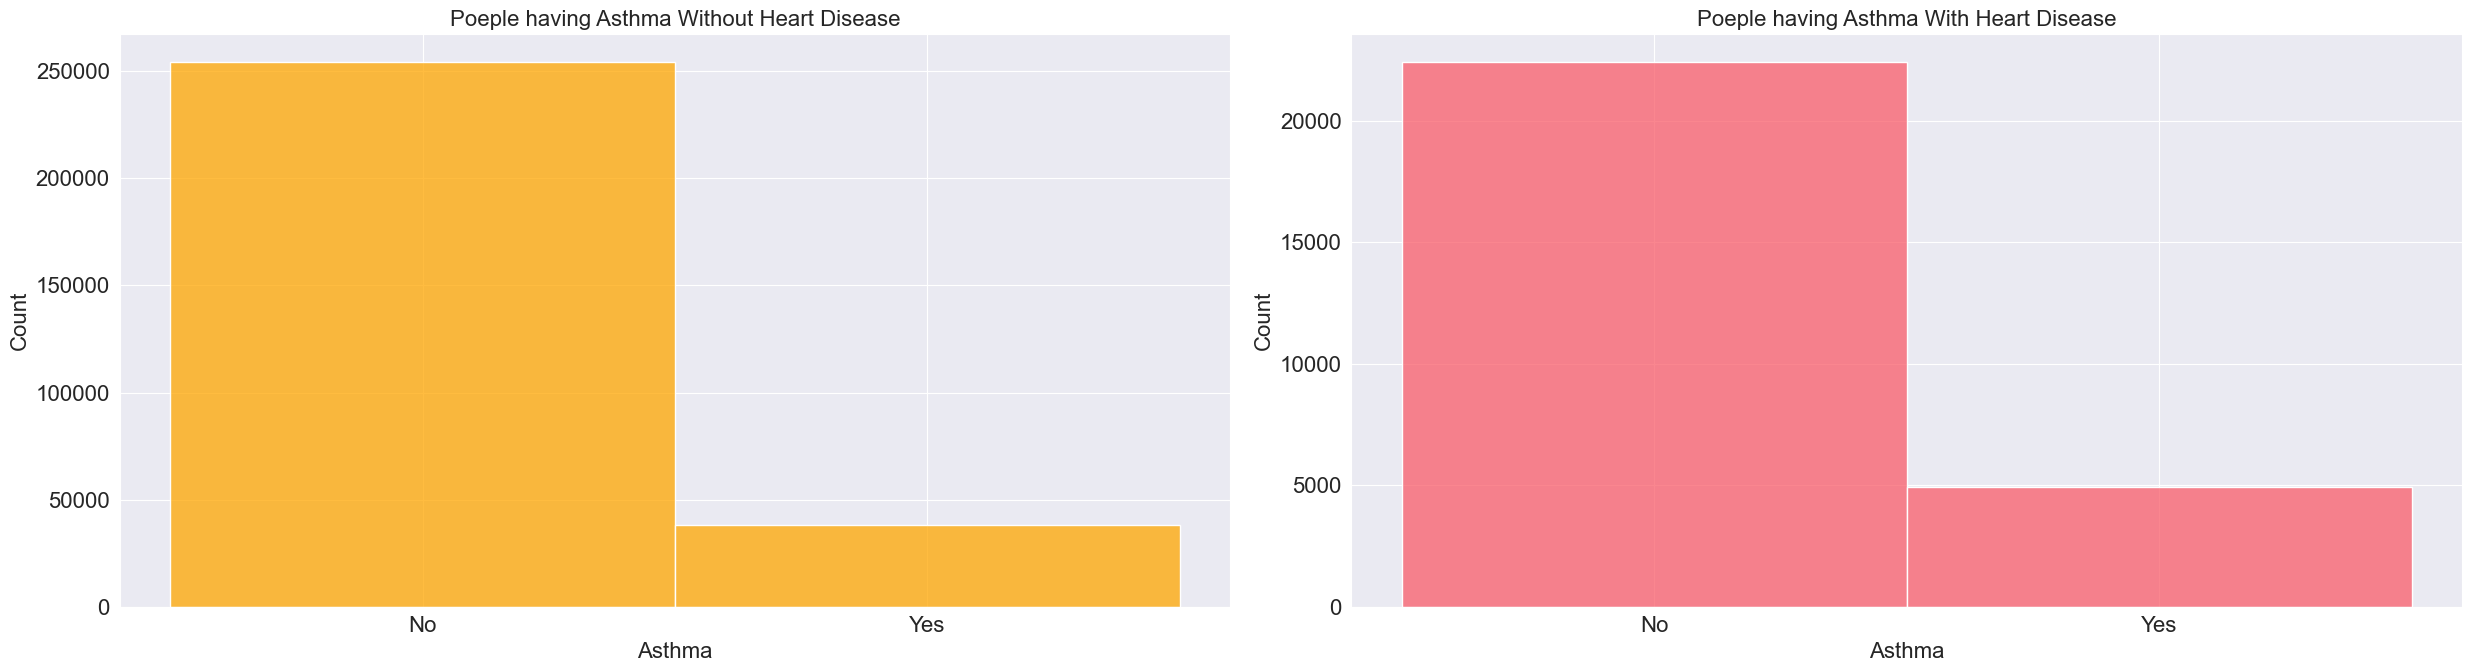

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'No'].sort_values("Asthma"), x='Asthma',
                  color=colors1[0], ax=ax1, );
ax1.set_title("Poeple having Asthma Without Heart Disease")
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'Yes'].sort_values("Asthma"), x='Asthma',
                  color=colors2[0], ax=ax2);
ax2.set_title("Poeple having Asthma With Heart Disease")
fig.tight_layout()

KidneyDisease Vs. HeartDisease

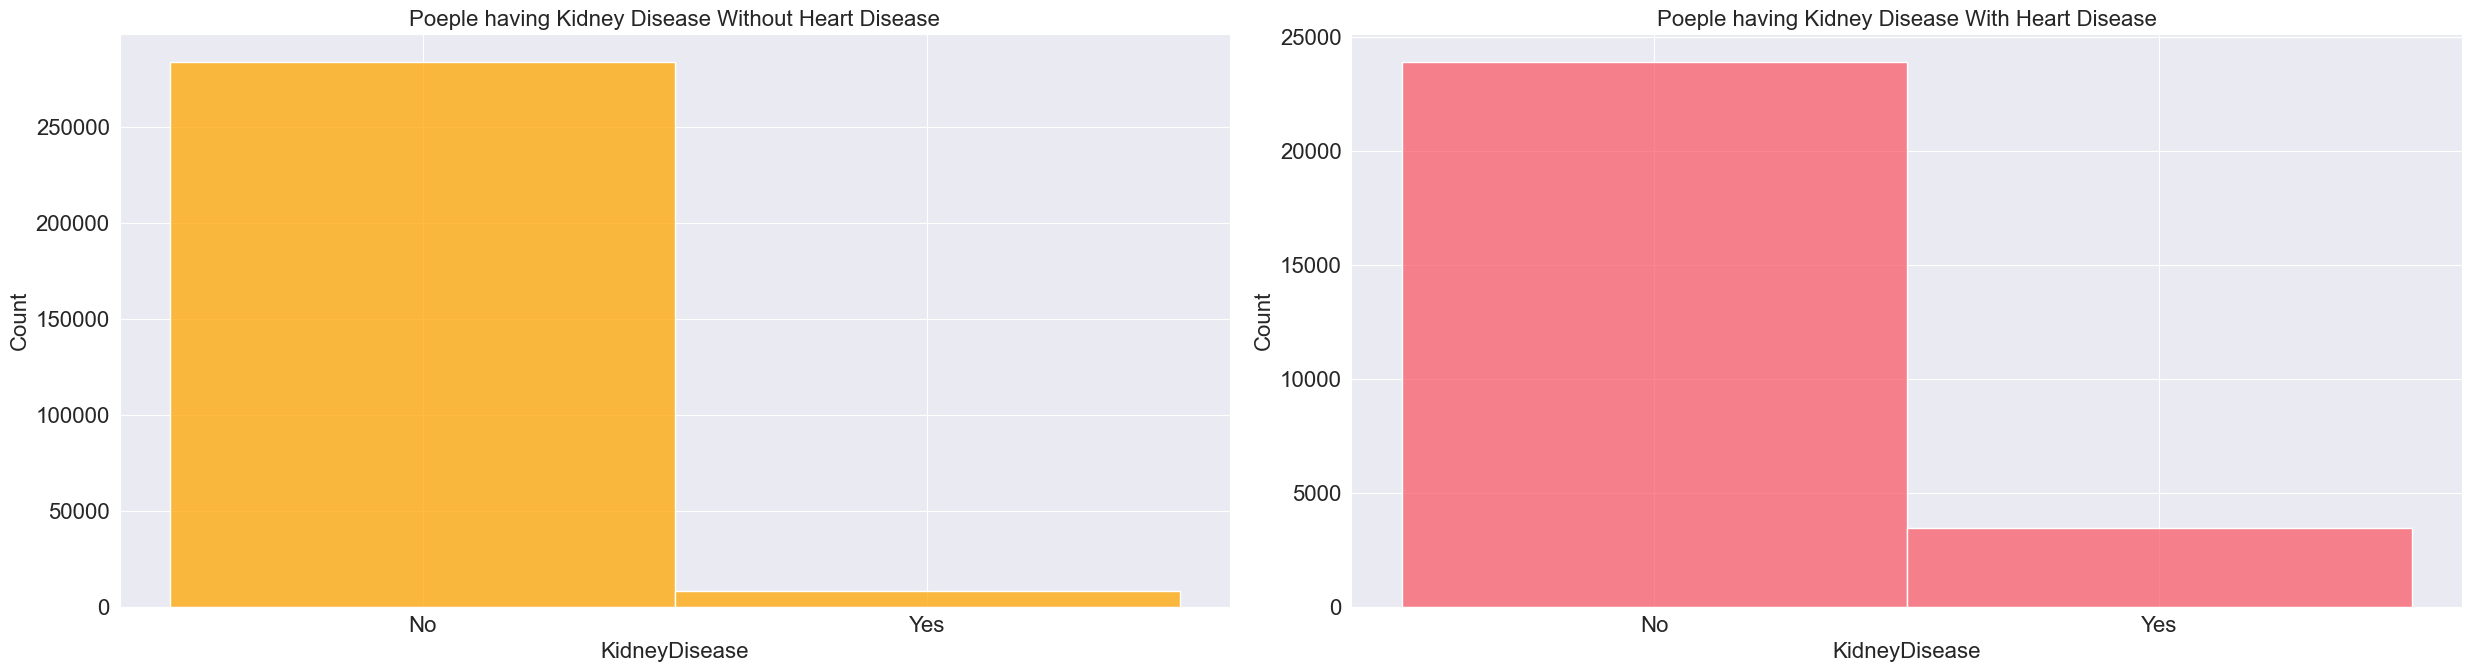

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'No'].sort_values("KidneyDisease"), x='KidneyDisease',
                  color=colors1[0], ax=ax1, );
ax1.set_title("Poeple having Kidney Disease Without Heart Disease")
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'Yes'].sort_values("KidneyDisease"), x='KidneyDisease',
                  color=colors2[0], ax=ax2);
ax2.set_title("Poeple having Kidney Disease With Heart Disease")
fig.tight_layout()

SkinCancer Vs. HeartDisease

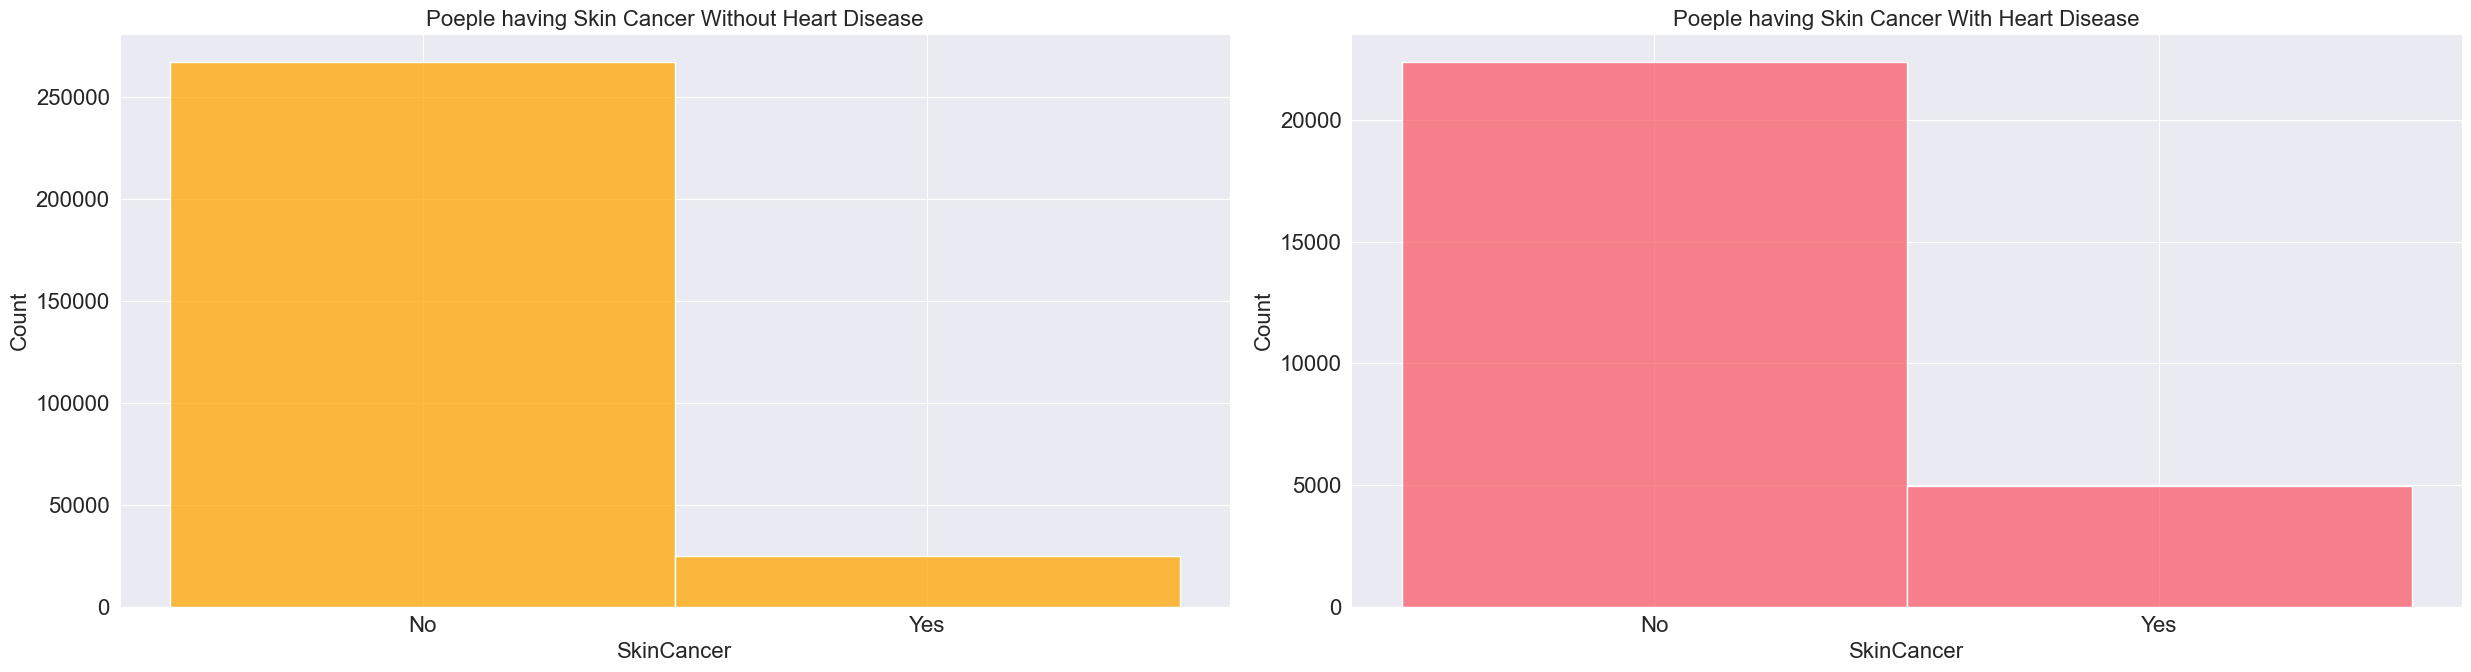

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'No'].sort_values("SkinCancer"), x='SkinCancer',
                  color=colors1[0], ax=ax1, );
ax1.set_title("Poeple having Skin Cancer Without Heart Disease")
sns.histplot(data=heart_df.loc[heart_df.HeartDisease == 'Yes'].sort_values("SkinCancer"), x='SkinCancer',
                  color=colors2[0], ax=ax2);
ax2.set_title("Poeple having Skin Cancer With Heart Disease")
fig.tight_layout()

Catagorical Vs. Numericalsmote=SMOTE()
X_train_transform,y_train_transform=smote.fit_resample(X_train,y_train)

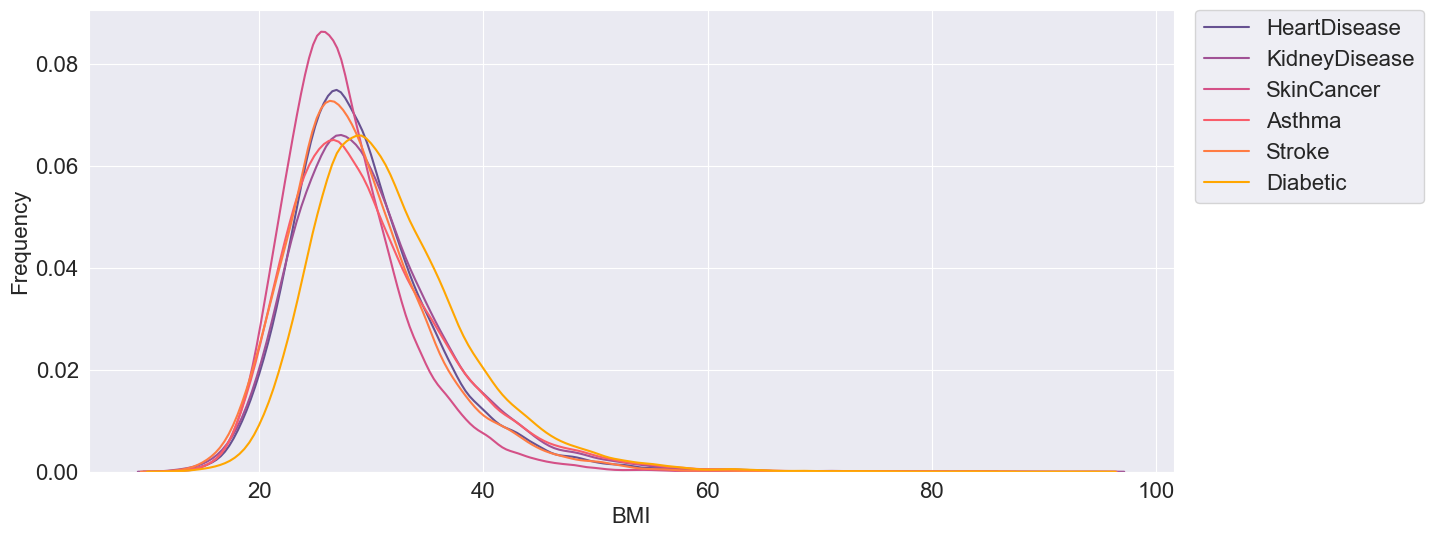

In [41]:
#BMI Vs. Diseases
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(heart_df[heart_df["HeartDisease"]=='Yes']["BMI"], alpha=1,shade = False, color=colors6[0], label="HeartDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["KidneyDisease"]=='Yes']["BMI"], alpha=1,shade = False, color=colors6[1], label="KidneyDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["SkinCancer"]=='Yes']["BMI"], alpha=1,shade = False, color=colors6[2], label="SkinCancer", ax = ax)
sns.kdeplot(heart_df[heart_df["Asthma"]=='Yes']["BMI"], alpha=1,shade = False, color=colors6[3], label="Asthma", ax = ax)
sns.kdeplot(heart_df[heart_df["Stroke"]=='Yes']["BMI"], alpha=1,shade = False, color=colors6[4], label="Stroke", ax = ax)
sns.kdeplot(heart_df[heart_df["Diabetic"]=='Yes']["BMI"], alpha=1,shade = False, color=colors6[5], label="Diabetic", ax = ax)

ax.set_xlabel("BMI")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

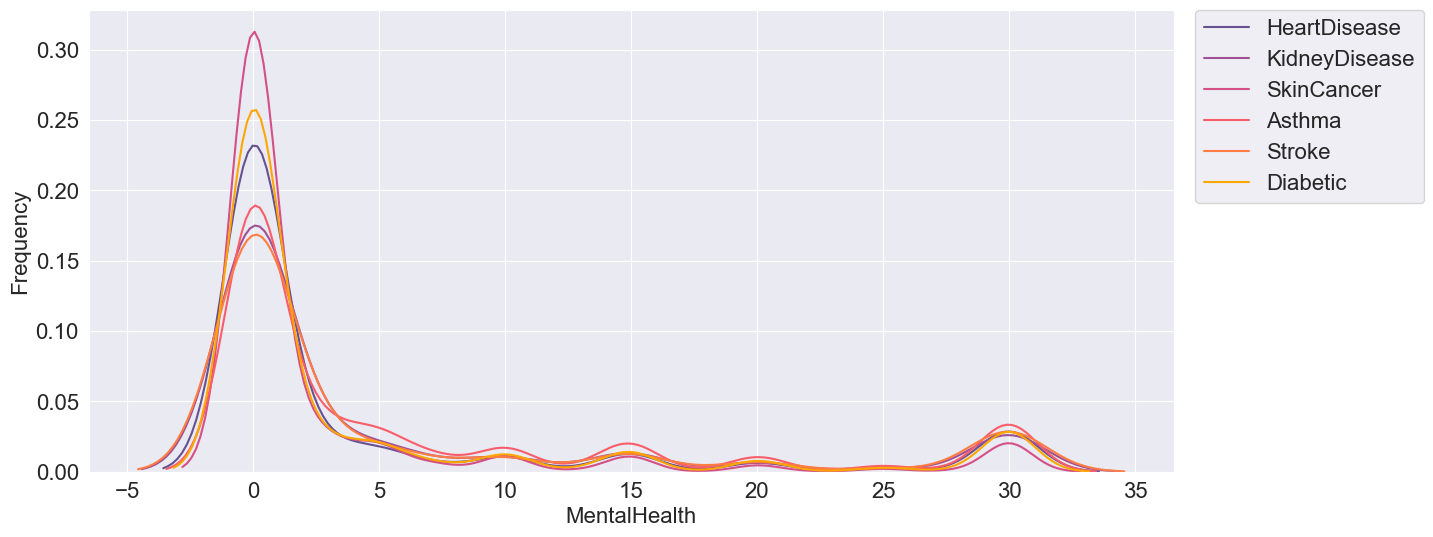

In [42]:
#MentalHealth Vs. Diseases
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(heart_df[heart_df["HeartDisease"]=='Yes']["MentalHealth"], alpha=1,shade = False, color=colors6[0], label="HeartDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["KidneyDisease"]=='Yes']["MentalHealth"], alpha=1,shade = False, color=colors6[1], label="KidneyDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["SkinCancer"]=='Yes']["MentalHealth"], alpha=1,shade = False, color=colors6[2], label="SkinCancer", ax = ax)
sns.kdeplot(heart_df[heart_df["Asthma"]=='Yes']["MentalHealth"], alpha=1,shade = False, color=colors6[3], label="Asthma", ax = ax)
sns.kdeplot(heart_df[heart_df["Stroke"]=='Yes']["MentalHealth"], alpha=1,shade = False, color=colors6[4], label="Stroke", ax = ax)
sns.kdeplot(heart_df[heart_df["Diabetic"]=='Yes']["MentalHealth"], alpha=1,shade = False, color=colors6[5], label="Diabetic", ax = ax)


ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

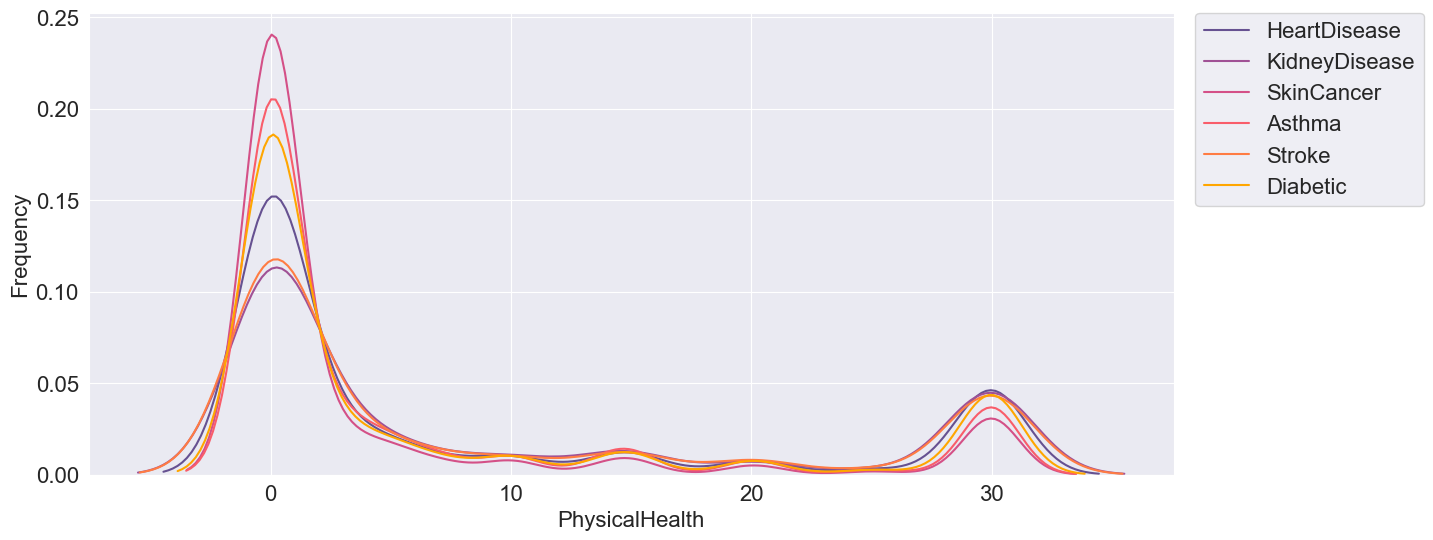

In [43]:
#PhysicalHealth Vs. Diseases
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(heart_df[heart_df["HeartDisease"]=='Yes']["PhysicalHealth"], alpha=1,shade = False, color=colors6[0], label="HeartDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["KidneyDisease"]=='Yes']["PhysicalHealth"], alpha=1,shade = False, color=colors6[1], label="KidneyDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["SkinCancer"]=='Yes']["PhysicalHealth"], alpha=1,shade = False, color=colors6[2], label="SkinCancer", ax = ax)
sns.kdeplot(heart_df[heart_df["Asthma"]=='Yes']["PhysicalHealth"], alpha=1,shade = False, color=colors6[3], label="Asthma", ax = ax)
sns.kdeplot(heart_df[heart_df["Stroke"]=='Yes']["PhysicalHealth"], alpha=1,shade = False, color=colors6[4], label="Stroke", ax = ax)
sns.kdeplot(heart_df[heart_df["Diabetic"]=='Yes']["PhysicalHealth"], alpha=1,shade = False, color=colors6[5], label="Diabetic", ax = ax)


ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

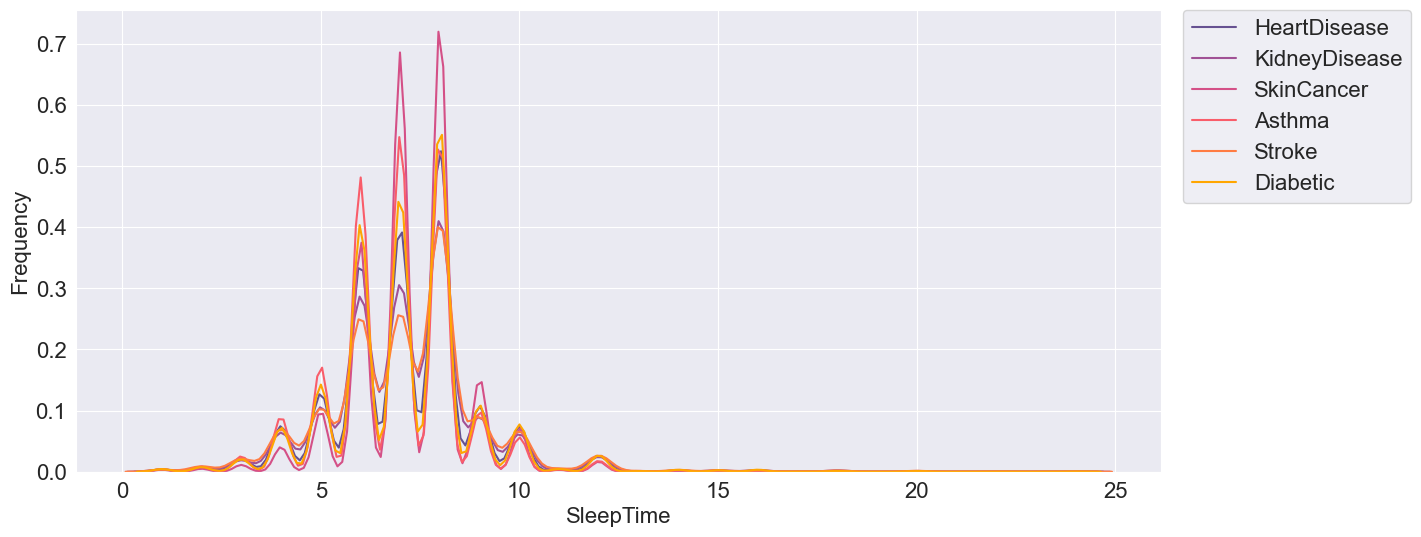

In [44]:
#SleepTime Vs. Diseases
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(heart_df[heart_df["HeartDisease"]=='Yes']["SleepTime"], alpha=1,shade = False, color=colors6[0], label="HeartDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["KidneyDisease"]=='Yes']["SleepTime"], alpha=1,shade = False, color=colors6[1], label="KidneyDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["SkinCancer"]=='Yes']["SleepTime"], alpha=1,shade = False, color=colors6[2], label="SkinCancer", ax = ax)
sns.kdeplot(heart_df[heart_df["Asthma"]=='Yes']["SleepTime"], alpha=1,shade = False, color=colors6[3], label="Asthma", ax = ax)
sns.kdeplot(heart_df[heart_df["Stroke"]=='Yes']["SleepTime"], alpha=1,shade = False, color=colors6[4], label="Stroke", ax = ax)
sns.kdeplot(heart_df[heart_df["Diabetic"]=='Yes']["SleepTime"], alpha=1,shade = False, color=colors6[5], label="Diabetic", ax = ax)


ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

## <a id=summary> 3.9 Insights Summary

Insights and takeaways drawn from data exploration:


1.   In our sample, around 8 among 100 individuals suffer from heart disease.

2.   The BMI of heart disease patients is slightly higher than that of healthy individuals.

3.   The older the individual, the more susceptible they are to heart disease.

4.   \~10% of males suffer from heart disease, while only \~7% of females do.

5.   The pecentage of heart disease is highest (> 10%) among Native americans, followed by whites (\~9%). The least percentage of heart disease (\~3%) is among asians.

6.   A lot more people who suffer from heart disease say they have poor or fair health compared to those who don't.

7.   79% of healthy individuals have been physically active in the past 30 days, compared to 64% in heart disease patients.

8.   Abnormal sleeep duration is more prevalent in heart disease patients. Even though heart disease patients make 8.5% of the sample, they have higher percentages of sleep less than 6 hours or more than 9 hours, which is considered abnormal.

9.   \~12% of people who smoke suffer from heart disease. In contrast, \~5% of non-smokers suffer from heart disease.

10.   Surprisingly, people who drink alcohol have a lower percentage of heart disease (\~4%) than those who do not (\~9%).

11.   Having a stroke is highly correlacted with heart disease. People who have had a stroke before have a heart disease percentage of around 48%. On the other hand, people who did not suffer a stroke had a significantly lower percentage of heart disease (\~8%).

12.   Diabetic people are at higher risk of heart disease (\~25%).

13.   Asthmatic people are at a slightly higher risk of heart disease.

14.   Those who have suffered from kidney disease are at a sginificantly higher risk of heart disease. With a percentage of \~30% compared to ~9% in healthy people.

15.   People who suffered from skin cancer are at a moderately higher risk of heart disease (\~18% vs \~9%).

16.   Difficilty of walking is present in ~18% of heart disease patients vs ~7% in healthy individuals.

17. The BMI distribution differs slightly in patients of different diseases. With diabetic people having the highest BMI mode, and stroke victims having the lowest BMI mode.

18.  Mental health, sleep duration, and physical health are similar among people who suffer from different dieseases.

19.  ~64% of people who say they have poor health are smokers. While people who say they have excellent health are 30% smokers.



In [45]:
from scipy.stats import chi2_contingency
# defining the table
for feature in categorical_features:
  stat, p, dof, expected = chi2_contingency(pd.crosstab(heart_df[feature],heart_df['HeartDisease']))
# interpret p-value
  alpha = 0.05
  print ( "p value is " + str (p))
  if p<=alpha:
    print ( 'Dependent (reject H0)' )
  else :
    print ( 'Independent (H0 holds true)' )

p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 1.892352227090306e-73
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 2.9886131565632597e-180
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 2.2386144306283177e-121
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)


 What is the risk of getting Heart Disease if you are exposed to more than 1 factor?

In [46]:
dk = heart_df.copy()
dk.Smoking = dk.Smoking.apply(lambda x : 'Smoking' if x == 'Yes' else 'Non Smoking')
dk.Stroke = dk.Stroke.apply(lambda x : 'Stroke' if x == 'Yes' else 'No Stroke')
dk.PhysicalActivity = dk.PhysicalActivity.apply(lambda x : 'Active' if x == 'Yes' else 'Inactive')
dk.Diabetic = dk.Diabetic.apply(lambda x : 'Diabetic' if x == 'Yes' else 'No Diabetic')
dk.KidneyDisease = dk.KidneyDisease.apply(lambda x : 'KidneyDisease' if x == 'Yes' else 'No KidneyDisease')

In [47]:
dk['group'] = dk.Smoking + ' & ' + dk.Stroke + ' & ' + dk.PhysicalActivity + ' & ' + dk.Diabetic + ' & ' + dk.KidneyDisease

In [48]:
df_plot = dk.groupby('group')['HeartDisease'].value_counts(normalize = True).mul(100)
df_plot = df_plot.rename('percent').reset_index()

In [49]:
h = df_plot[df_plot['HeartDisease']=='Yes'].drop(['HeartDisease'],axis=1)
h.set_index('group',inplace=True)
k = h.iloc[[8, 12, 14, 24, 28, 29, 30, 3, 1, 2, 11, 19]]
k

percent
group                                                        
Non Smoking & Stroke & Active & Diabetic & Kidn...  56.626506
Non Smoking & Stroke & Inactive & Diabetic & Ki...  56.687898
Non Smoking & Stroke & Inactive & No Diabetic &...  52.755906
Smoking & Stroke & Active & Diabetic & KidneyDi...  58.918919
Smoking & Stroke & Inactive & Diabetic & Kidney...  64.197531
Smoking & Stroke & Inactive & Diabetic & No Kid...  53.992395
Smoking & Stroke & Inactive & No Diabetic & Kid...  55.172414
Non Smoking & No Stroke & Active & No Diabetic ...   3.519108
Non Smoking & No Stroke & Active & Diabetic & N...  11.808529
Non Smoking & No Stroke & Active & No Diabetic ...  14.488518
Non Smoking & Stroke & Active & No Diabetic & N...  23.481258
Smoking & No Stroke & Active & No Diabetic & No...   7.034865

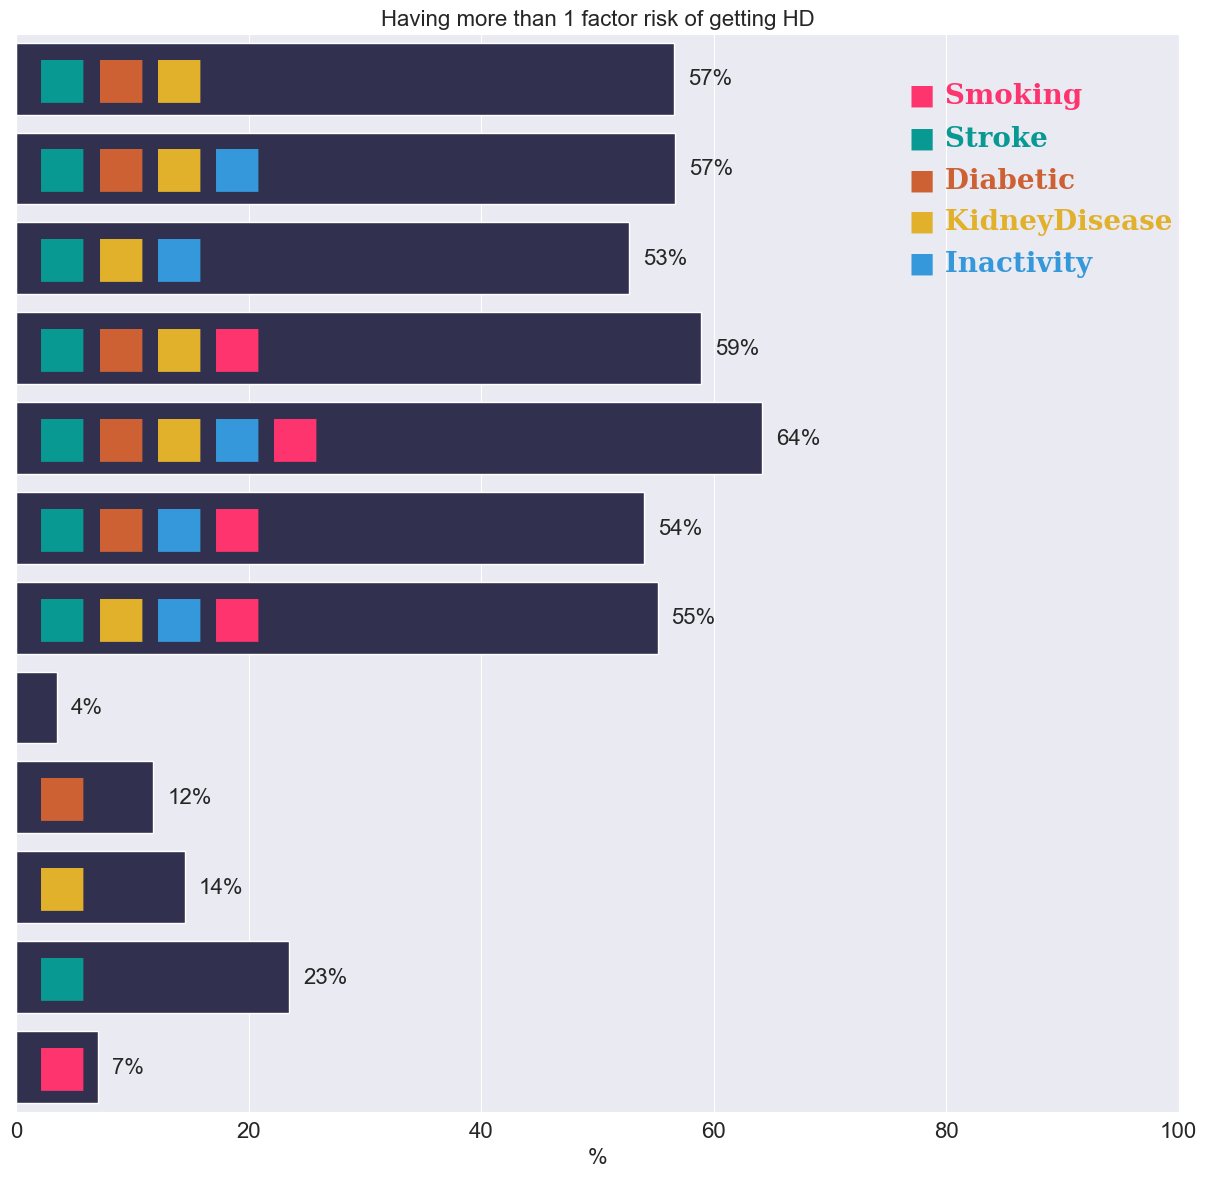

In [50]:
fig, ax = plt.subplots(1, 1,figsize =(15, 14))
ax = sns.barplot(y = k.index, x=k.percent.values, color='#2c2c54')
ax.bar_label(ax.containers[0], fmt='%.f%%', padding=10)
colors={
    'smoking':'#fe346e',
    'stroke':'#079992',
    'diabetic':'#cd6133',
    'kidney':'#e1b12c',
    'active':'#3498db'
}
y=0
axes=[
    ['stroke', 'diabetic', 'kidney'],
    ['stroke', 'diabetic', 'kidney','active'],
    ['stroke', 'kidney','active'],
    ['stroke', 'diabetic', 'kidney','smoking'],
    ['stroke', 'diabetic', 'kidney', 'active', 'smoking'],
    ['stroke', 'diabetic', 'active', 'smoking'],
    ['stroke', 'kidney', 'active', 'smoking'],
    [],
    ['diabetic'],
    ['kidney'],
    ['stroke'],
    ['smoking']
]
for axo in axes:
    x=4
    for i in axo:
        ax.annotate('■',
        ha='center', va='center', fontsize=40, color=colors[i], xy=(x, y),font='Serif')
        x+=5
    y+=1
ax.set_xlabel('%')
ax.axes.get_yaxis().set_visible(False)
ax.set(xlim=(0, 100))

fig.text(0.72,0.83, '■ Smoking', {'font': 'Serif','weight':'bold','size': '20','weight':'bold','style':'normal', 'color':colors['smoking']})
fig.text(0.72,0.8, '■ Stroke', {'font': 'Serif','weight':'bold','size': '20','weight':'bold','style':'normal', 'color':colors['stroke']})
fig.text(0.72,0.77, '■ Diabetic', {'font': 'Serif','weight':'bold','size': '20','weight':'bold','style':'normal', 'color':colors['diabetic']})
fig.text(0.72,0.74, '■ KidneyDisease', {'font': 'Serif','weight':'bold','size': '20','weight':'bold','style':'normal', 'color':colors['kidney']})
fig.text(0.72,0.71, '■ Inactivity', {'font': 'Serif','weight':'bold','size': '20','weight':'bold','style':'normal', 'color':colors['active']})
ax.set_title('Having more than 1 factor risk of getting HD')
plt.show()